# Hotel Booking Cancallation Prediction

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

Connecting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraray Files

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
import matplotlib.pyplot as plt
import pandas as pd

Connecting to csv file

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Assignment/hotel_bookings.csv');

Checking File

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


# 1. Data Pre-processing (30%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

Droping **"arrival_date_year","arrival_date_week_number","arrival_date_day_of_month" ,"reservation_status_date"** Becausing they contain dates which are not usefull


Droping **"reservation_status","required_car_parking_spaces"** because they don't have any direct relation with cancellation.

In [ ]:
#droping irrelevent column
df.drop(["arrival_date_year","arrival_date_week_number","arrival_date_day_of_month" ,"reservation_status_date","reservation_status","required_car_parking_spaces","adr" ], axis=1,inplace=True)


In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,total_of_special_requests
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,...,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,0,A,C,0,No Deposit,NaN,NaN,0,Transient,0
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,0,A,A,0,No Deposit,304.0,NaN,0,Transient,0
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,A,A,0,No Deposit,240.0,NaN,0,Transient,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,2,5,2,0.0,0,BB,...,0,A,A,0,No Deposit,394.0,NaN,0,Transient,0
119386,City Hotel,0,102,August,2,5,3,0.0,0,BB,...,0,E,E,0,No Deposit,9.0,NaN,0,Transient,2
119387,City Hotel,0,34,August,2,5,2,0.0,0,BB,...,0,D,D,0,No Deposit,9.0,NaN,0,Transient,4
119388,City Hotel,0,109,August,2,5,2,0.0,0,BB,...,0,A,A,0,No Deposit,89.0,NaN,0,Transient,0


## 1.1 Missing Values

Identify and handled missing values.

Checking Missing Values In column

In [ ]:
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,total_of_special_requests
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Checking Missing Values In column

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_month                     0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
total_of_special

As Agent,company have many missing values and they don't have any direct connection as well so its better to drop them

In [ ]:
#droping irrelevent column
df.drop(["agent","company" ], axis=1,inplace=True)


making sure they dropped

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  country                         118902 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

Filling children null values

In [ ]:
df['children'].fillna(0, inplace=True)

Filling Country null values

In [ ]:
df['country'].fillna('unknown', inplace=True)

Checking NULL values again for making sure

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
total_of_special_requests         0
dtype: int64

## 1.2 Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

Finding Unique Value in Column Babies

In [ ]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

Counting Unique Value in Column Babies

In [ ]:
df['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

Finding Unique Values in column children

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [ ]:
df['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Finding Unique Values in column adults

Finding Unique Values in column adults

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

Counting Unique Value in Column Babies

In [ ]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

Counting Unique Value in Column Babies

In [ ]:
df['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

## 1.3 Removing Inconsistent values

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



dropping  incomplete bookings, such as reservations with zero adults, babies, or children.

In [ ]:
df.drop(df[(df['adults'] == 0) & (df['babies'] == 0) & (df['children'] == 0)].index, inplace=True)


Removing booking where number of stays_in_weekend_nights and stays_in_week_nights are 0 which which it invalid booking

In [ ]:
# Drop rows where 'stays_in_weekend_nights' and 'stays_in_week_nights' are both equal to 0
df.drop(df[(df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0)].index, inplace=True)


Checking Dataframe

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,total_of_special_requests
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,0,0,0,A,C,0,No Deposit,0,Transient,0
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,0,0,0,A,A,0,No Deposit,0,Transient,0
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,0,0,A,A,0,No Deposit,0,Transient,1
5,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,0,0,A,A,0,No Deposit,0,Transient,1
6,Resort Hotel,0,0,July,0,2,2,0.0,0,BB,...,0,0,0,C,C,0,No Deposit,0,Transient,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,2,5,2,0.0,0,BB,...,0,0,0,A,A,0,No Deposit,0,Transient,0
119386,City Hotel,0,102,August,2,5,3,0.0,0,BB,...,0,0,0,E,E,0,No Deposit,0,Transient,2
119387,City Hotel,0,34,August,2,5,2,0.0,0,BB,...,0,0,0,D,D,0,No Deposit,0,Transient,4
119388,City Hotel,0,109,August,2,5,2,0.0,0,BB,...,0,0,0,A,A,0,No Deposit,0,Transient,0


# 2. Exploratory Data Analysis (15%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.
* Identifying the most common customer types.

Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts

Calculating cancellation  for City and Resort hotels.

In [ ]:
# counting cancele reservation in each hotels
df[df['is_canceled'] == 1].groupby('hotel')['is_canceled'].count()

hotel
City Hotel      33066
Resort Hotel    11110
Name: is_canceled, dtype: int64

Drawing Graph

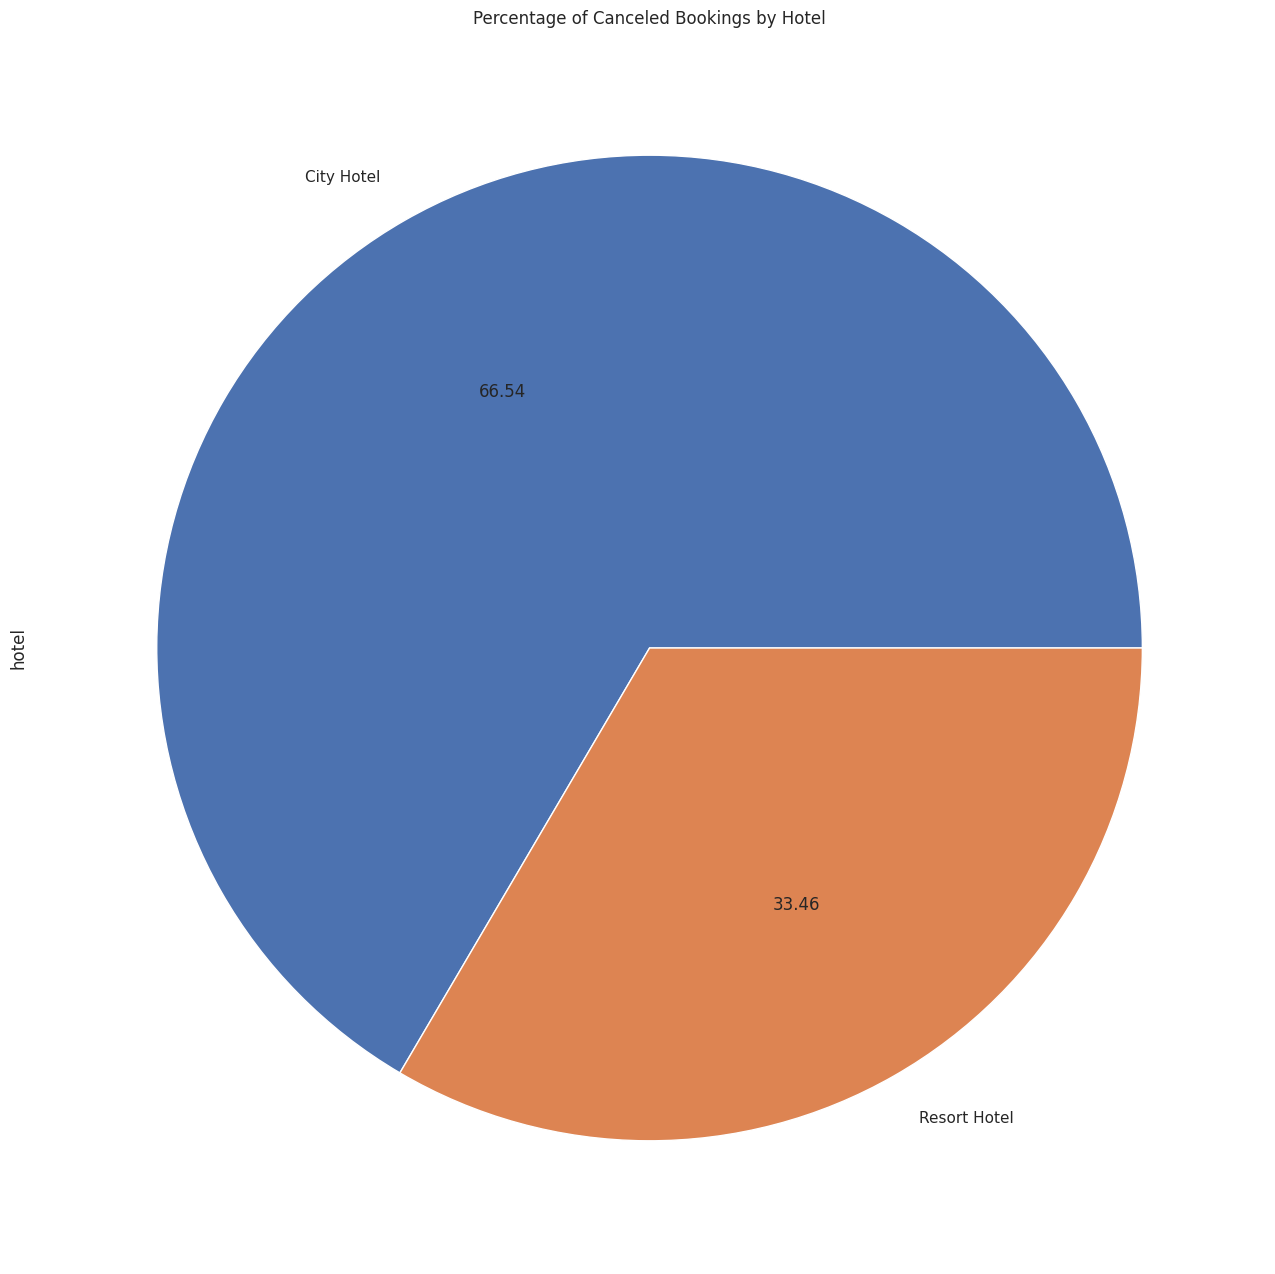

In [ ]:
df['hotel'].value_counts().plot(kind='pie',title="Percentage of Canceled Bookings by Hotel",autopct='%.2f');


  So the cancellation Percentage for City Hotel is 66.54 and For Resort Hotel its 33.46

Identifying the most frequently ordered meal types.

In [ ]:
# getting name of unique meal
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
# counting each meal
df['meal'].value_counts()

BB           91721
HB           14384
SC           10503
Undefined     1160
FB             797
Name: meal, dtype: int64

<Figure size 850x1100 with 0 Axes>

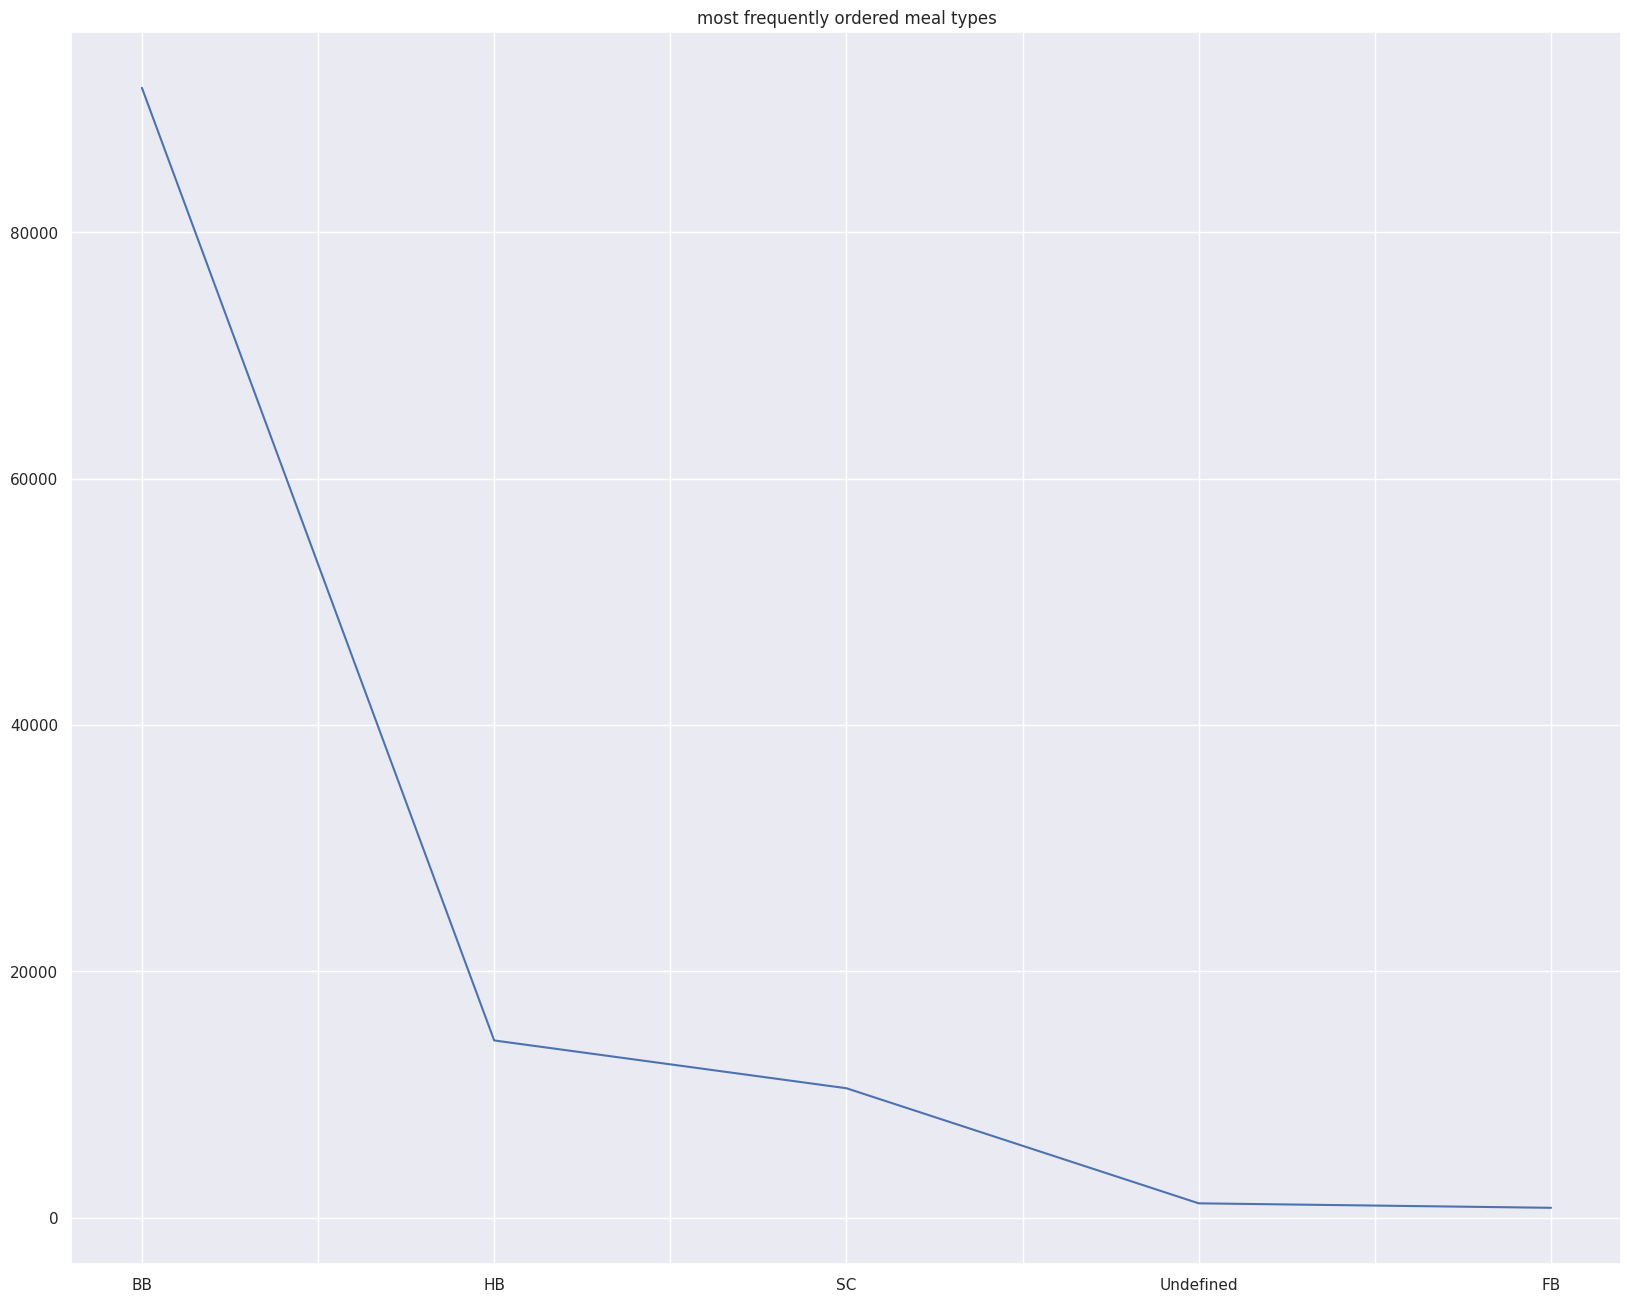

<Figure size 850x1100 with 0 Axes>

In [ ]:
#line graph
df['meal'].value_counts().plot(kind='line',title="most frequently ordered meal types");
plt.figure(figsize=(8.5, 11))


So BB is the most Frequent Meal Odered

The number of returning guests.

In [ ]:
# number of returning guest
df['is_repeated_guest'].value_counts()

0    115066
1      3499
Name: is_repeated_guest, dtype: int64

<Figure size 1000x600 with 0 Axes>

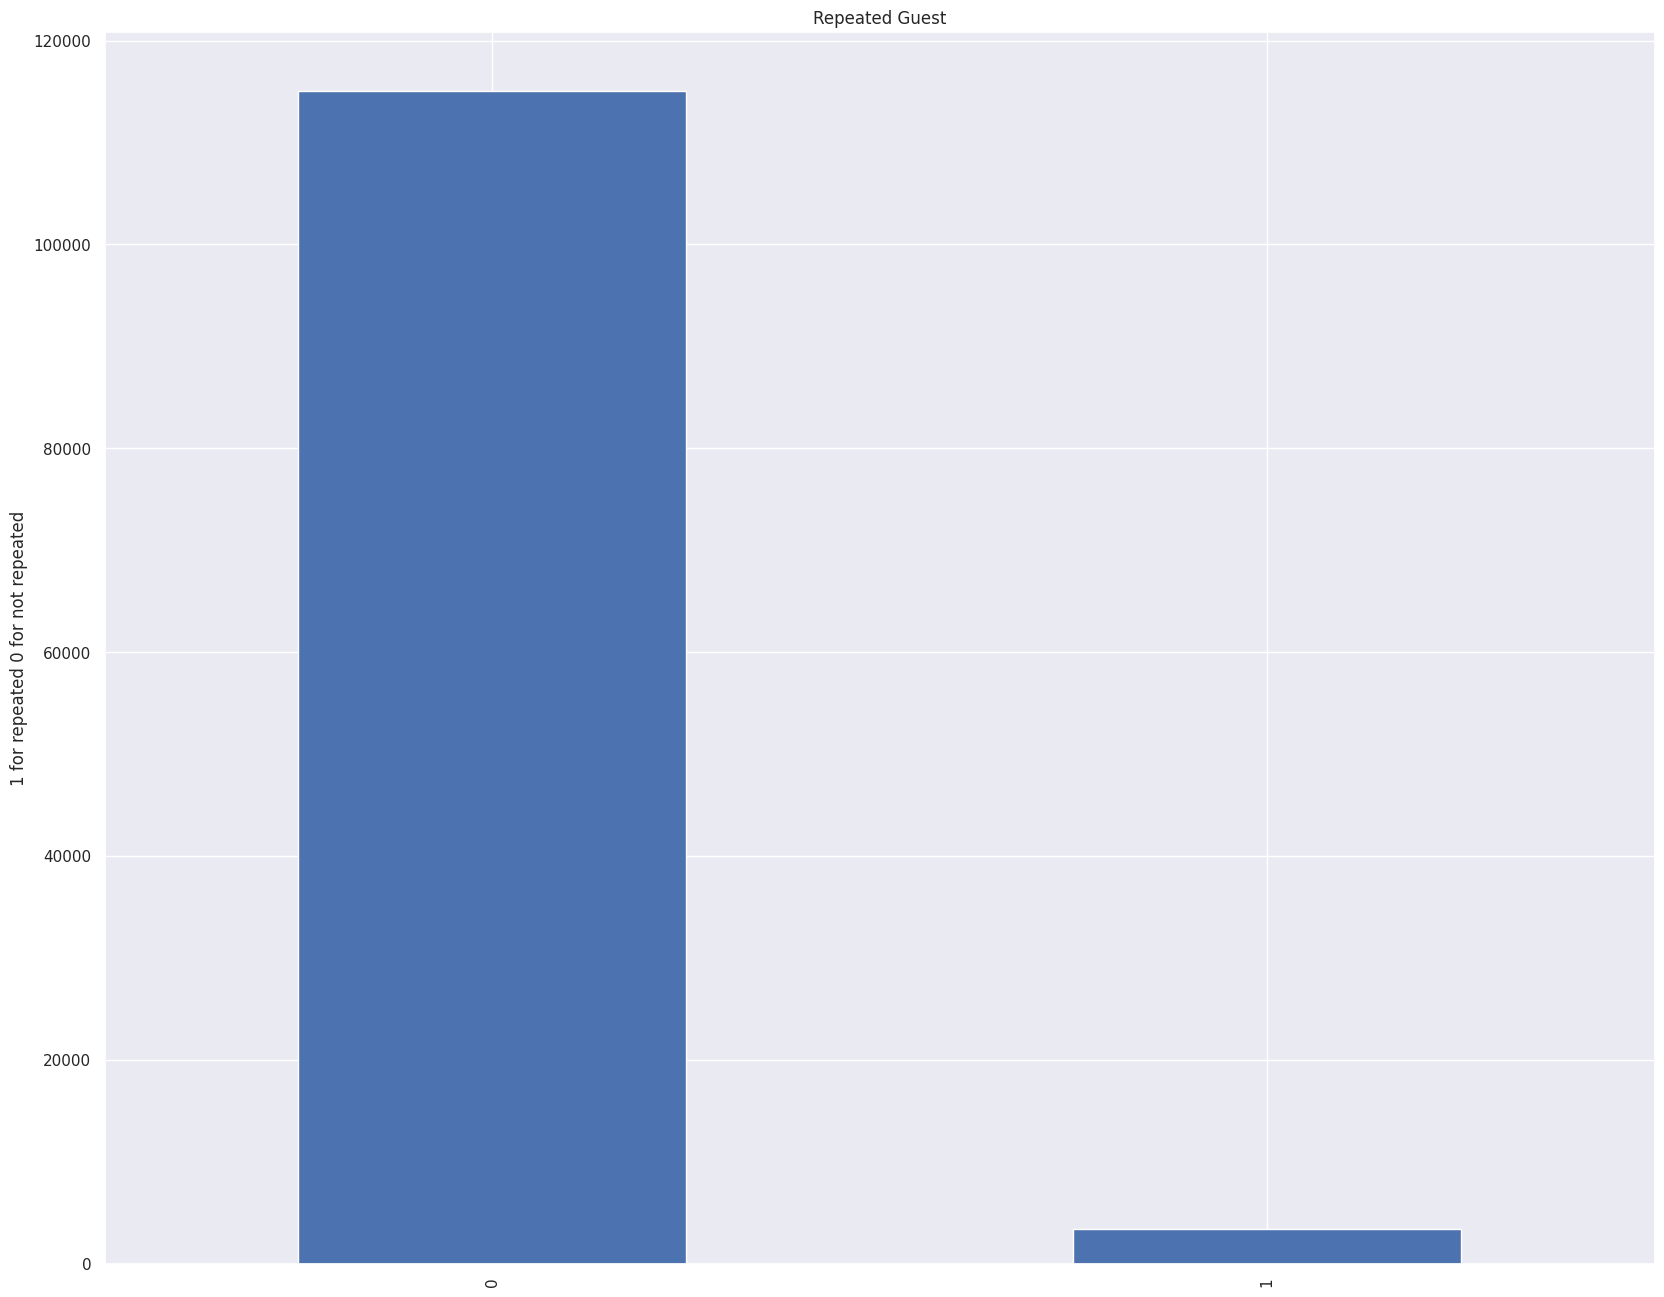

<Figure size 1000x600 with 0 Axes>

In [ ]:
df['is_repeated_guest'].value_counts().plot(kind='bar',title="Repeated Guest",ylabel="1 for repeated 0 for not repeated");
plt.figure(figsize=(10, 6))

So 115066 are not repeated guest and 3499 is  repeated guest

The most booked room types

In [ ]:
df['reserved_room_type'].value_counts()

A    85398
D    19096
E     6482
F     2879
G     2074
B     1110
C      923
H      597
L        6
Name: reserved_room_type, dtype: int64

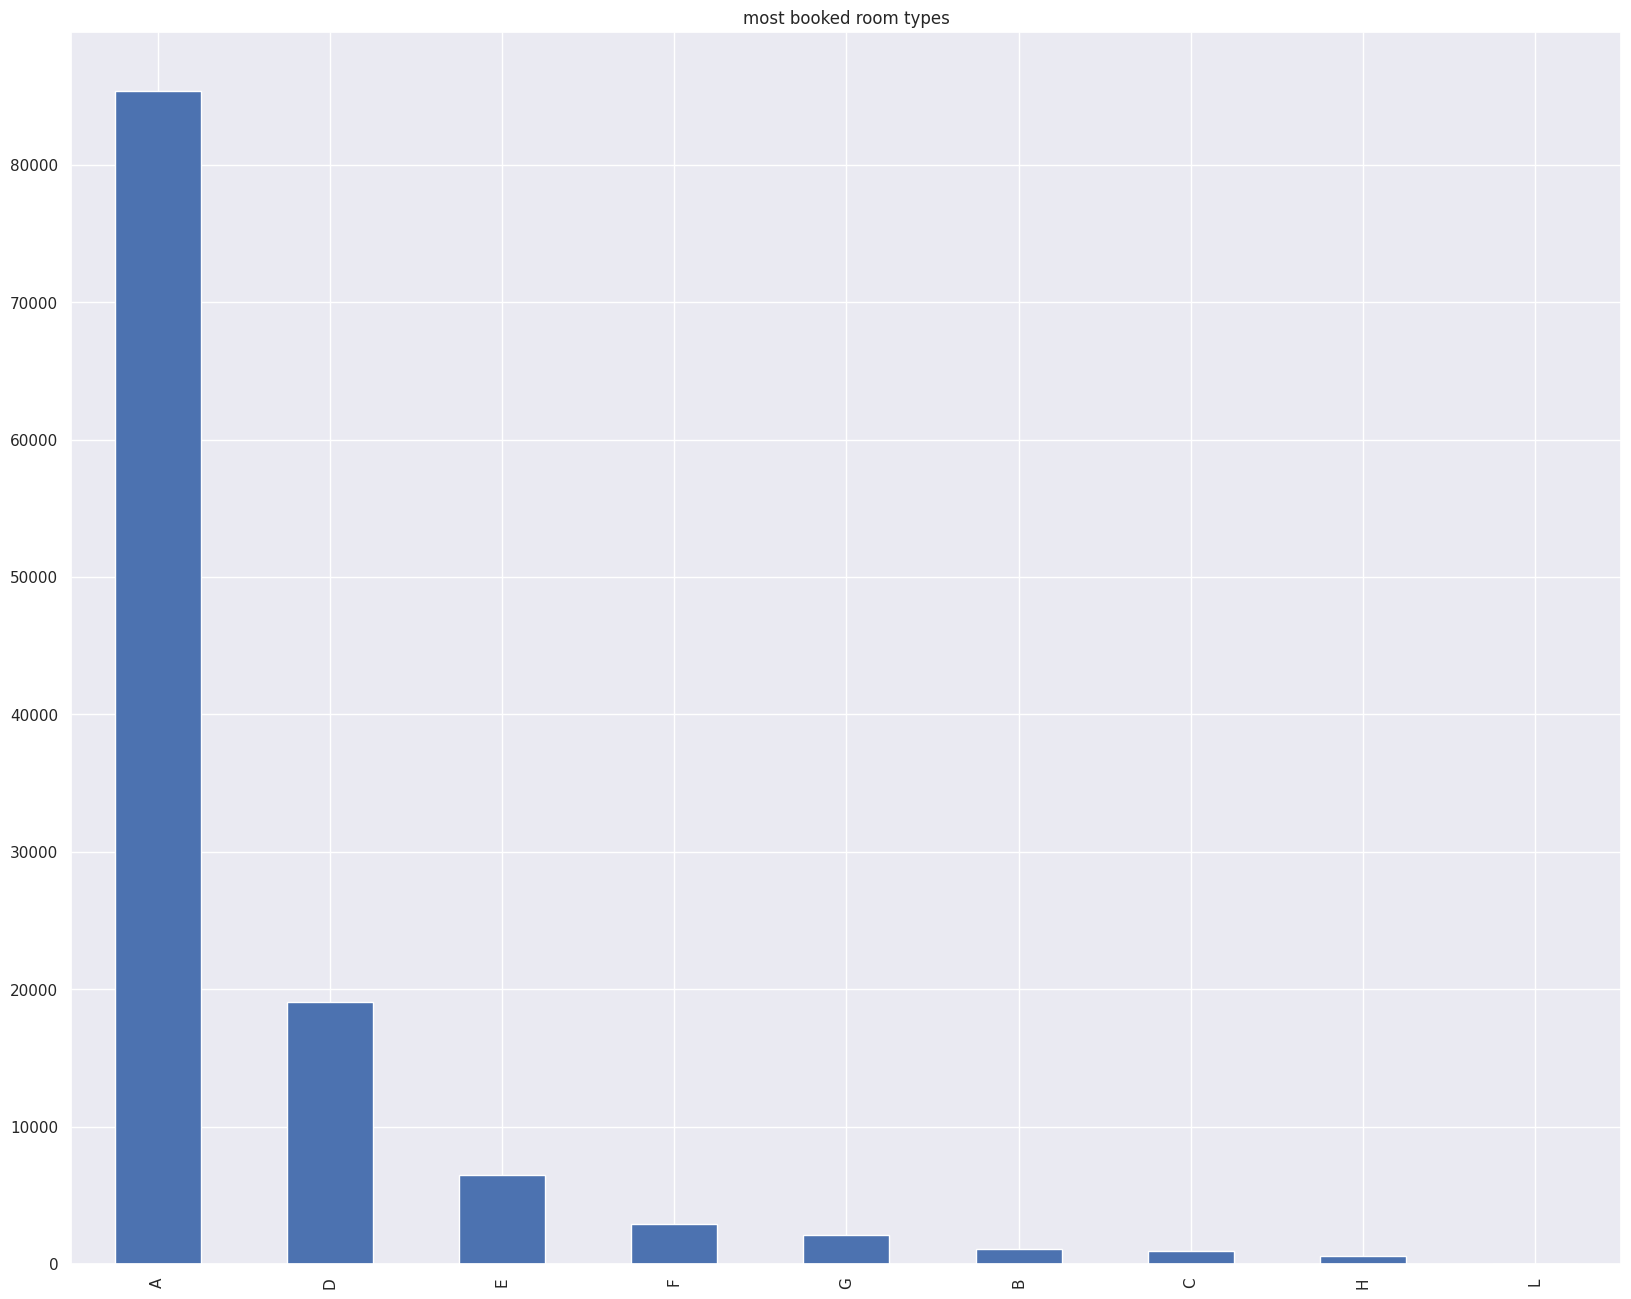

In [ ]:
# Most booked room type
df['reserved_room_type'].value_counts().plot(kind='bar',title="most booked room types");

 Exploring correlations between room types and cancellations

Text(0.5, 1.0, 'Cancellation Percentage by Reserved Room Type')

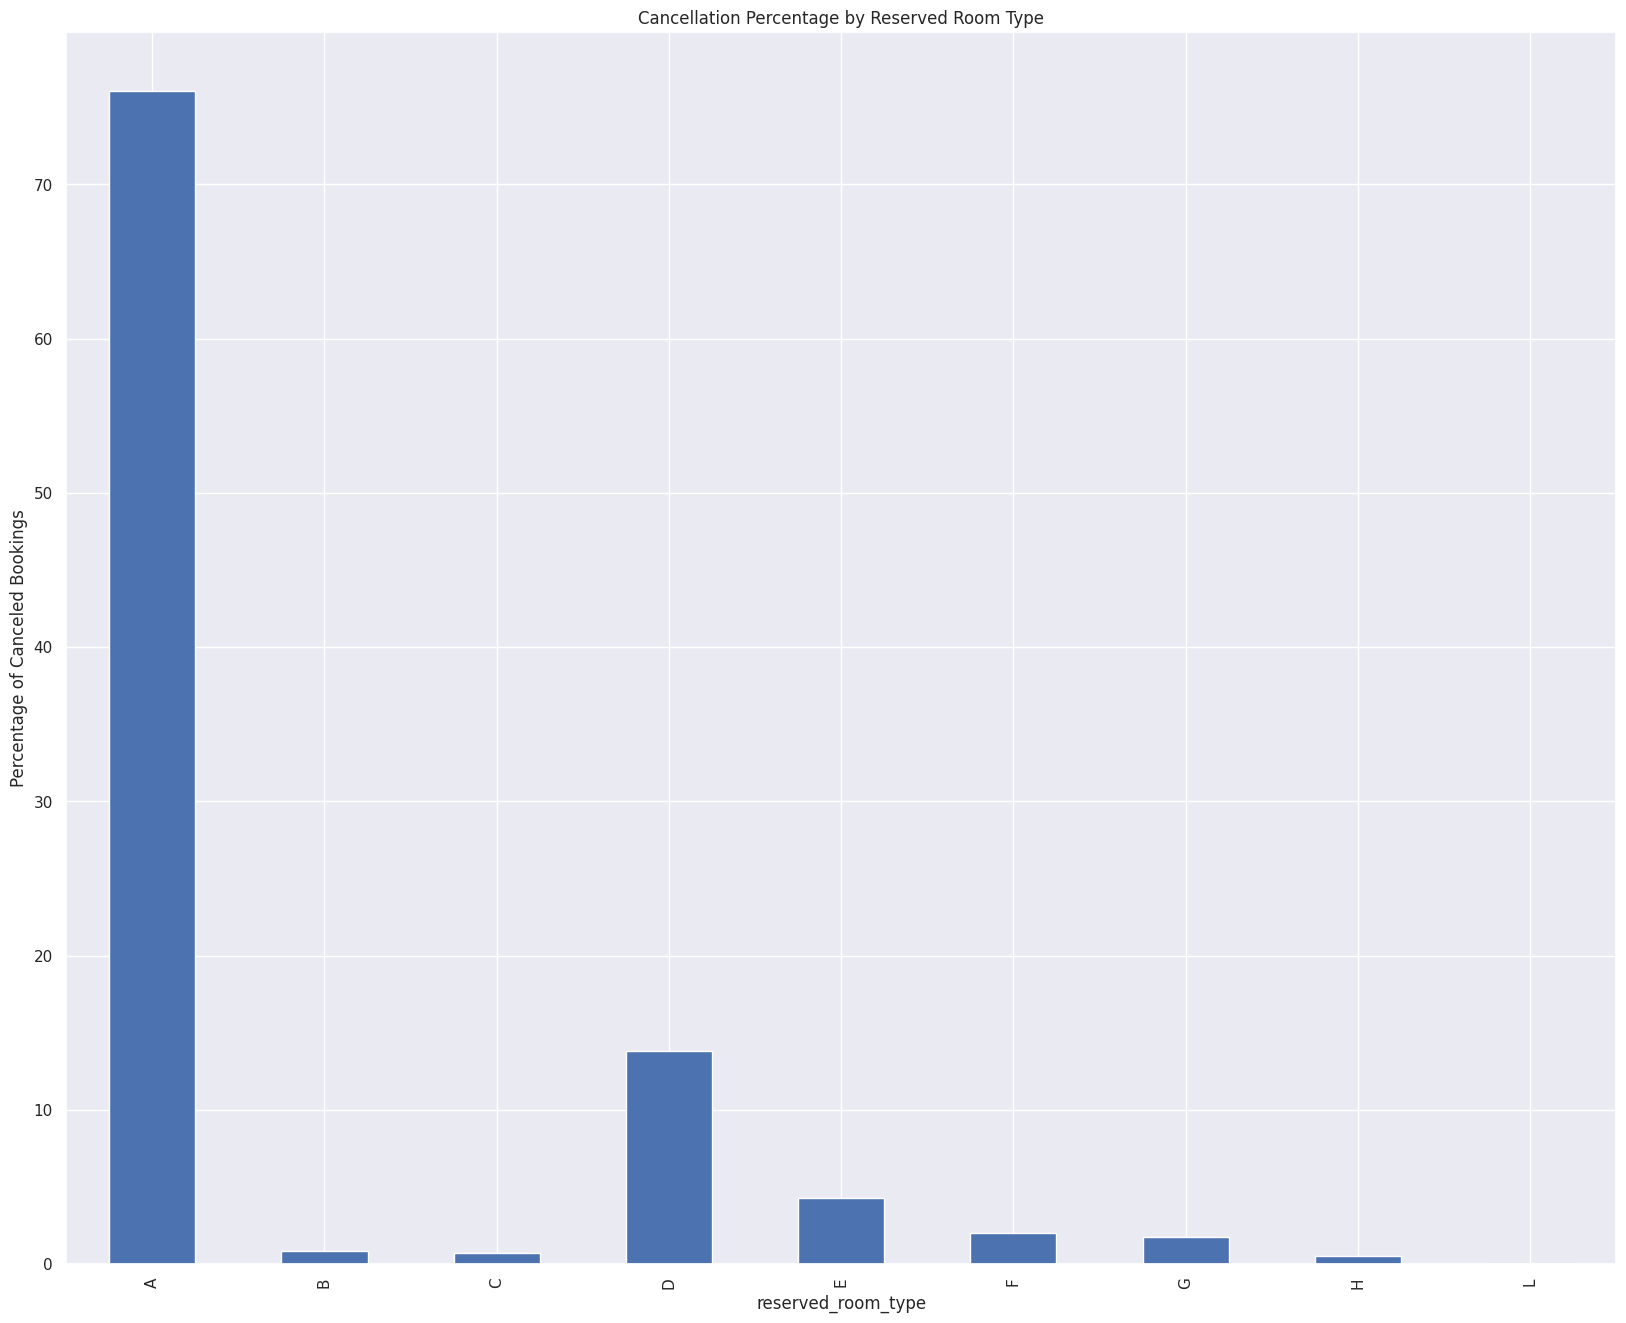

In [ ]:
#checking booking is cancelleed
canceled_bookings = df[df['is_canceled'] == 1]
#count cancellletion in repect of reserved room type
cancellation_counts = canceled_bookings.groupby('reserved_room_type')['is_canceled'].count()
#count total cancellation
total_canceled_bookings = cancellation_counts.sum()
#getting percentage and drawing plot
cancellation_percentage = (cancellation_counts / total_canceled_bookings * 100).plot(kind='bar')
#lable
plt.ylabel('Percentage of Canceled Bookings')
#title
plt.title('Cancellation Percentage by Reserved Room Type')


<Axes: ylabel='customer_type'>

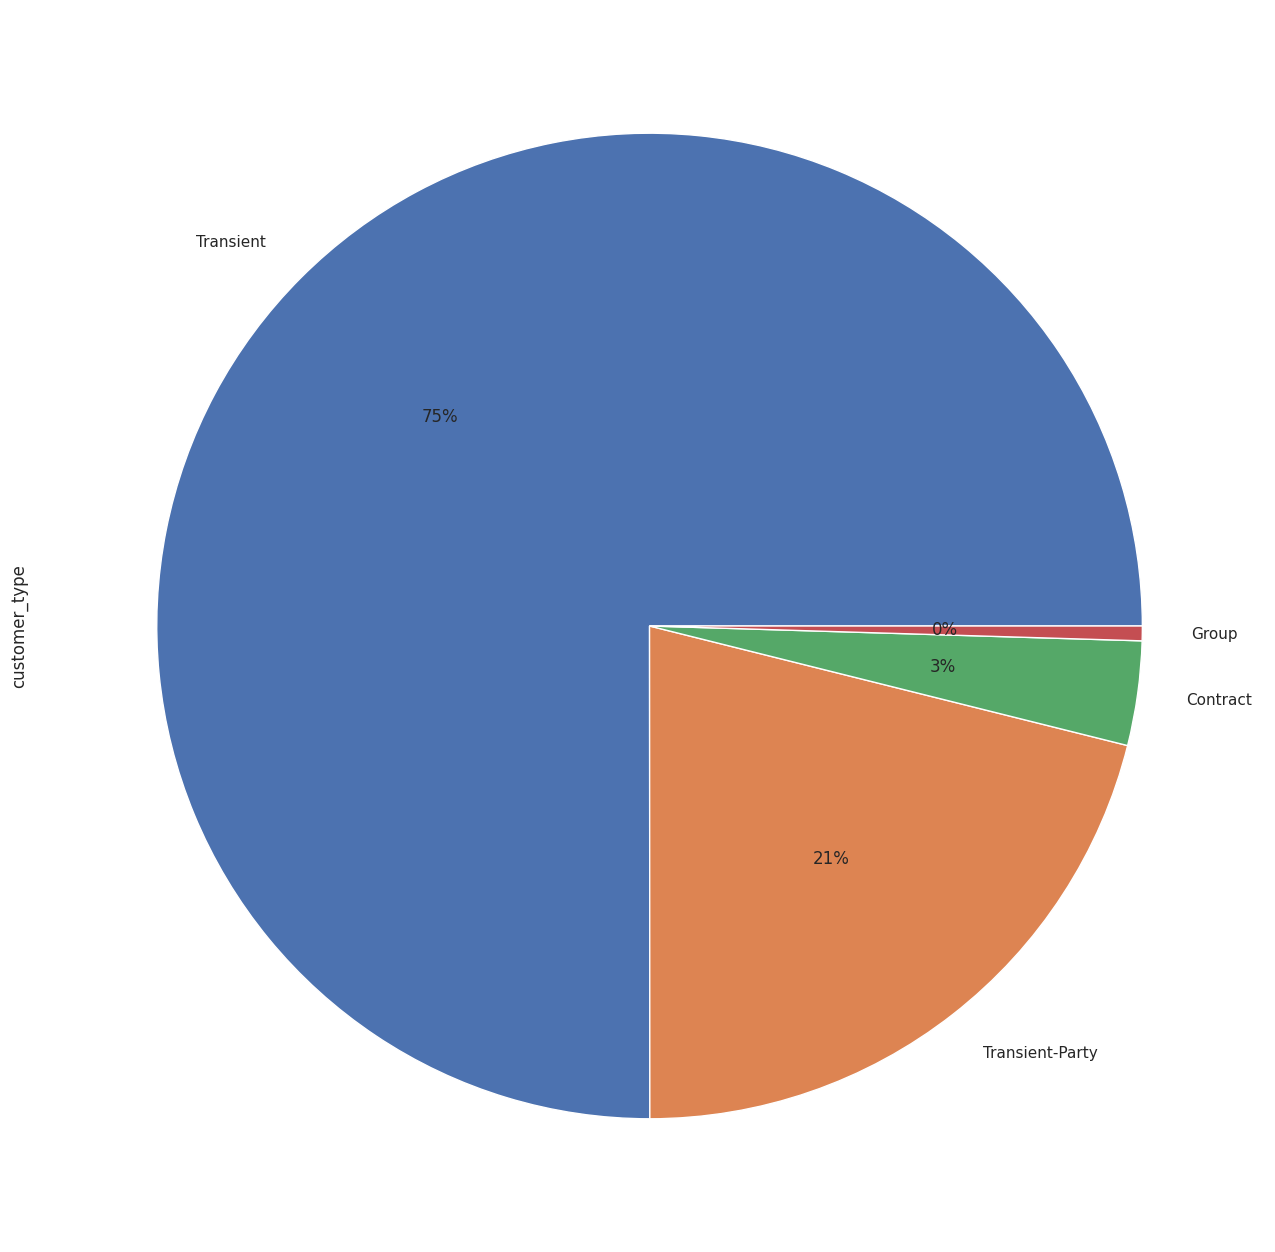

In [ ]:
# most common coustomer types by using pie charts
df['customer_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')

So Transient is the most common customer type

A line graph illustrating the number of guests each month.

Counting Number Of Guest in each Month

In [ ]:
df['arrival_date_month'].value_counts().sort_index()



April        11045
August       13812
December      6689
February      7998
January       5871
July         12586
June         10891
March         9716
May          11704
November      6712
October      11064
September    10477
Name: arrival_date_month, dtype: int64

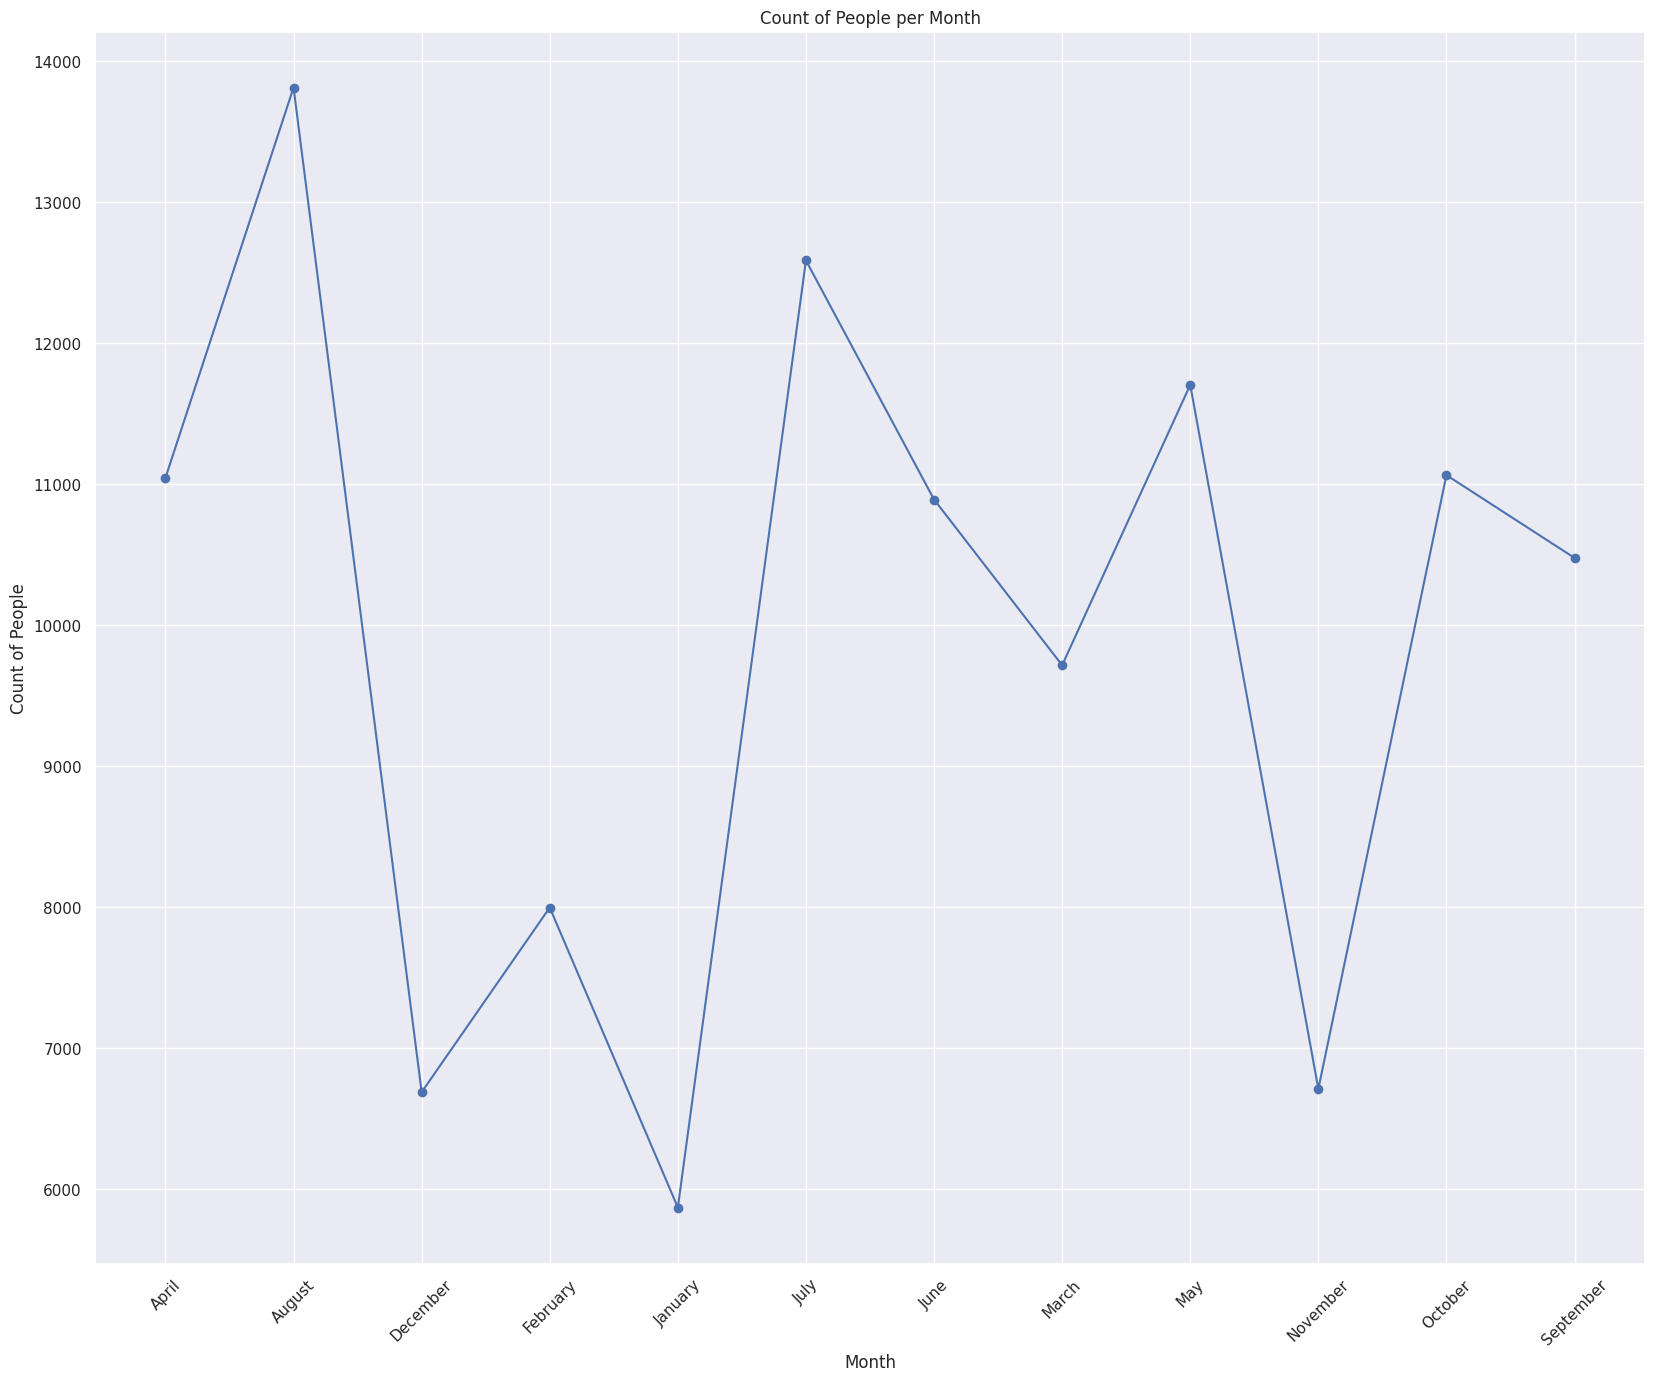

In [ ]:
# saving the number of guests
number_of_guest=df['arrival_date_month'].value_counts().sort_index()


# Plot the data
# Add circular markers ('o') at data points and connect them with a solid line ('-')
plt.plot(number_of_guest.index, number_of_guest.values, marker='o', linestyle='-')

# Set the label
plt.xlabel('Month')
plt.ylabel('Count of People')

# Set the title
plt.title('Count of People per Month')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add a grid to the plot
plt.grid(True)

# Display the plot
plt.show()


A bar graph depicting the duration of guest stays

In [ ]:
#total number of stay which will be stays in days+nights
df['stays_in_weekend_nights'] + df['stays_in_week_nights']

2         1
3         1
4         2
5         2
6         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Length: 118565, dtype: int64

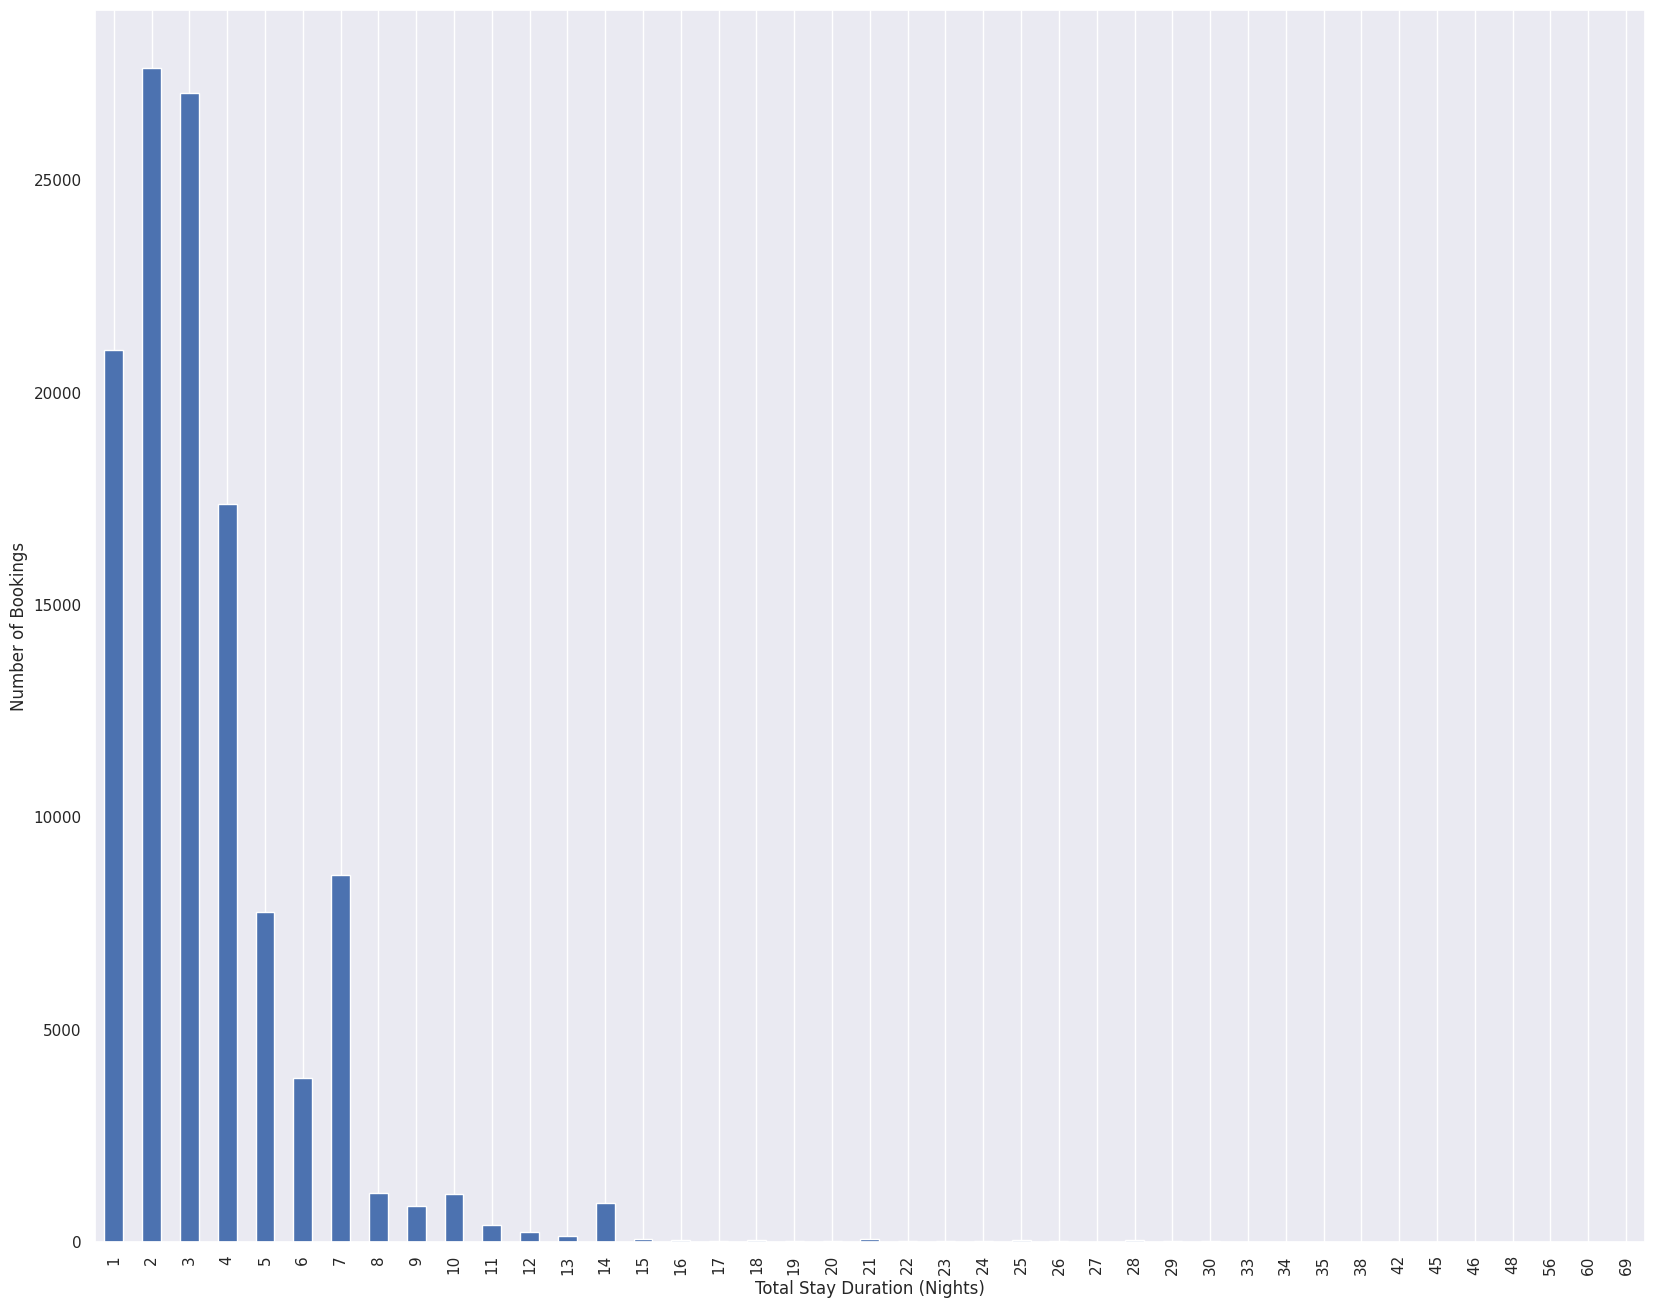

In [ ]:
#saving in a variable
df['total_stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Create a bar graph

df['total_stay_duration'].value_counts().sort_index().plot(kind='bar')
#lable
plt.xlabel('Total Stay Duration (Nights)')
plt.ylabel('Number of Bookings')

plt.grid(axis='y')
#displaying
plt.show()

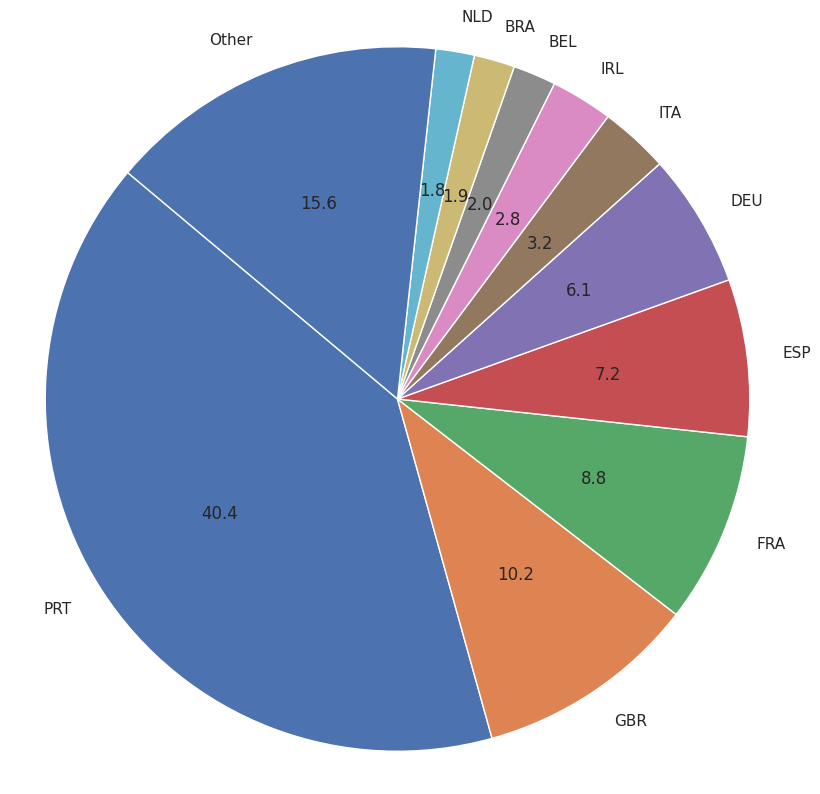

In [ ]:
# Count the number of guests from each country
country = df['country'].value_counts()

# Select the top 10 countries
top = country.head(10)

# Combine the rest of the countries in "Other"
if len(country) > 10:
    other = country[10:].sum()
    top['Other'] = other

# Pie chart
plt.figure(figsize=(10, 10))
plt.pie(top, labels=top.index, autopct='%.1f', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()


# 3. Feature Engineering (25%)


---





Apply various feature engineering techniques, covered in the lectures and practicles.

Hint:

* Binning
* Encoding
* **Outlier identification and handling**
* Variance, Covariance, Correlation, Correlation Heapmap
* Scaling

Binning


Conversiting lead_times in catalorgies of small medium and high

In [ ]:
#set limit
limit = [0, 100, 200, float("inf")]
#set catagories
values = ["Small", "Medium", "High"]
#replaceing numeric with catagory
df['lead_time'] = pd.cut(df['lead_time'], bins=limit, labels=values)


Making Sure

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,total_of_special_requests,total_stay_duration
2,Resort Hotel,0,Small,July,0,1,1,0.0,0,BB,...,0,0,A,C,0,No Deposit,0,Transient,0,1
3,Resort Hotel,0,Small,July,0,1,1,0.0,0,BB,...,0,0,A,A,0,No Deposit,0,Transient,0,1
4,Resort Hotel,0,Small,July,0,2,2,0.0,0,BB,...,0,0,A,A,0,No Deposit,0,Transient,1,2
5,Resort Hotel,0,Small,July,0,2,2,0.0,0,BB,...,0,0,A,A,0,No Deposit,0,Transient,1,2
6,Resort Hotel,0,NaN,July,0,2,2,0.0,0,BB,...,0,0,C,C,0,No Deposit,0,Transient,0,2


Converting catlogic data to numeric

In [ ]:
# Initialize
label_encoder = LabelEncoder()

# Get the categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Apply label encoding
df[categorical_columns] = df[categorical_columns].apply(lambda x: label_encoder.fit_transform(x))


Encoding

Converting objects data type to numeric

In [ ]:
df['hotel'] = df['hotel'].astype('category')
df['hotel'] = df['hotel'].cat.codes

In [ ]:

df['meal'] = df['meal'].astype('category')
df['meal'] = df['meal'].cat.codes

In [ ]:
df['arrival_date_month'] = df['arrival_date_month'].astype('category')
df['arrival_date_month'] = df['arrival_date_month'].cat.codes

In [ ]:
df['market_segment'] = df['market_segment'].astype('category')
df['market_segment'] = df['market_segment'].cat.codes

In [ ]:
df['distribution_channel'] = df['distribution_channel'].astype('category')
df['distribution_channel'] = df['distribution_channel'].cat.codes


In [ ]:
df['reserved_room_type'] = df['reserved_room_type'].astype('category')
df['reserved_room_type'] = df['reserved_room_type'].cat.codes

In [ ]:
df['customer_type'] = df['customer_type'].astype('category')
df['customer_type'] = df['customer_type'].cat.codes

In [ ]:
df['assigned_room_type'] = df['assigned_room_type'].astype('category')
df['assigned_room_type'] = df['assigned_room_type'].cat.codes

In [ ]:


df['deposit_type'] = df['deposit_type'].astype('category')
df['deposit_type'] = df['deposit_type'].cat.codes

making Sure

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,total_of_special_requests,total_stay_duration
2,1,0,2,5,0,1,1,0.0,0,0,...,0,0,0,2,0,0,0,2,0,1
3,1,0,2,5,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,2,0,1
4,1,0,2,5,0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,2,1,2
5,1,0,2,5,0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,2,1,2
6,1,0,3,5,0,2,2,0.0,0,0,...,0,0,2,2,0,0,0,2,0,2


Making sure there are no object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  int8   
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_month              118565 non-null  int8   
 4   stays_in_weekend_nights         118565 non-null  int64  
 5   stays_in_week_nights            118565 non-null  int64  
 6   adults                          118565 non-null  int64  
 7   children                        118565 non-null  float64
 8   babies                          118565 non-null  int64  
 9   meal                            118565 non-null  int8   
 10  country                         118565 non-null  int64  
 11  market_segment                  118565 non-null  int8   
 12  distribution_cha

Box Plot

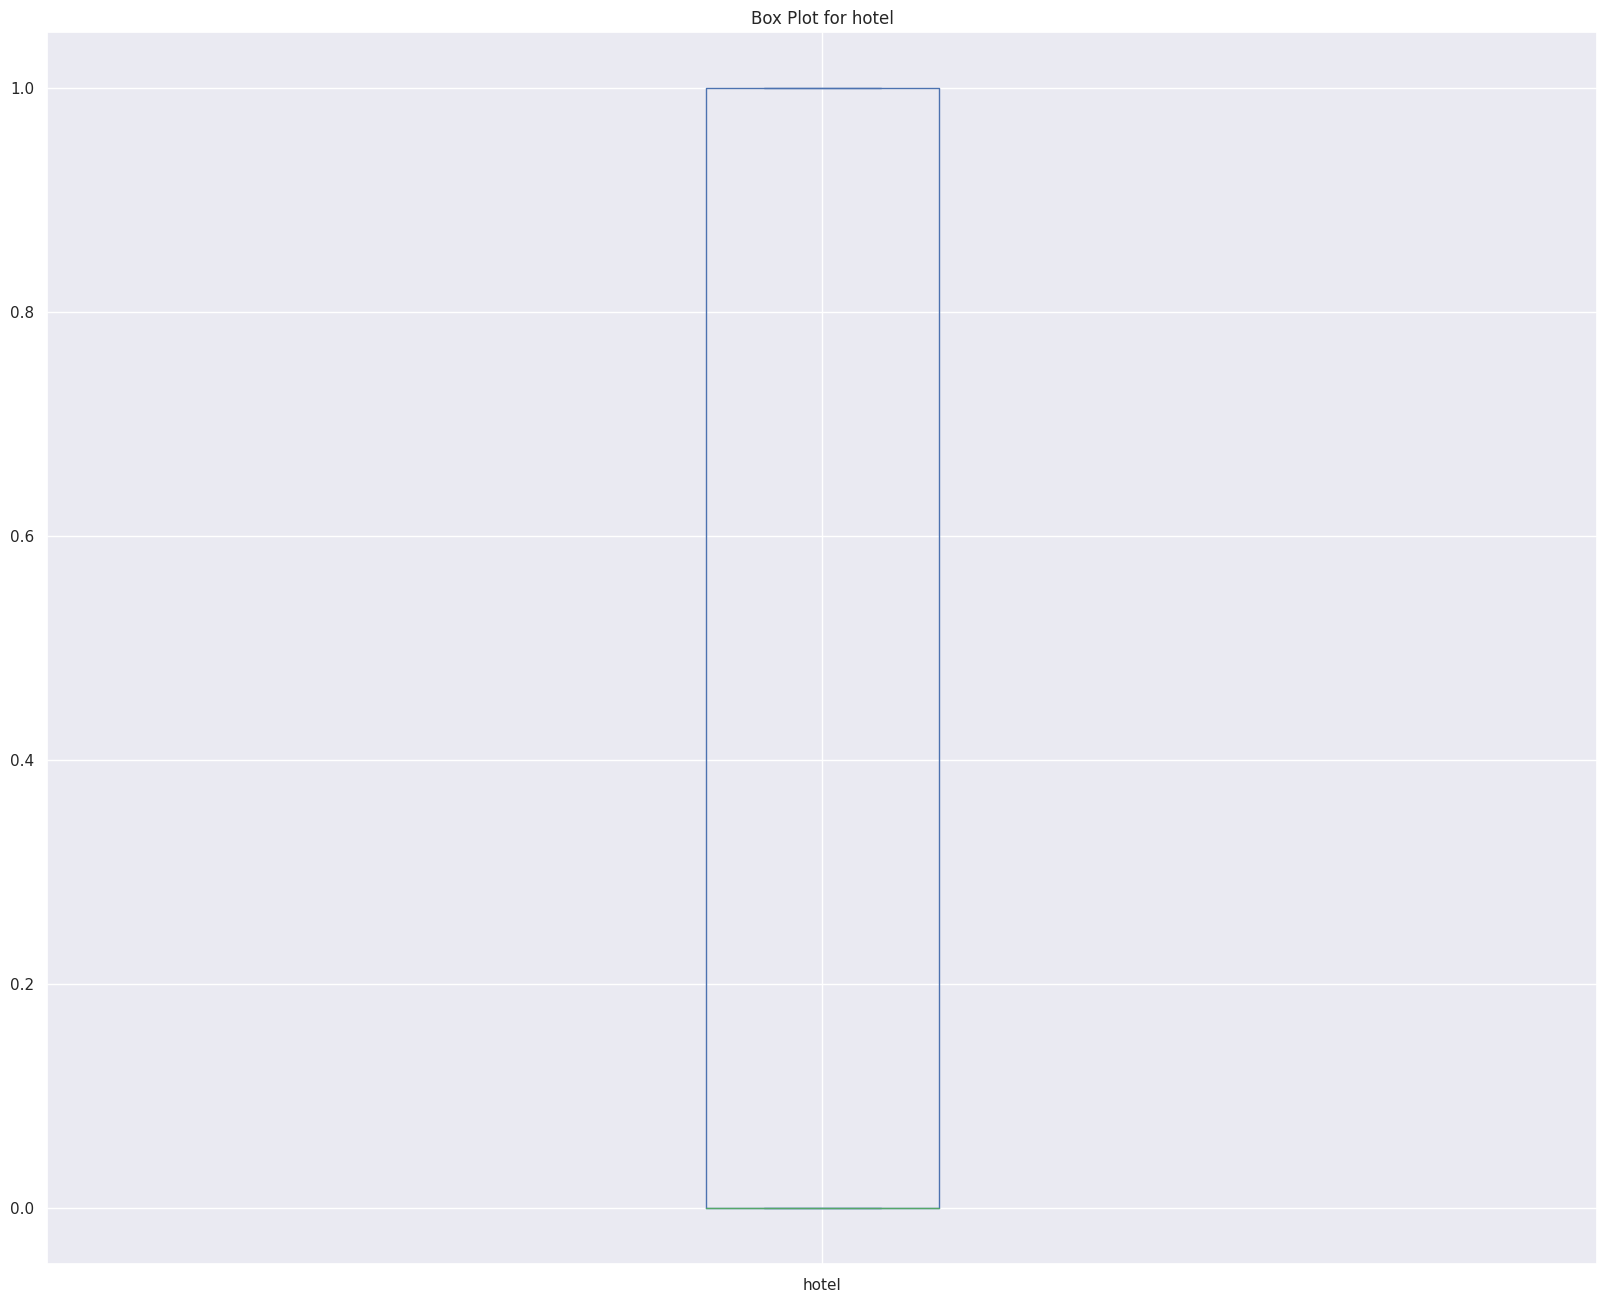

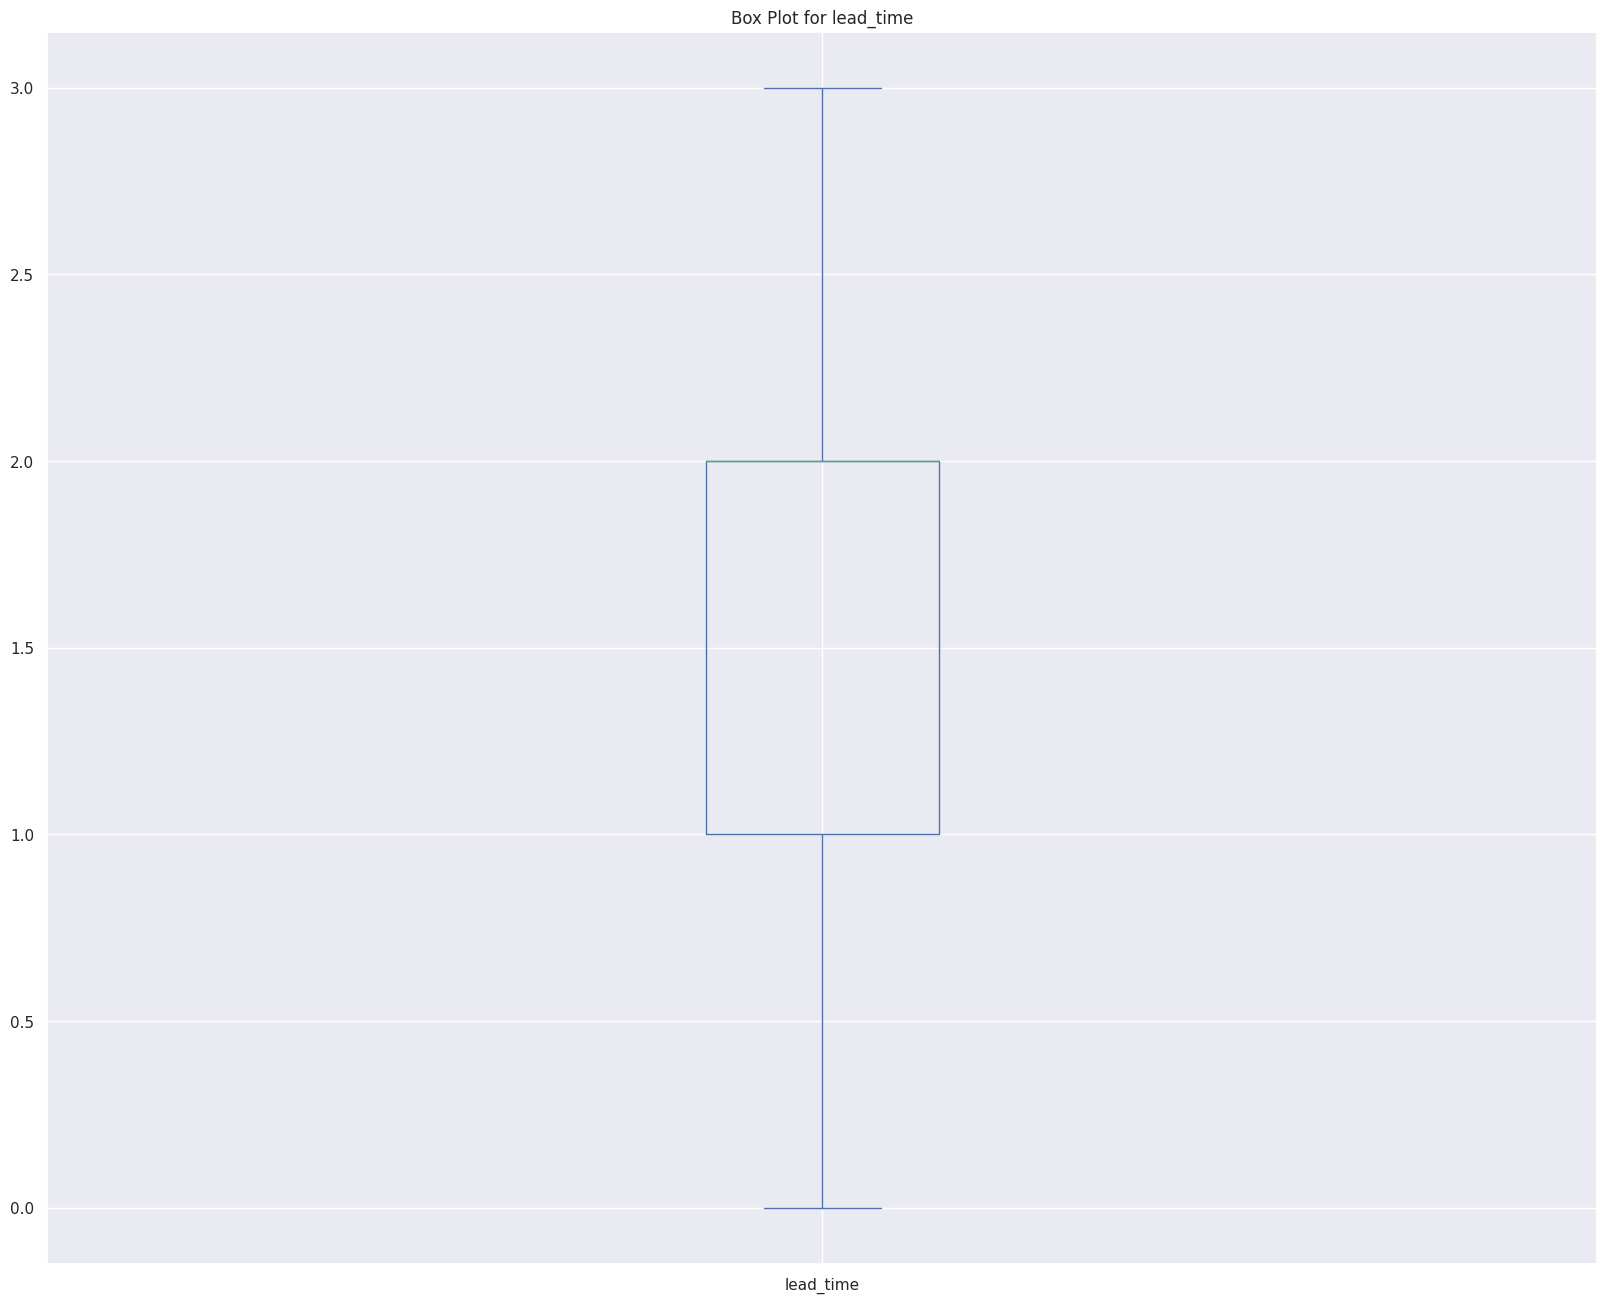

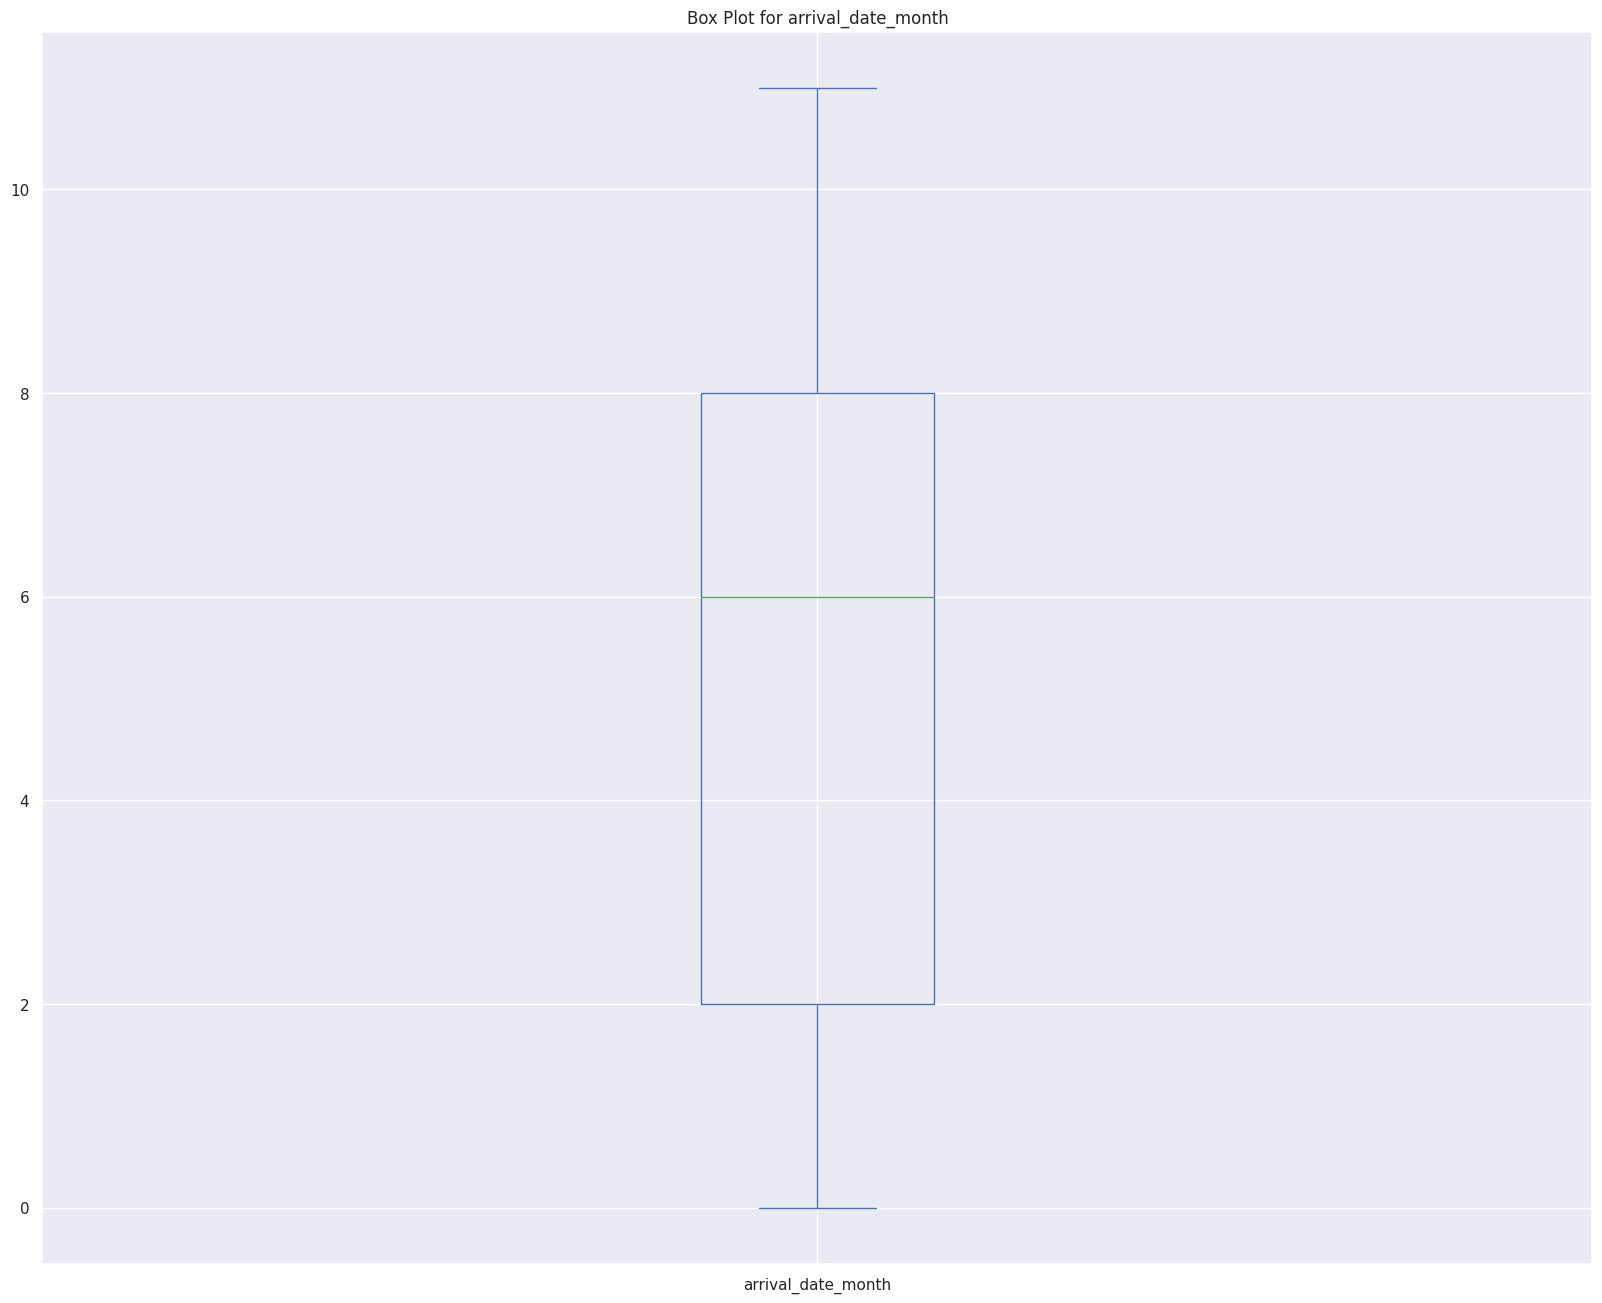

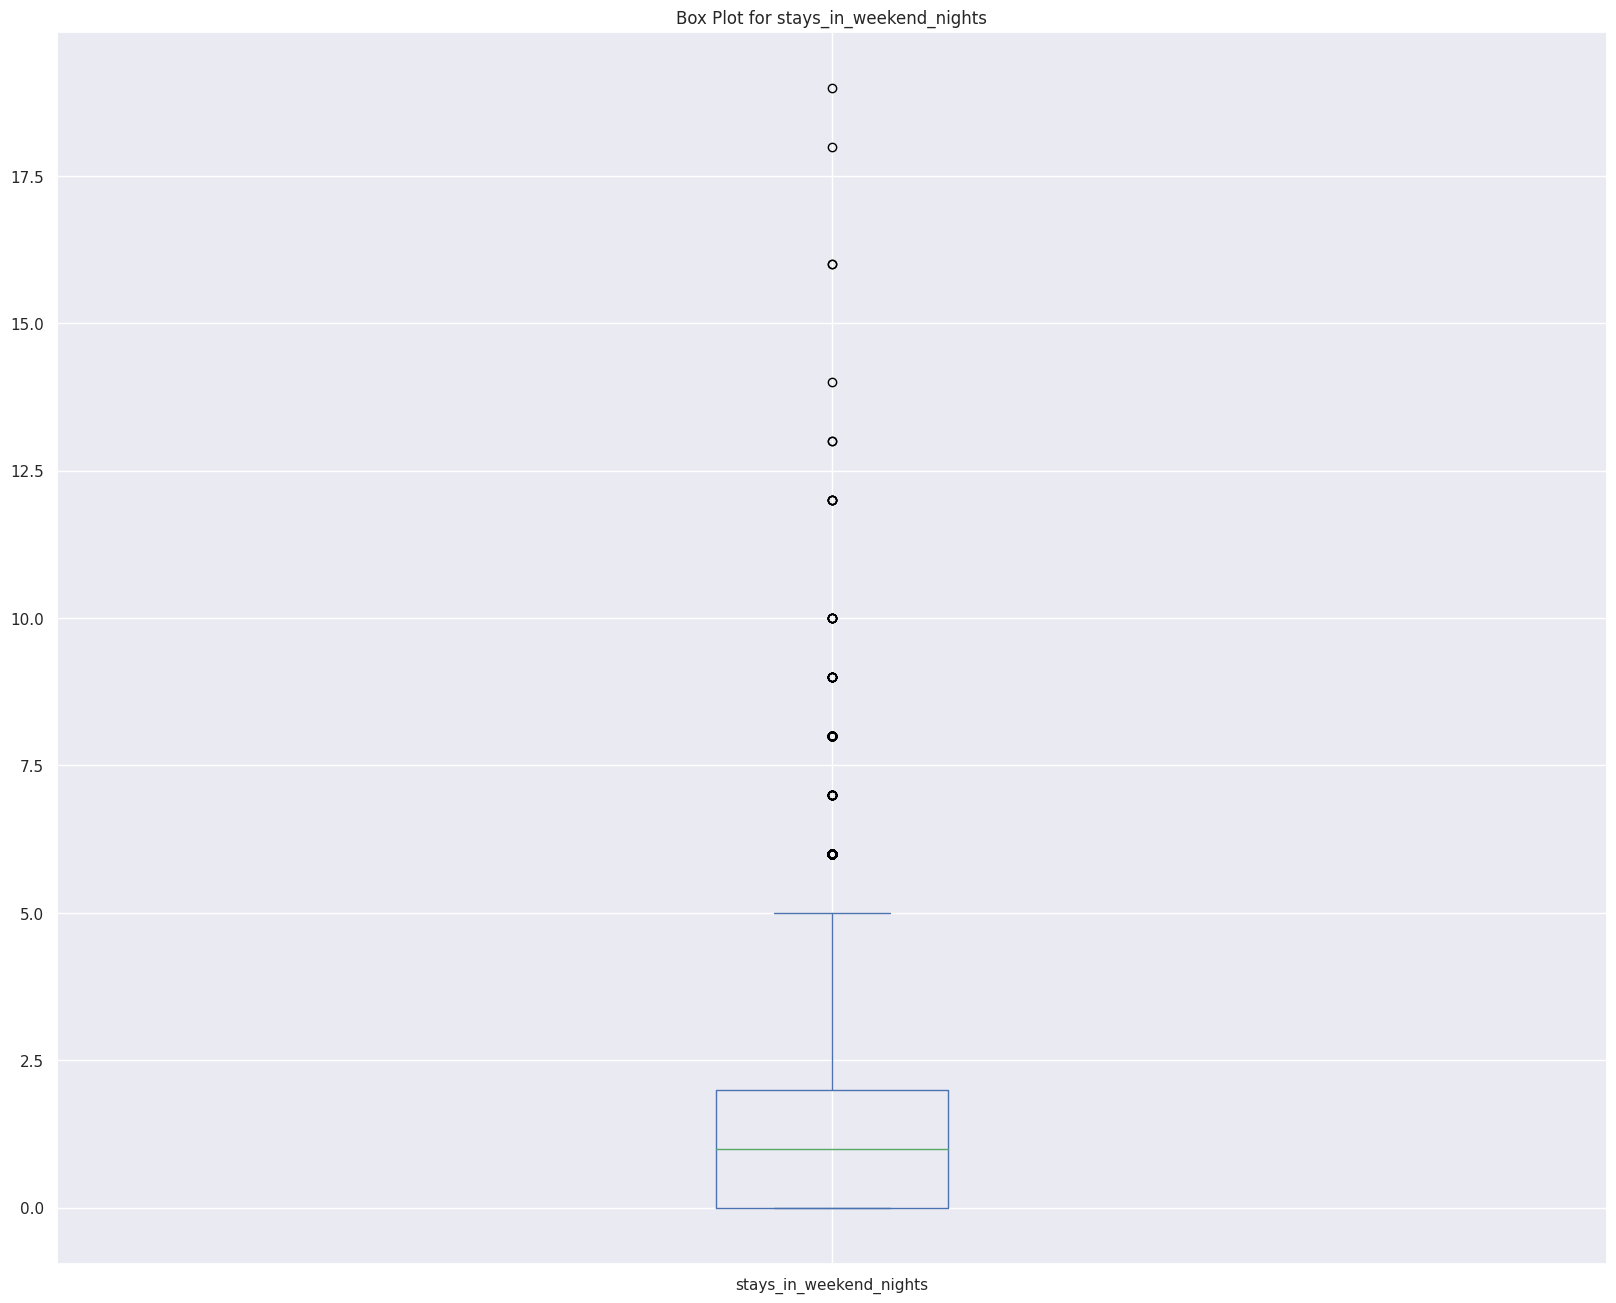

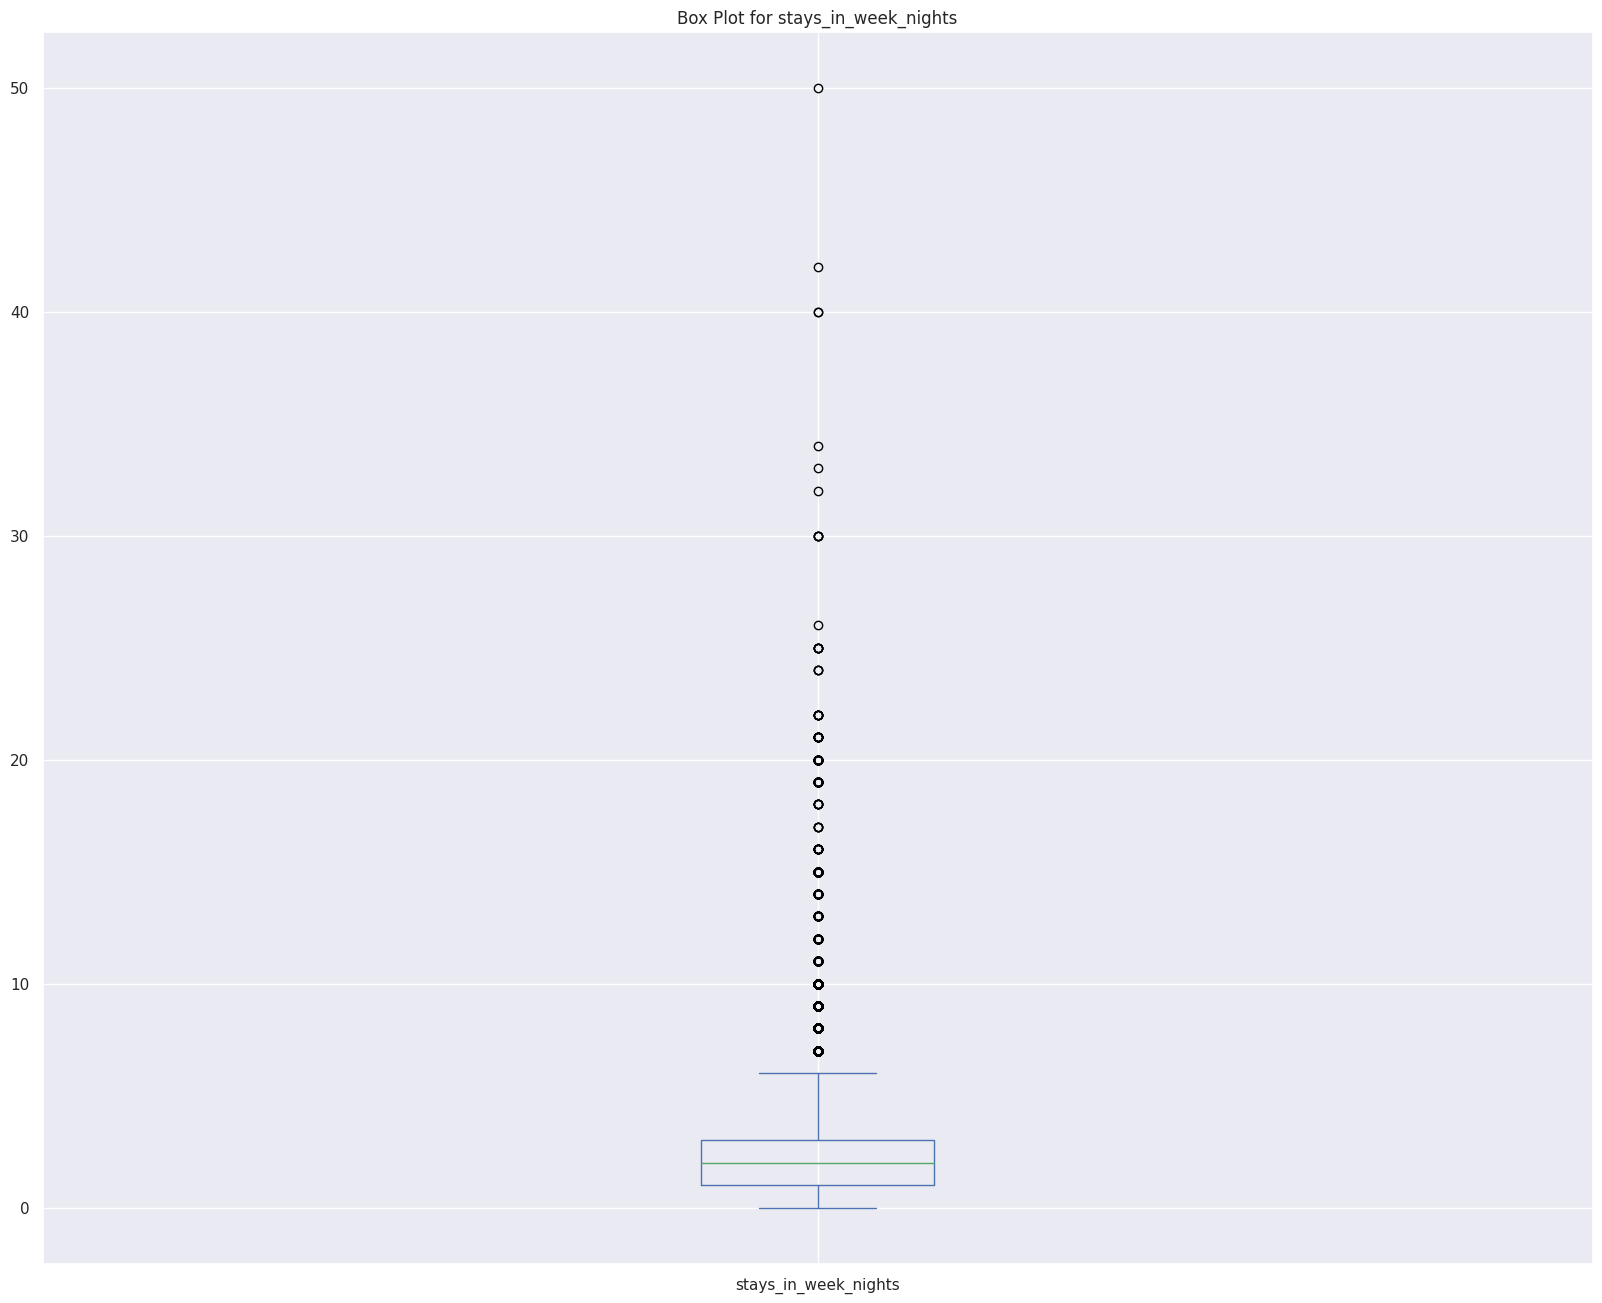

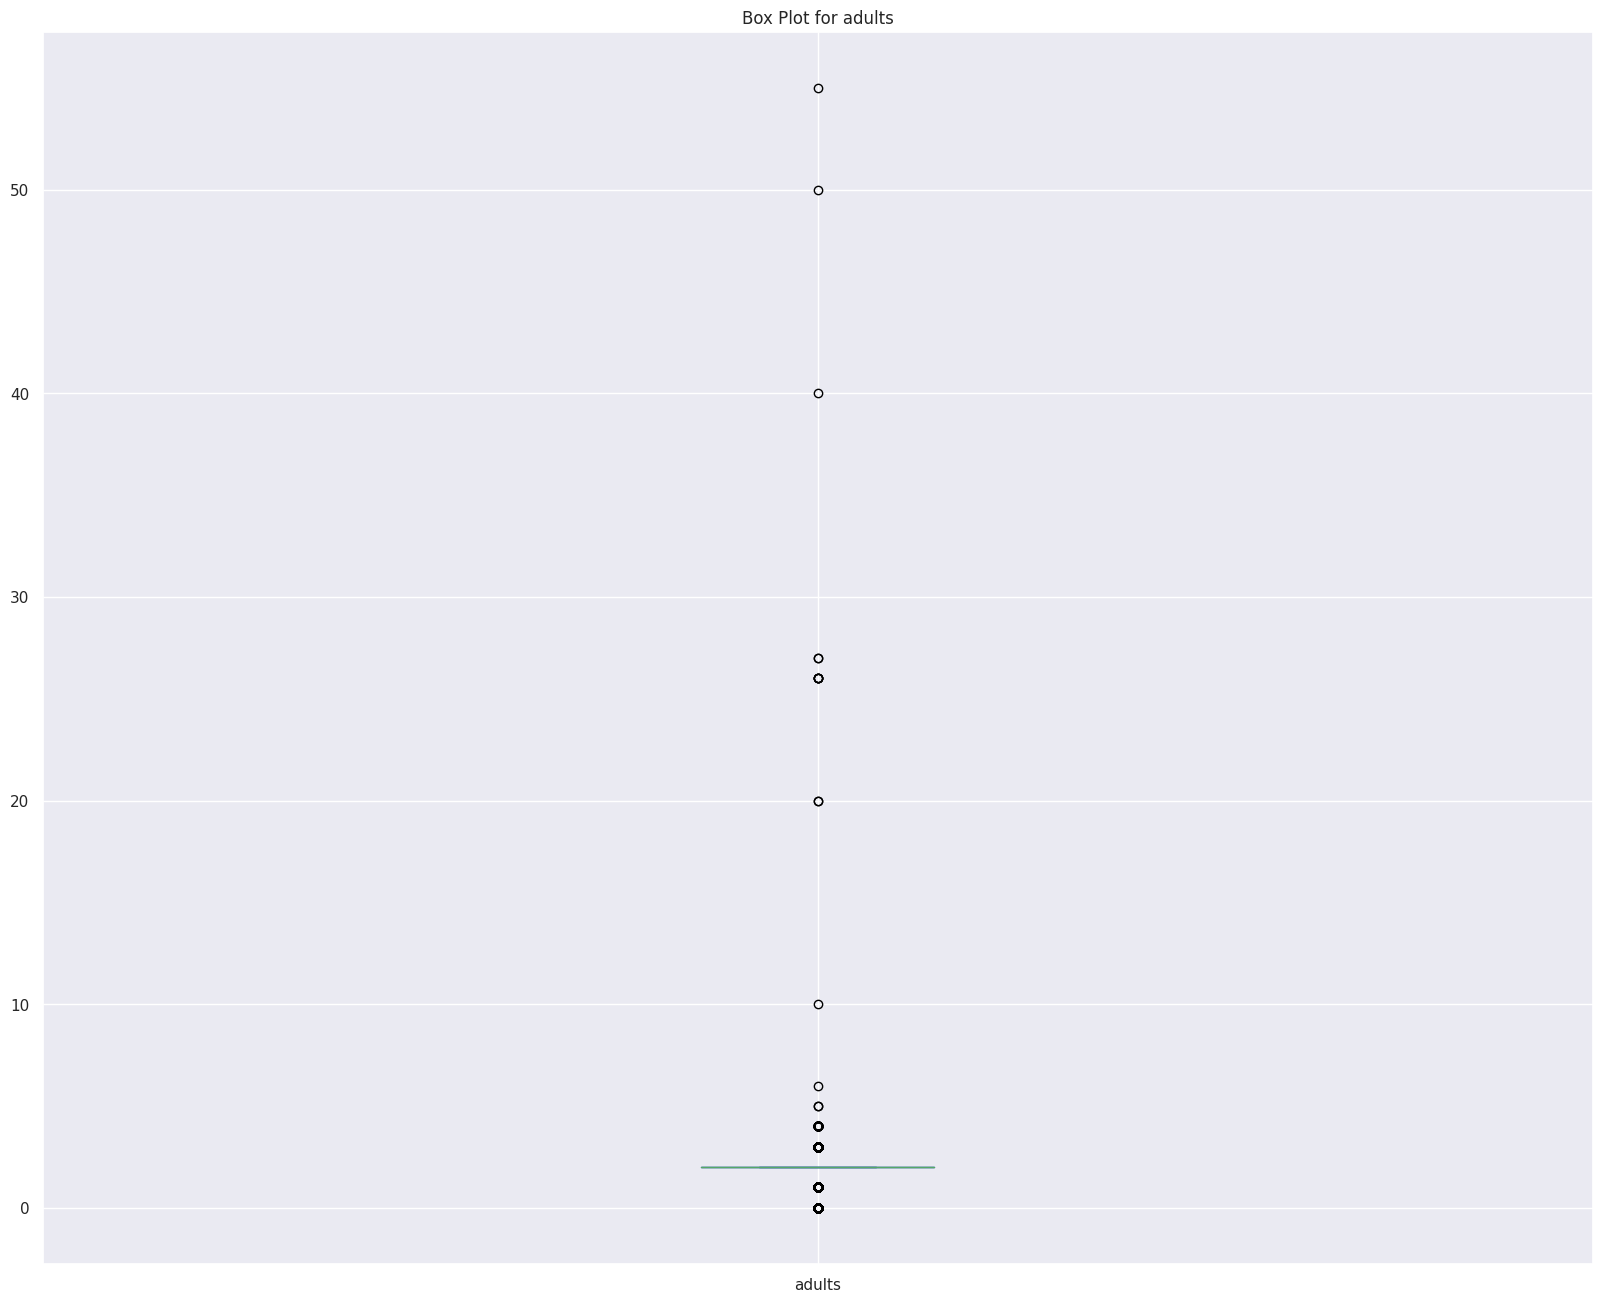

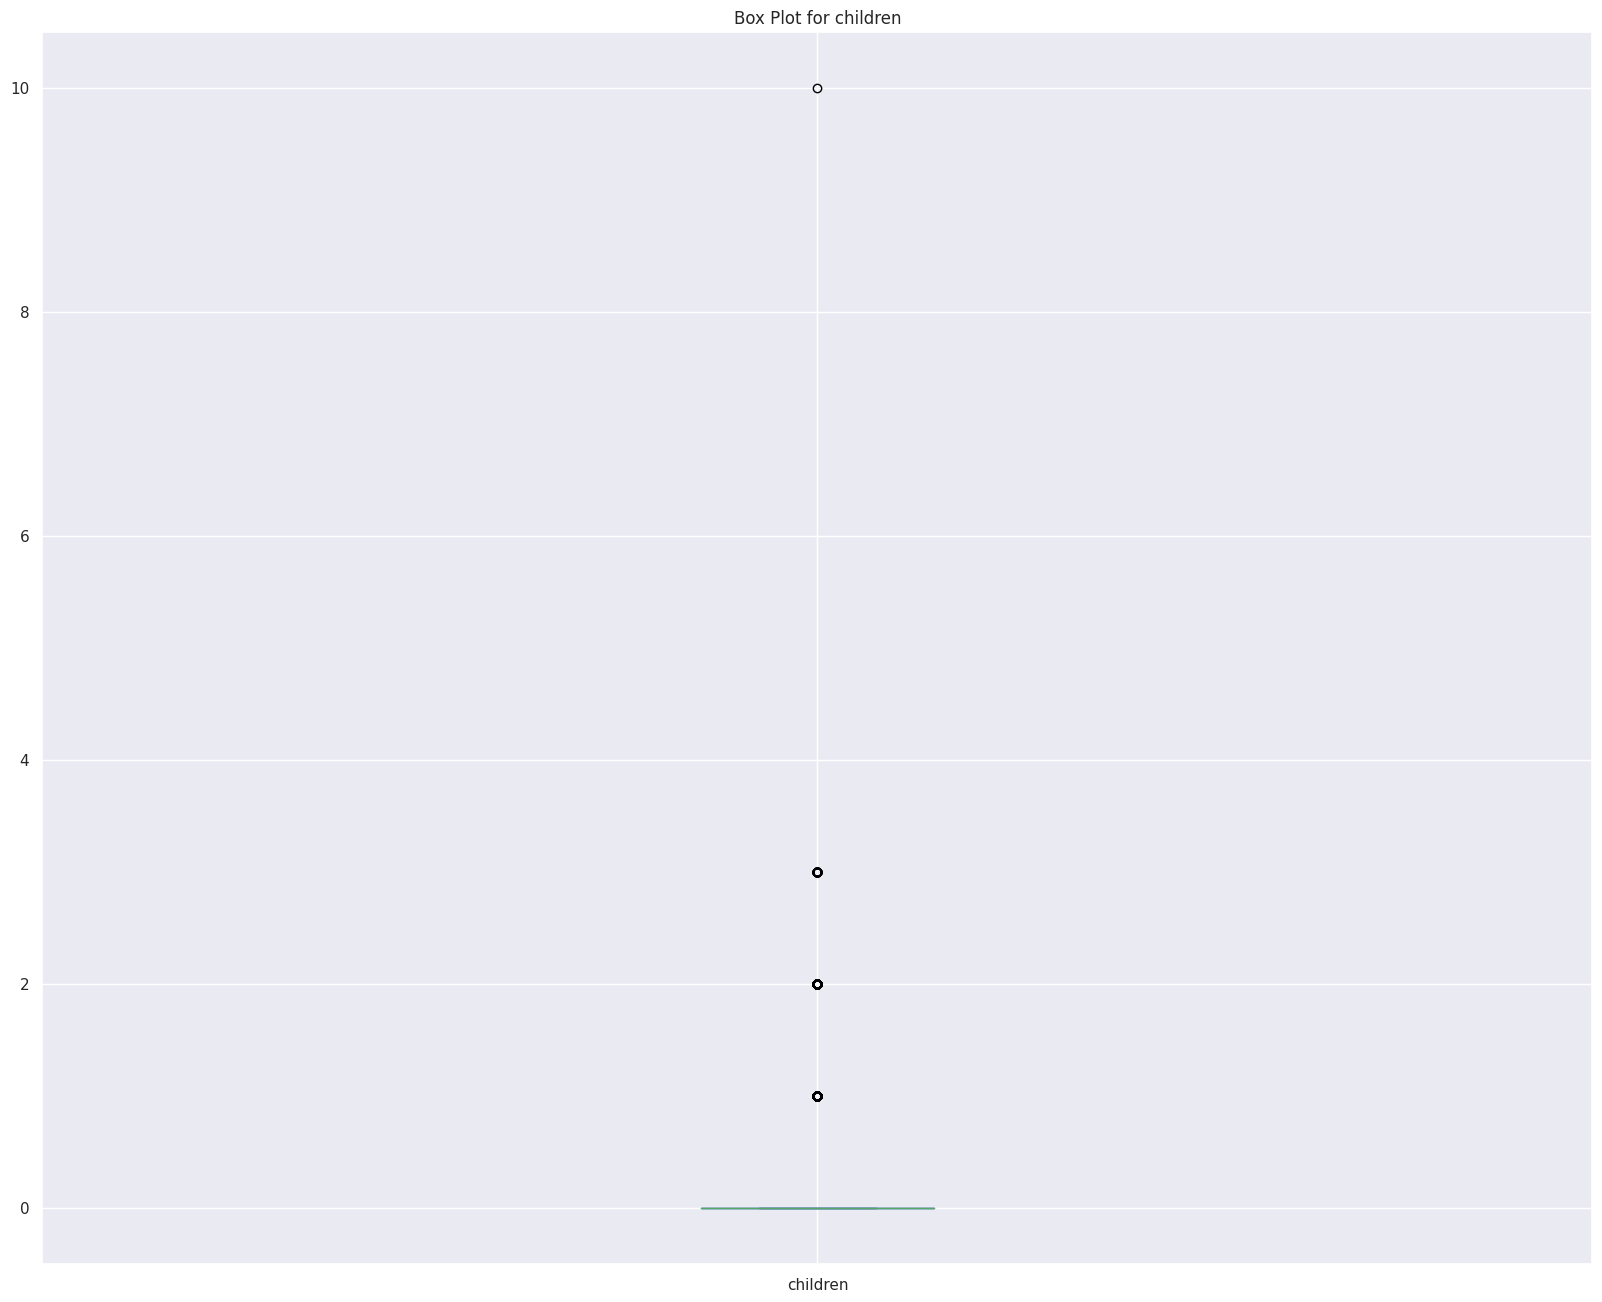

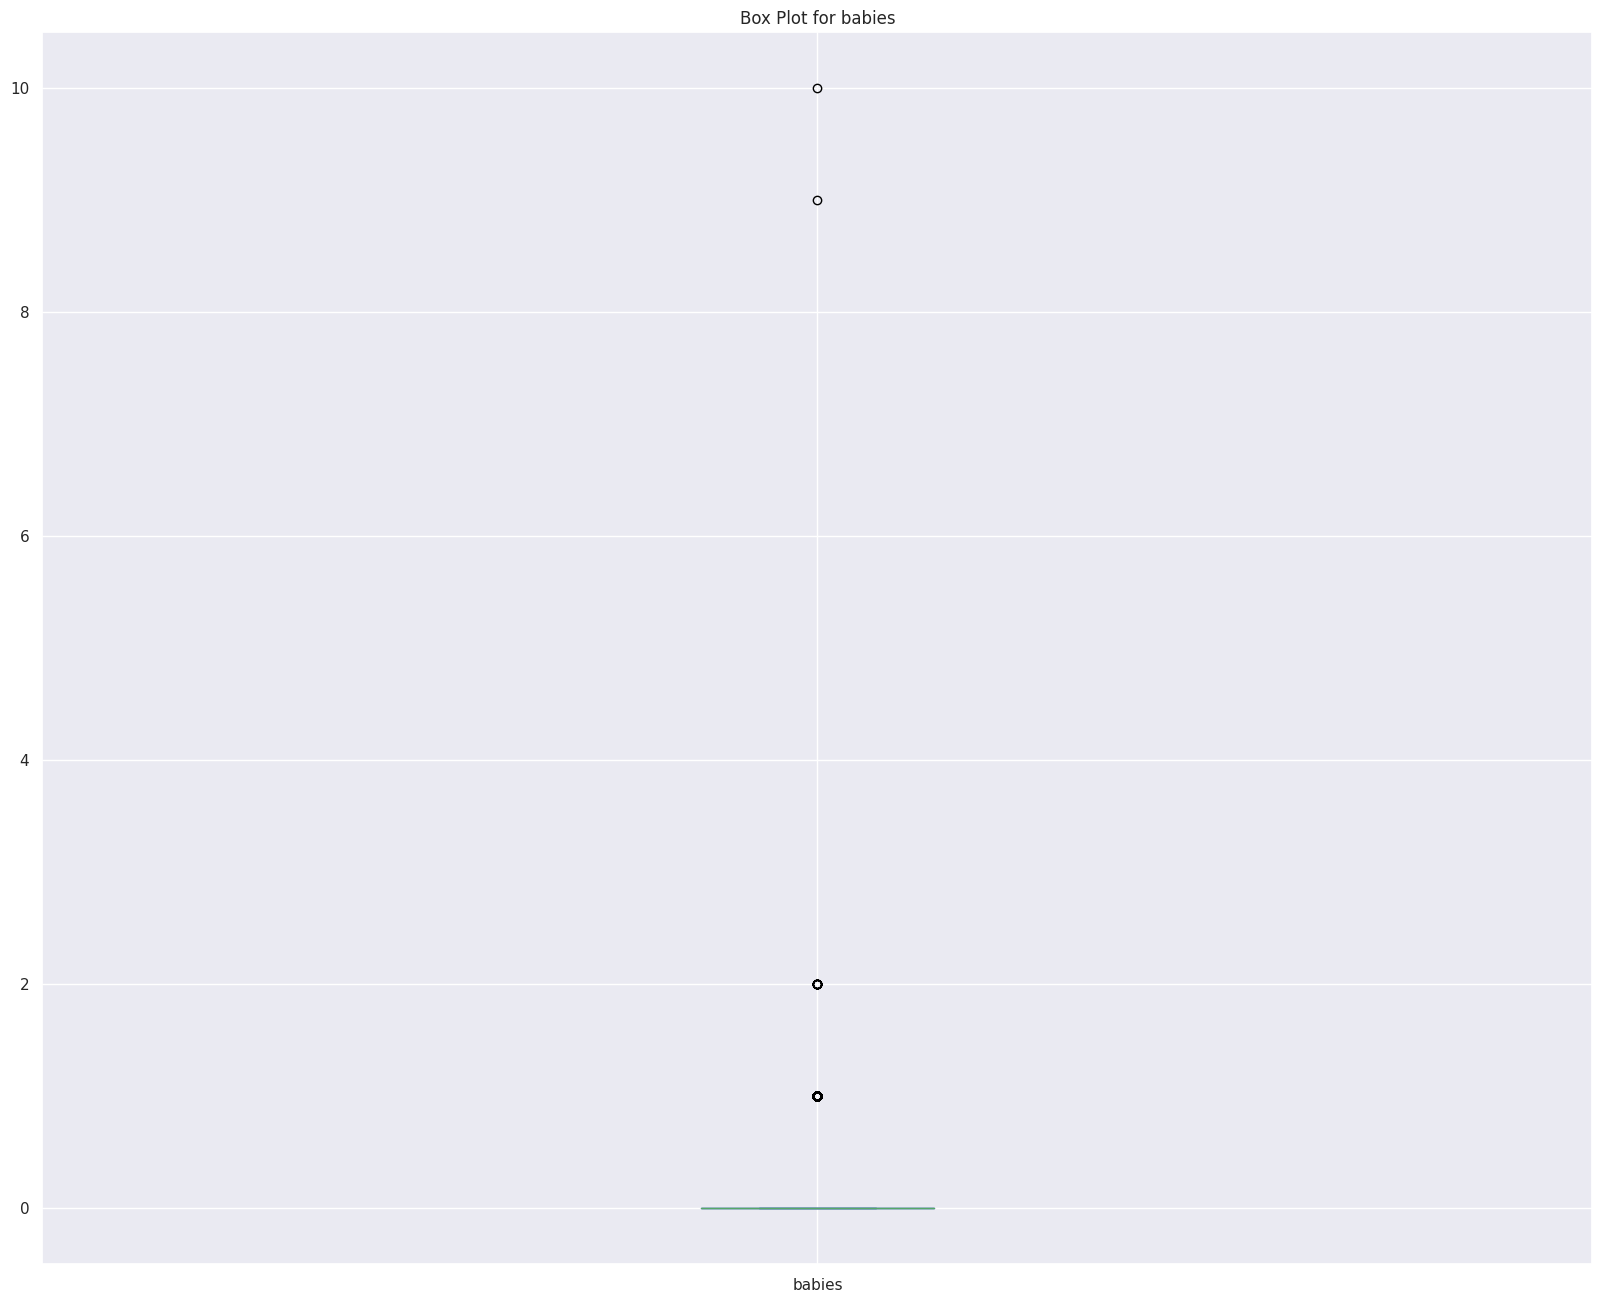

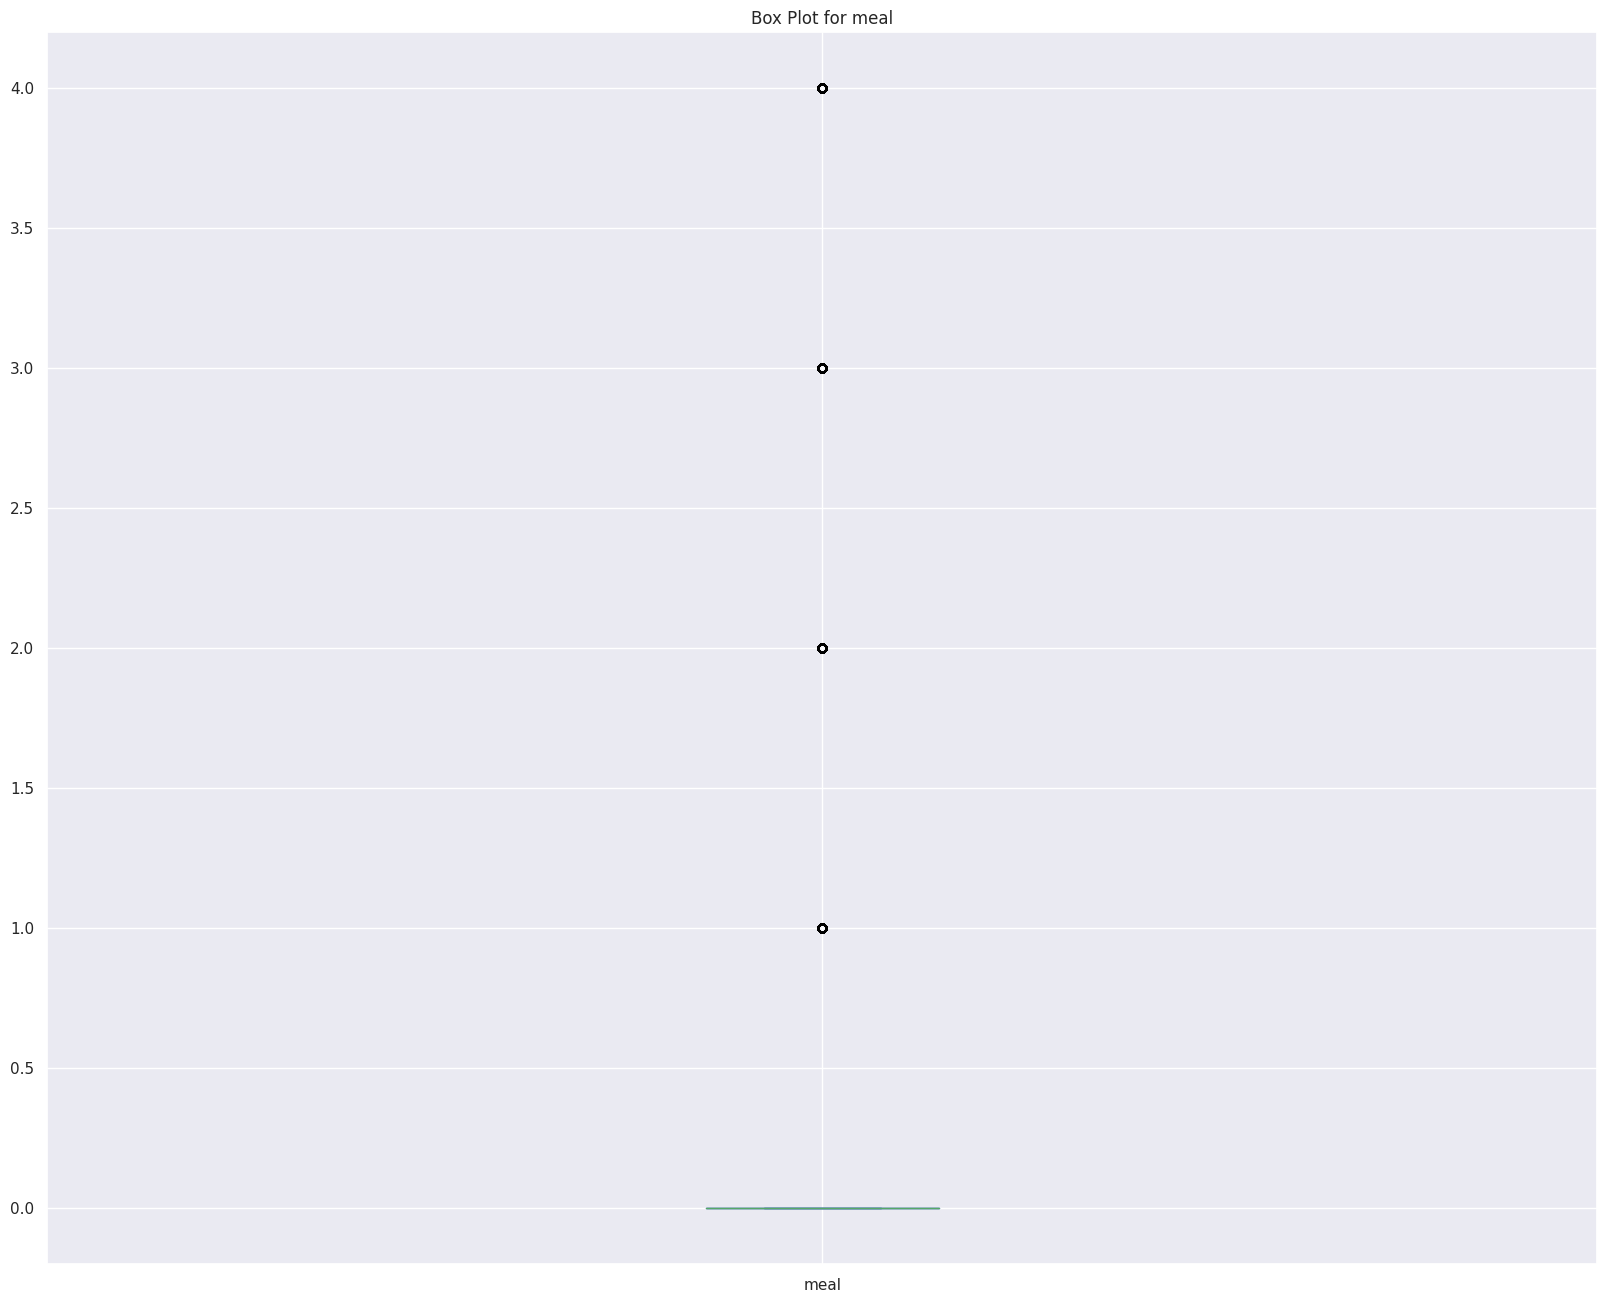

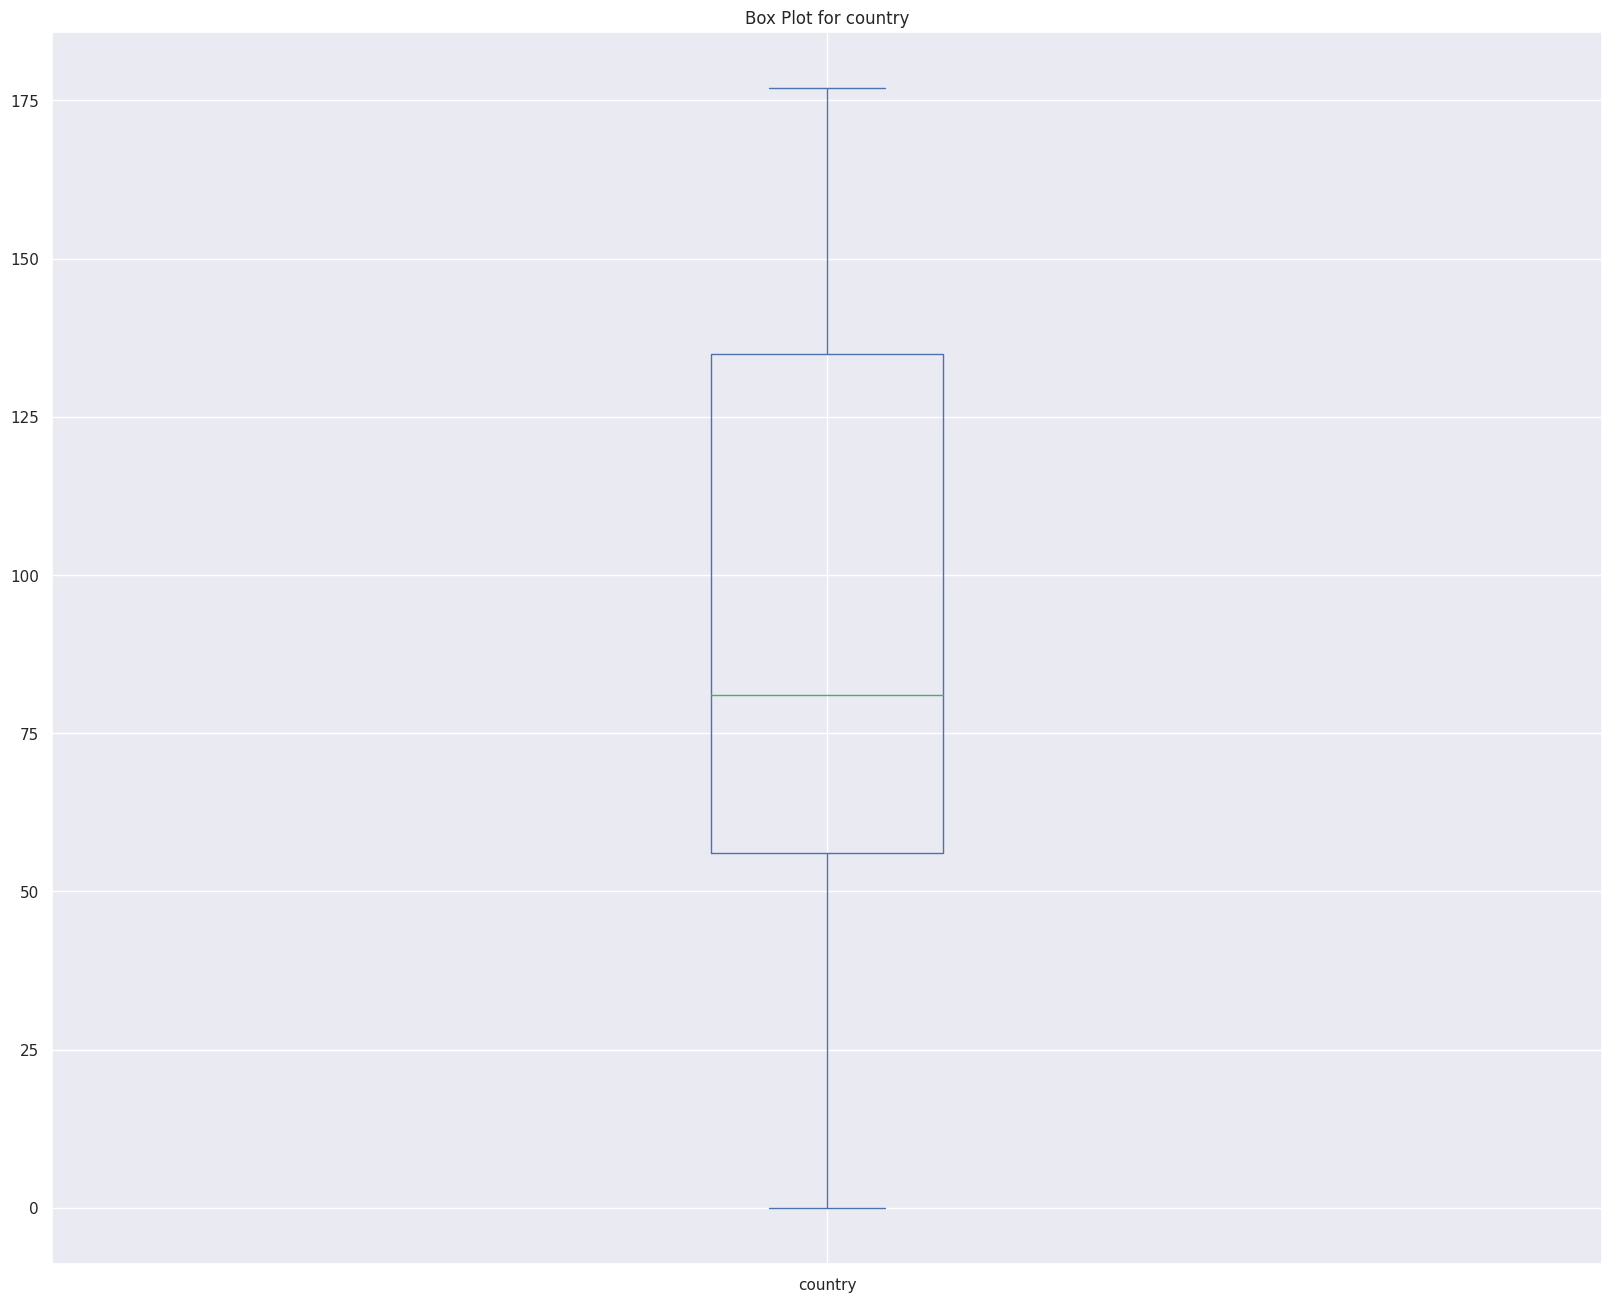

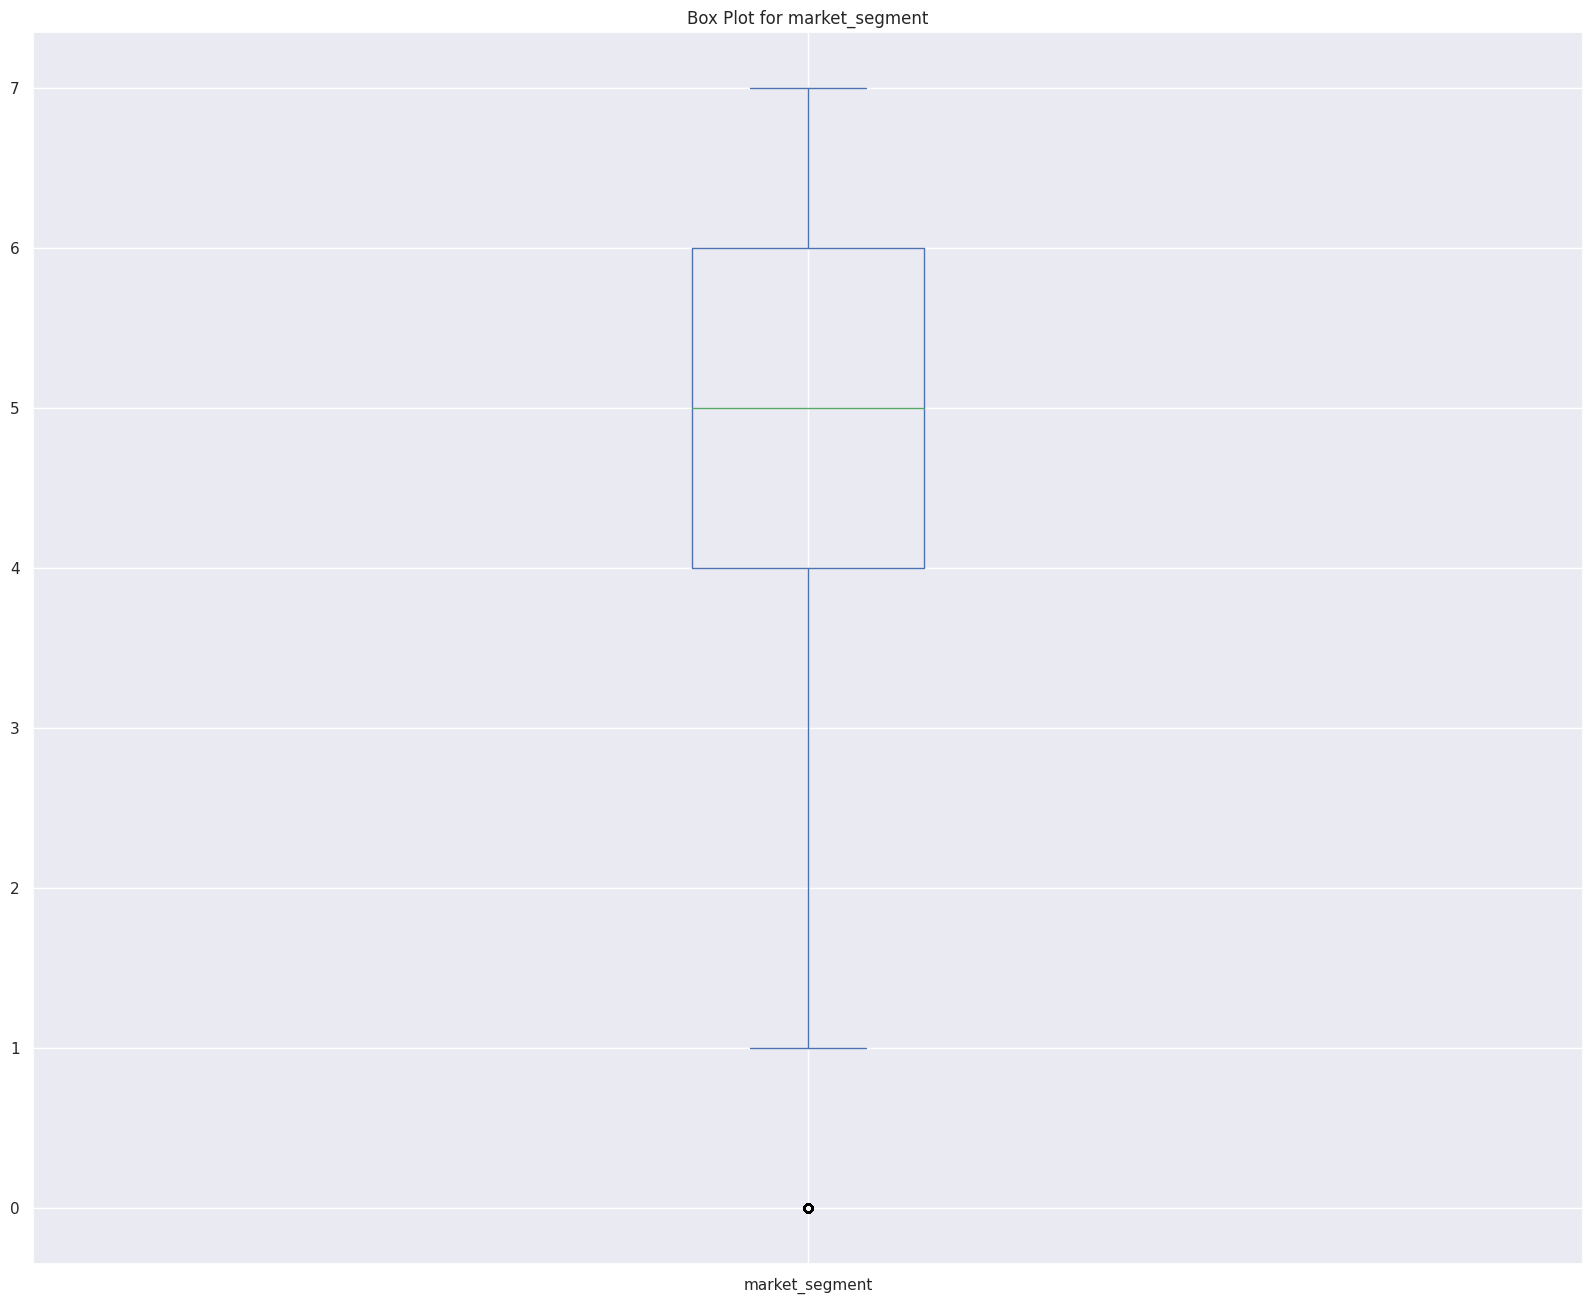

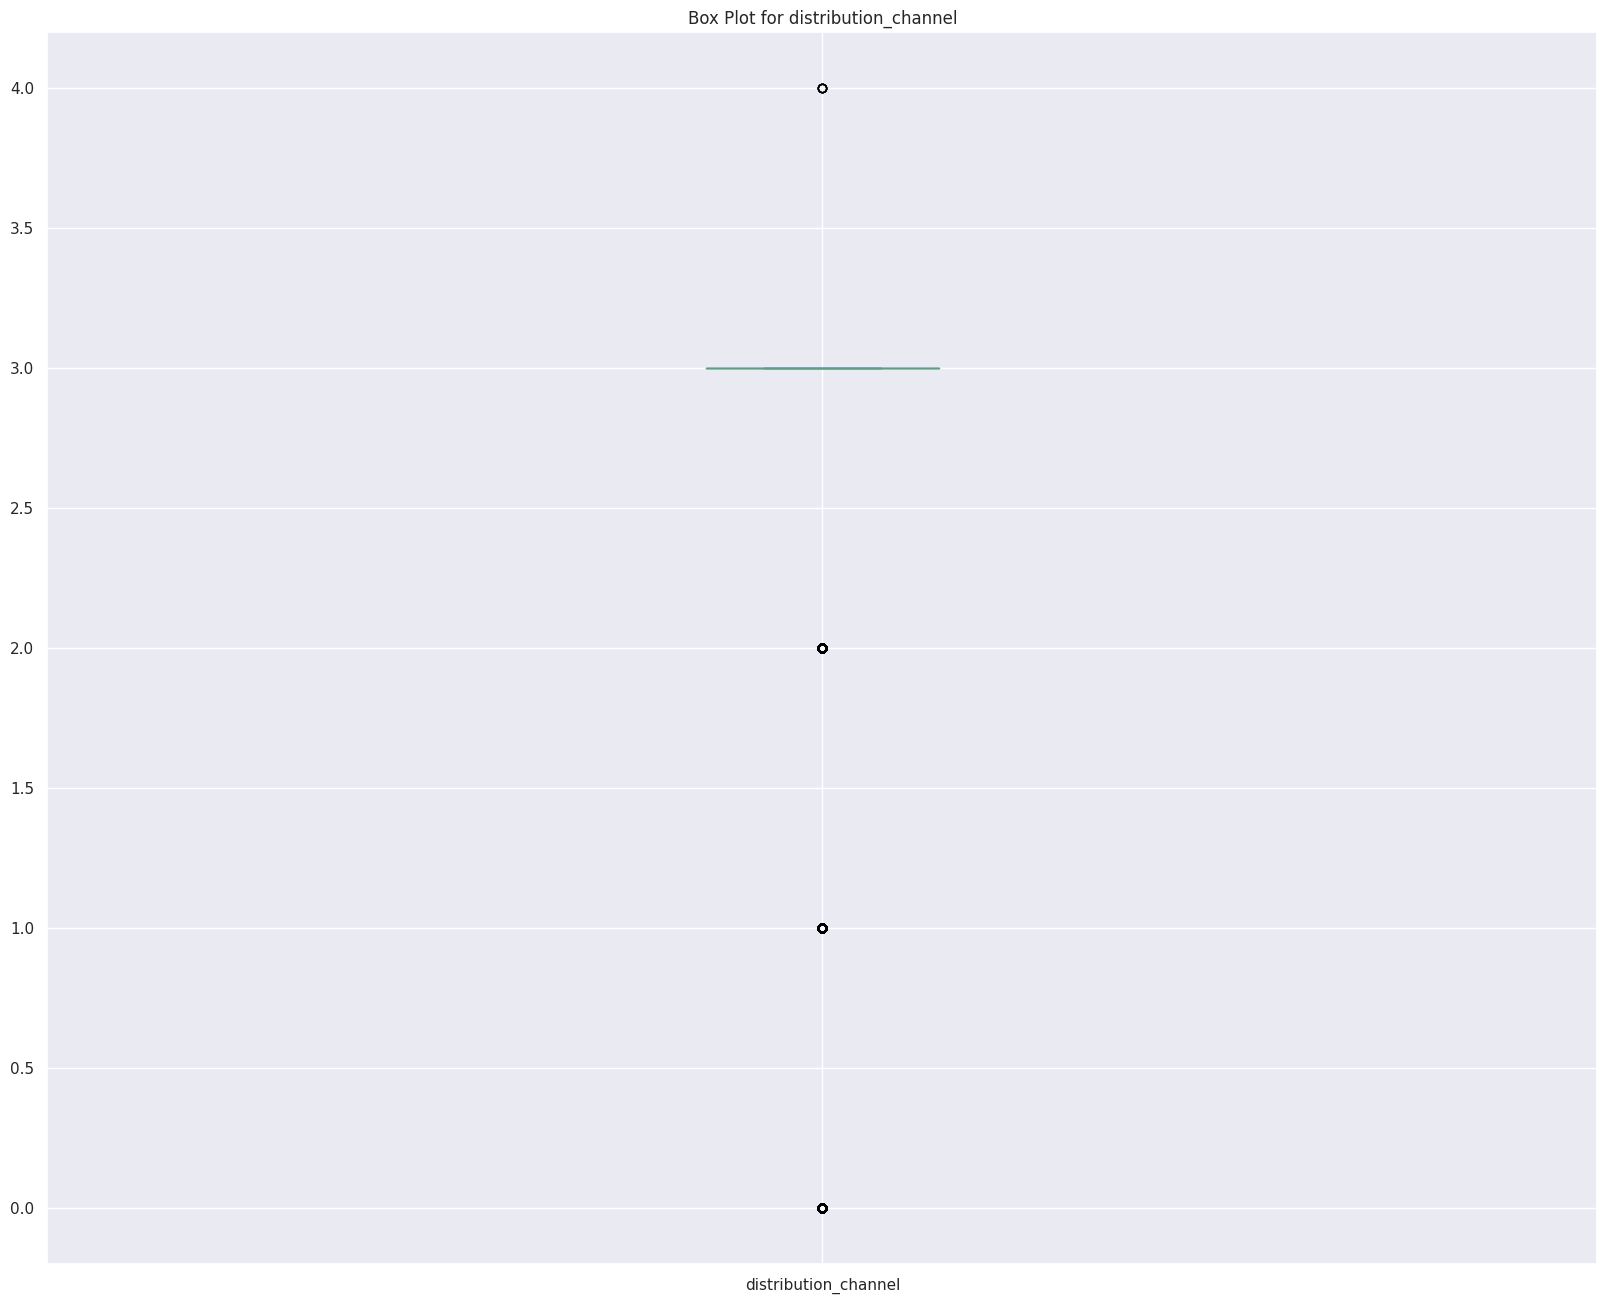

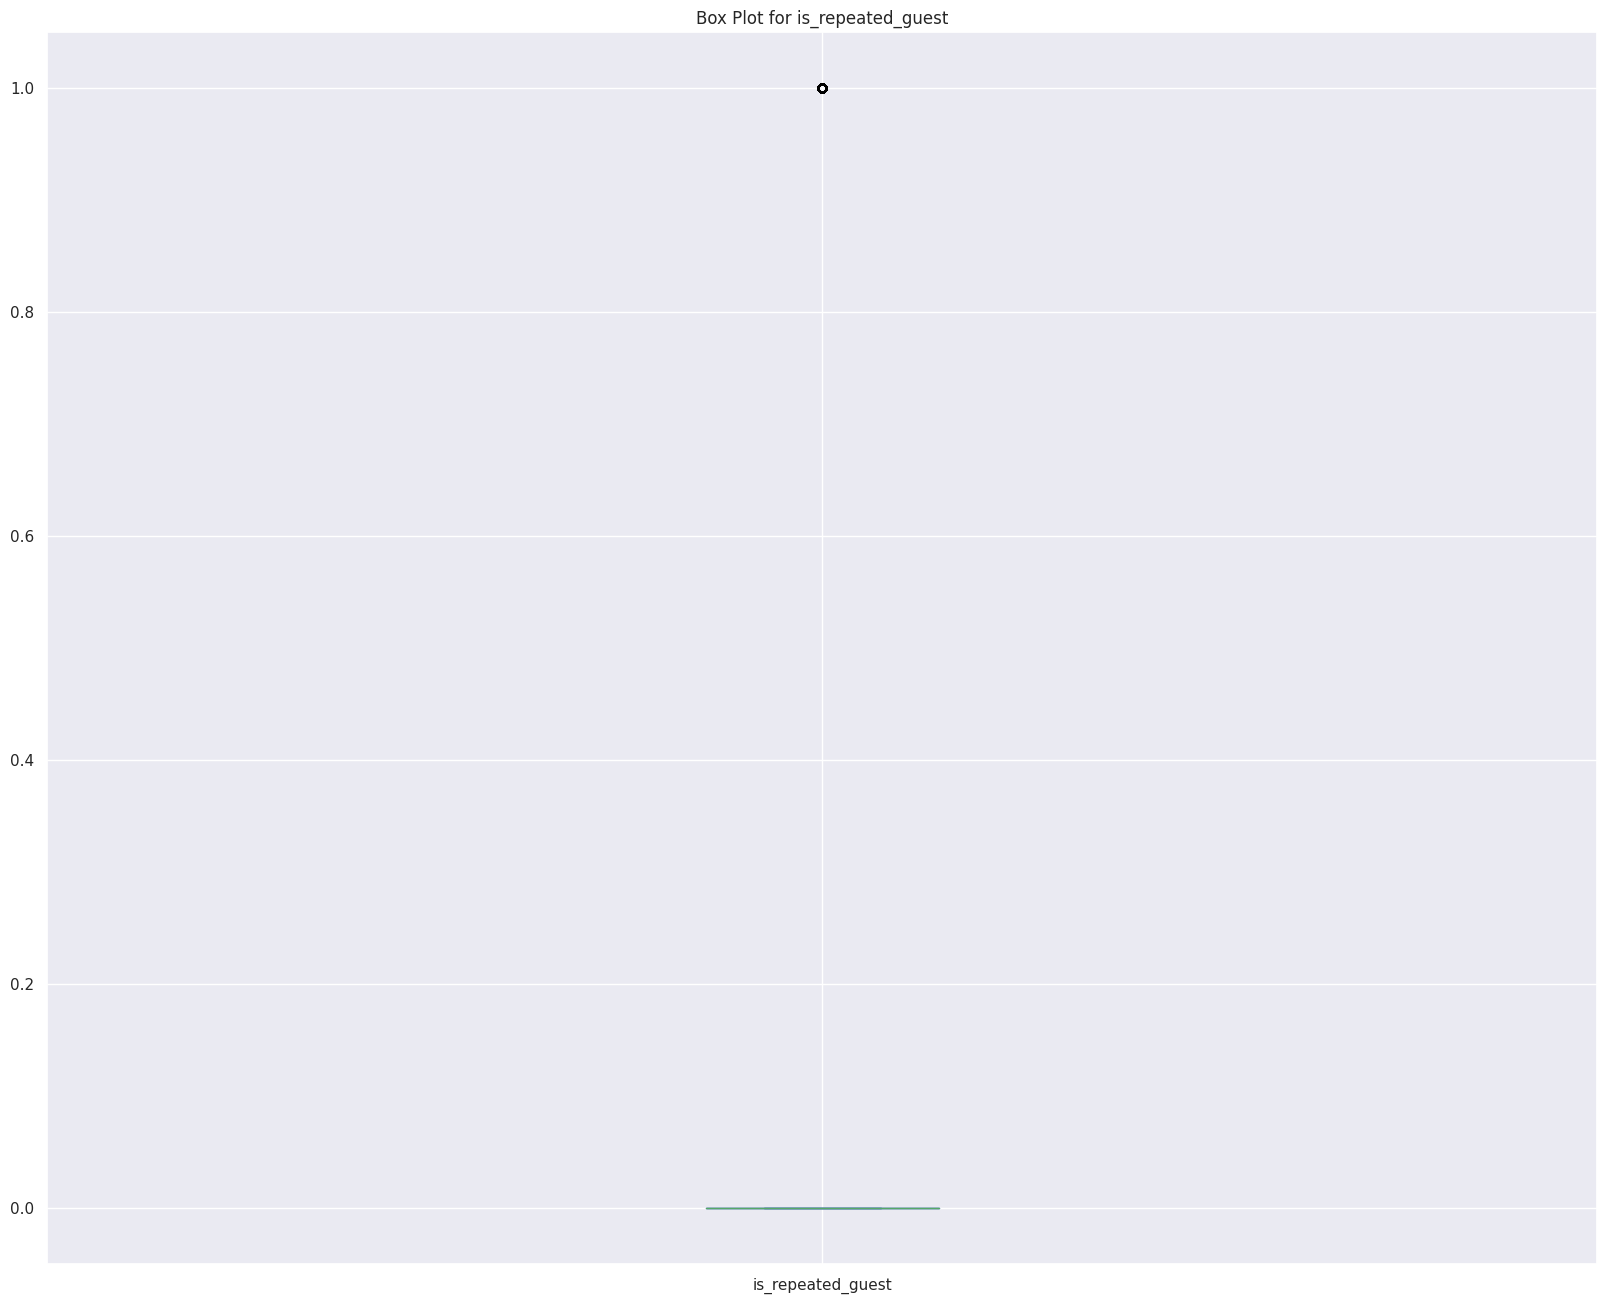

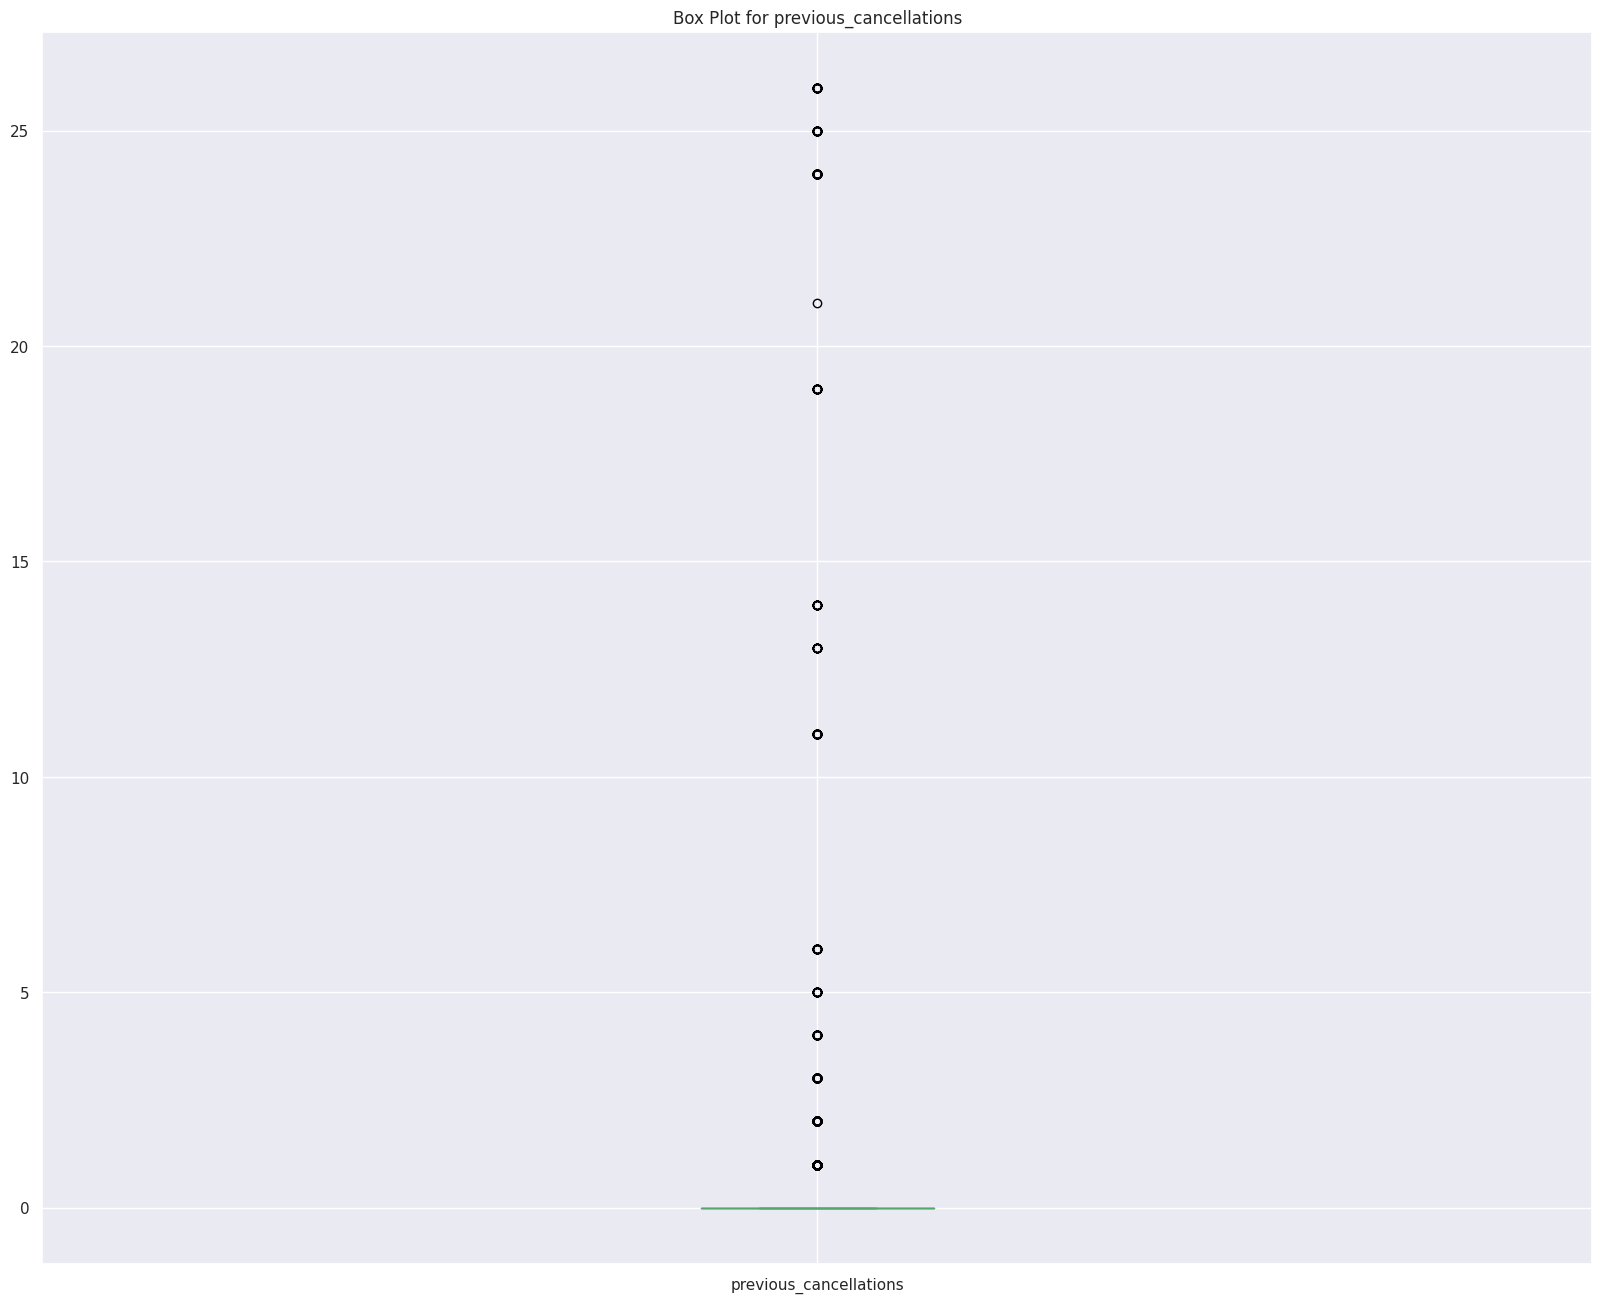

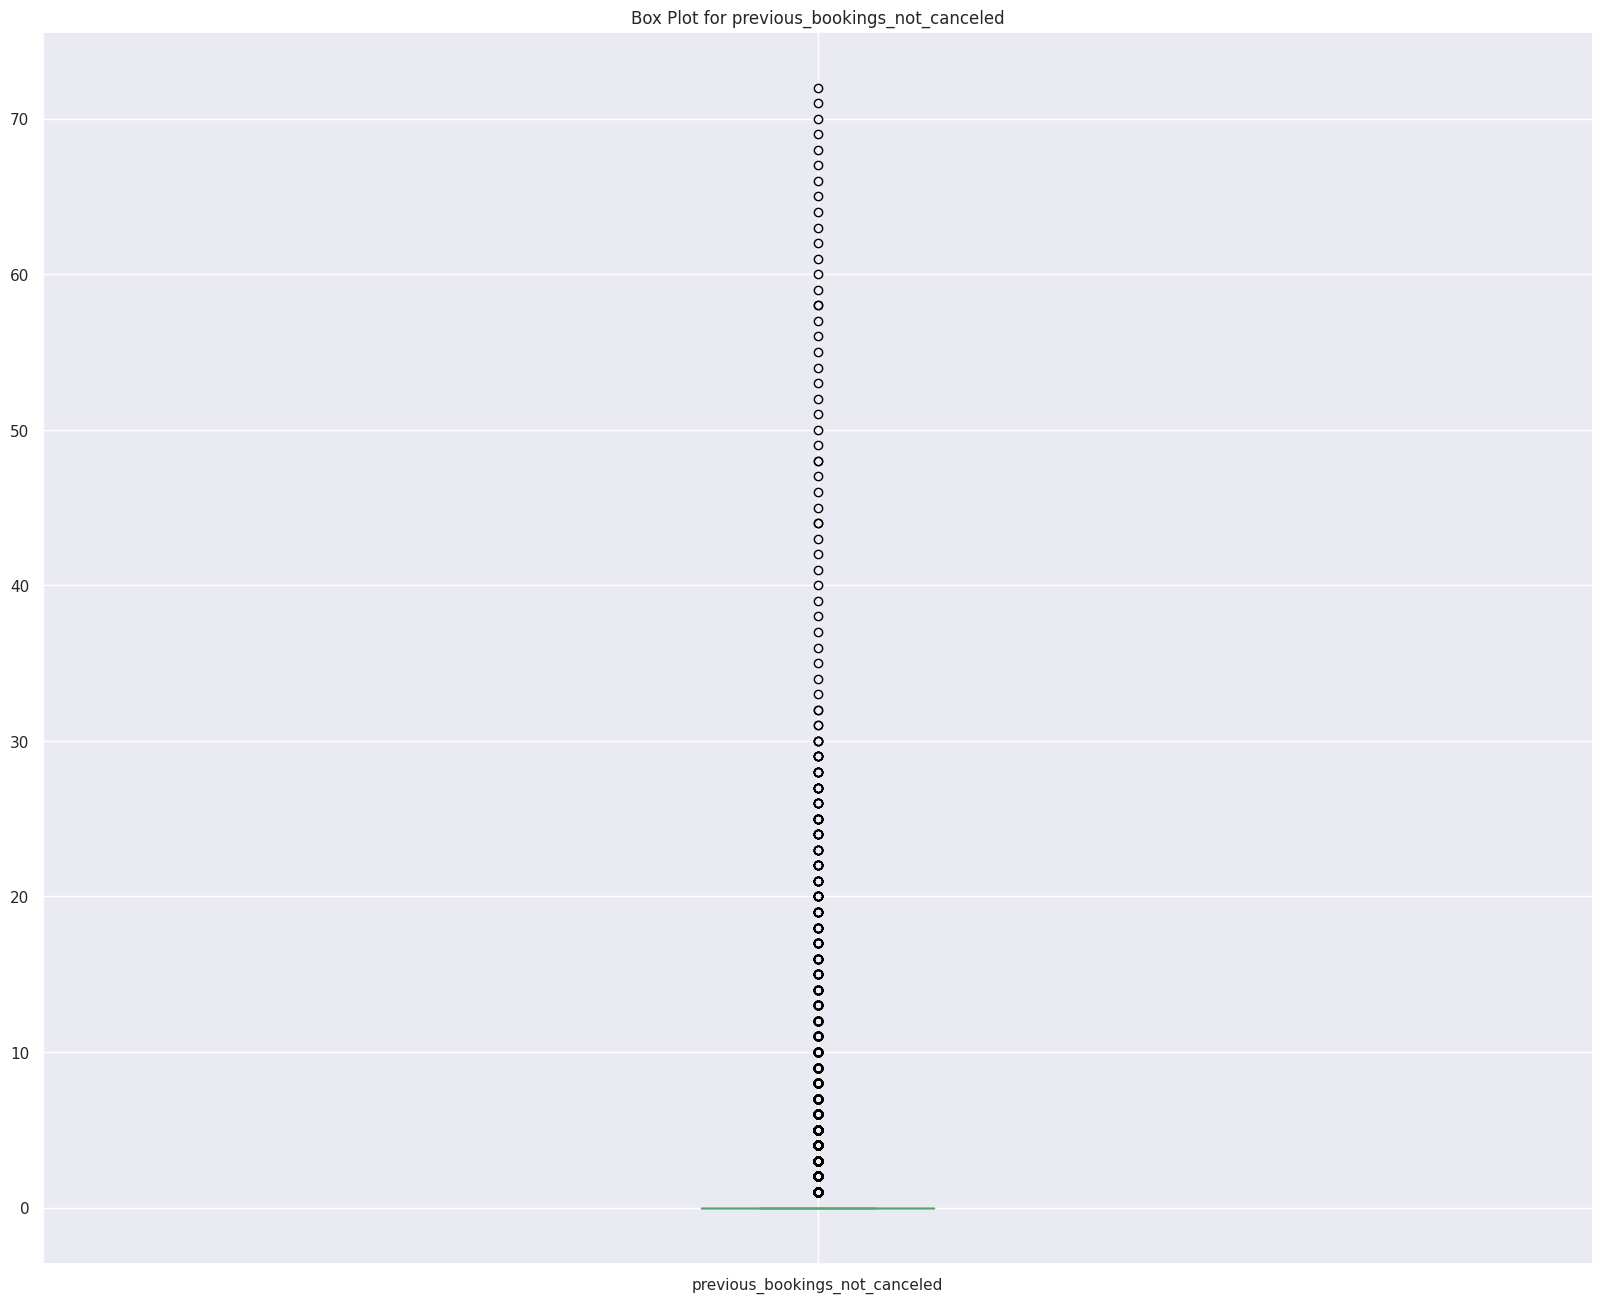

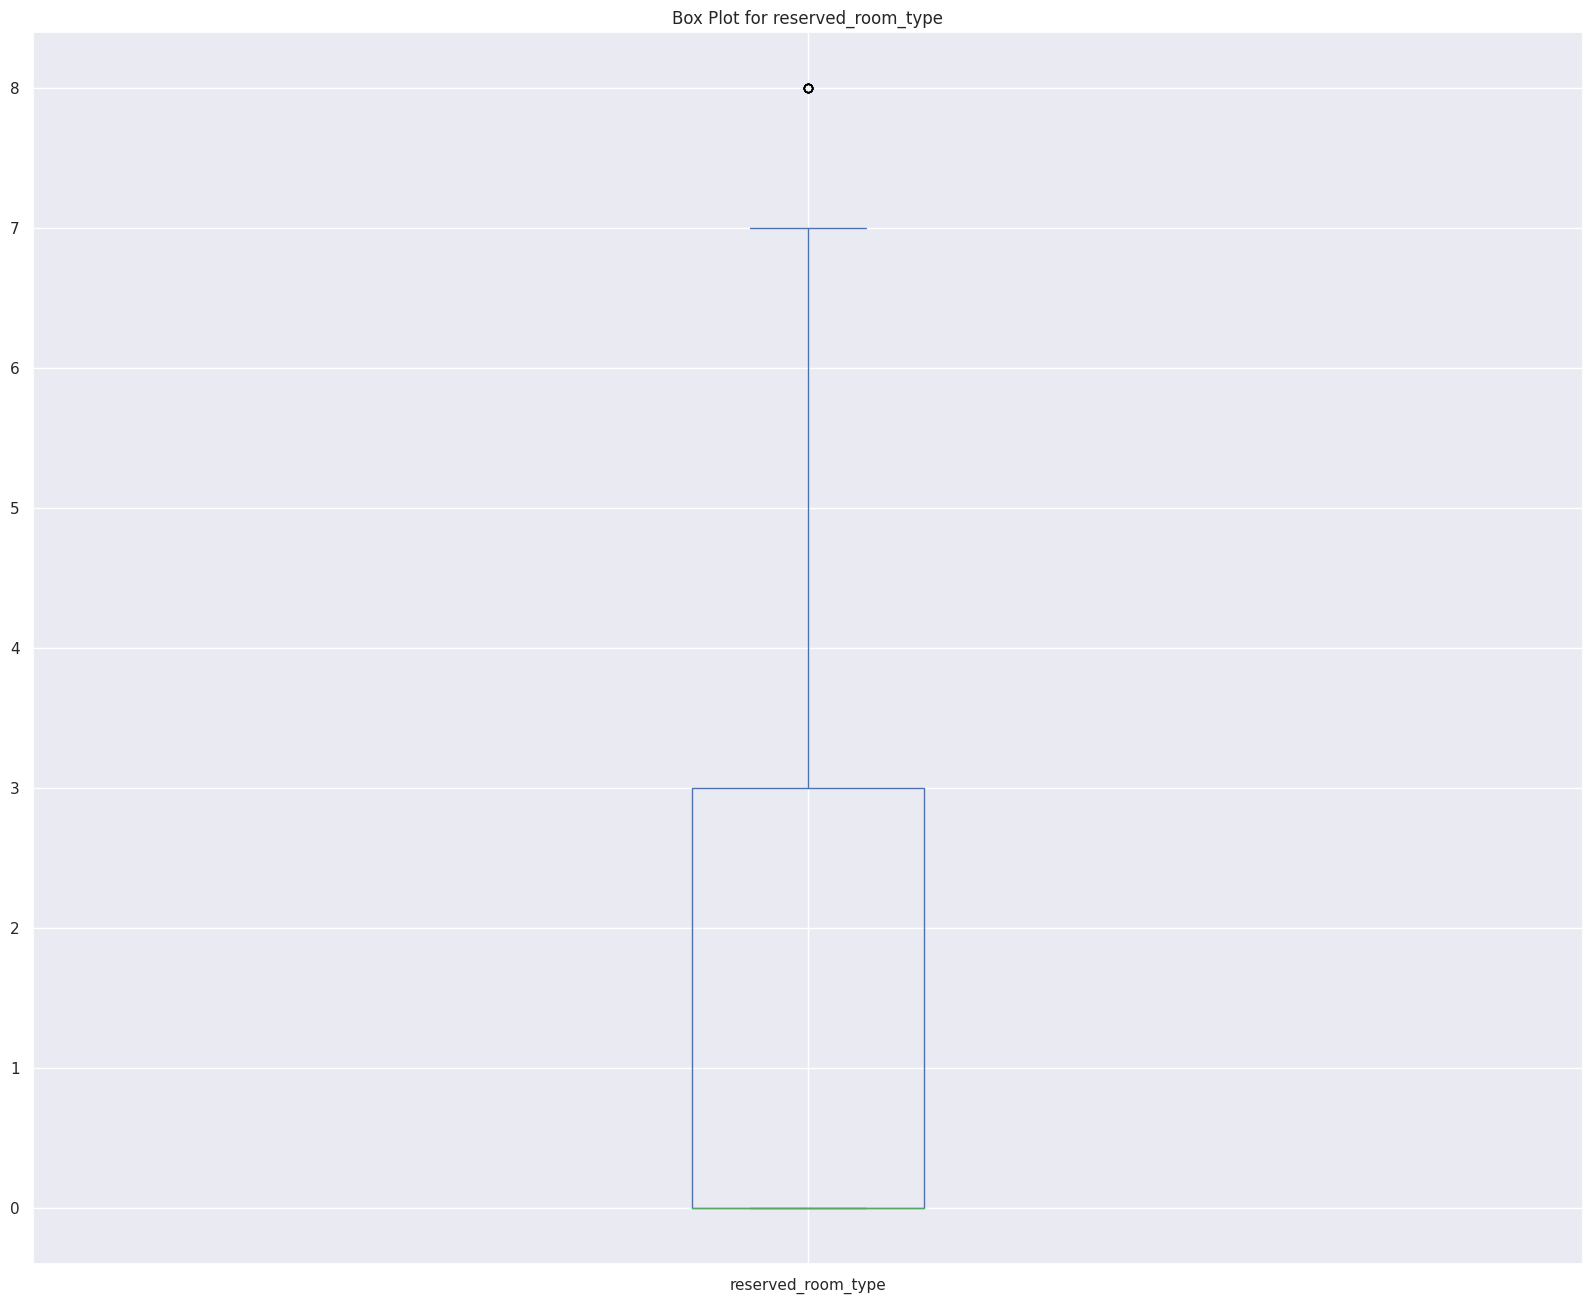

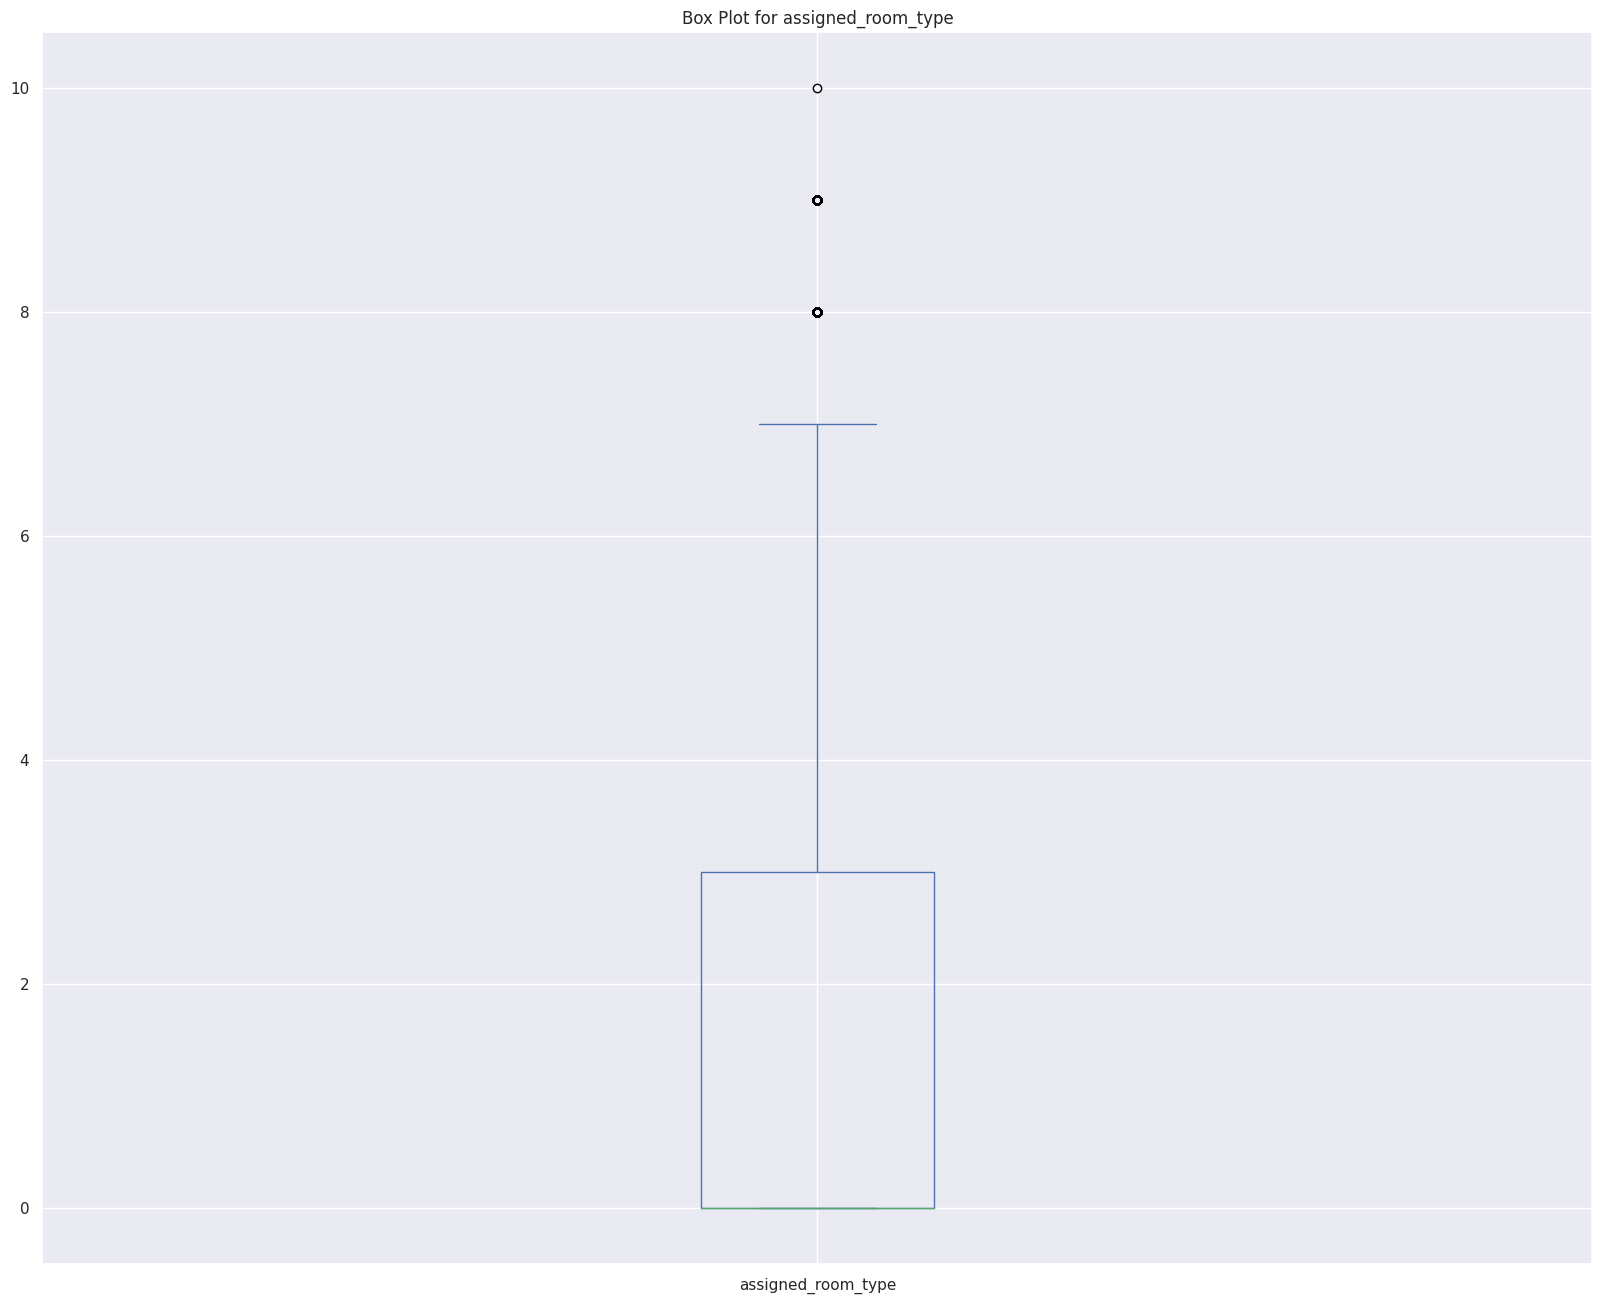

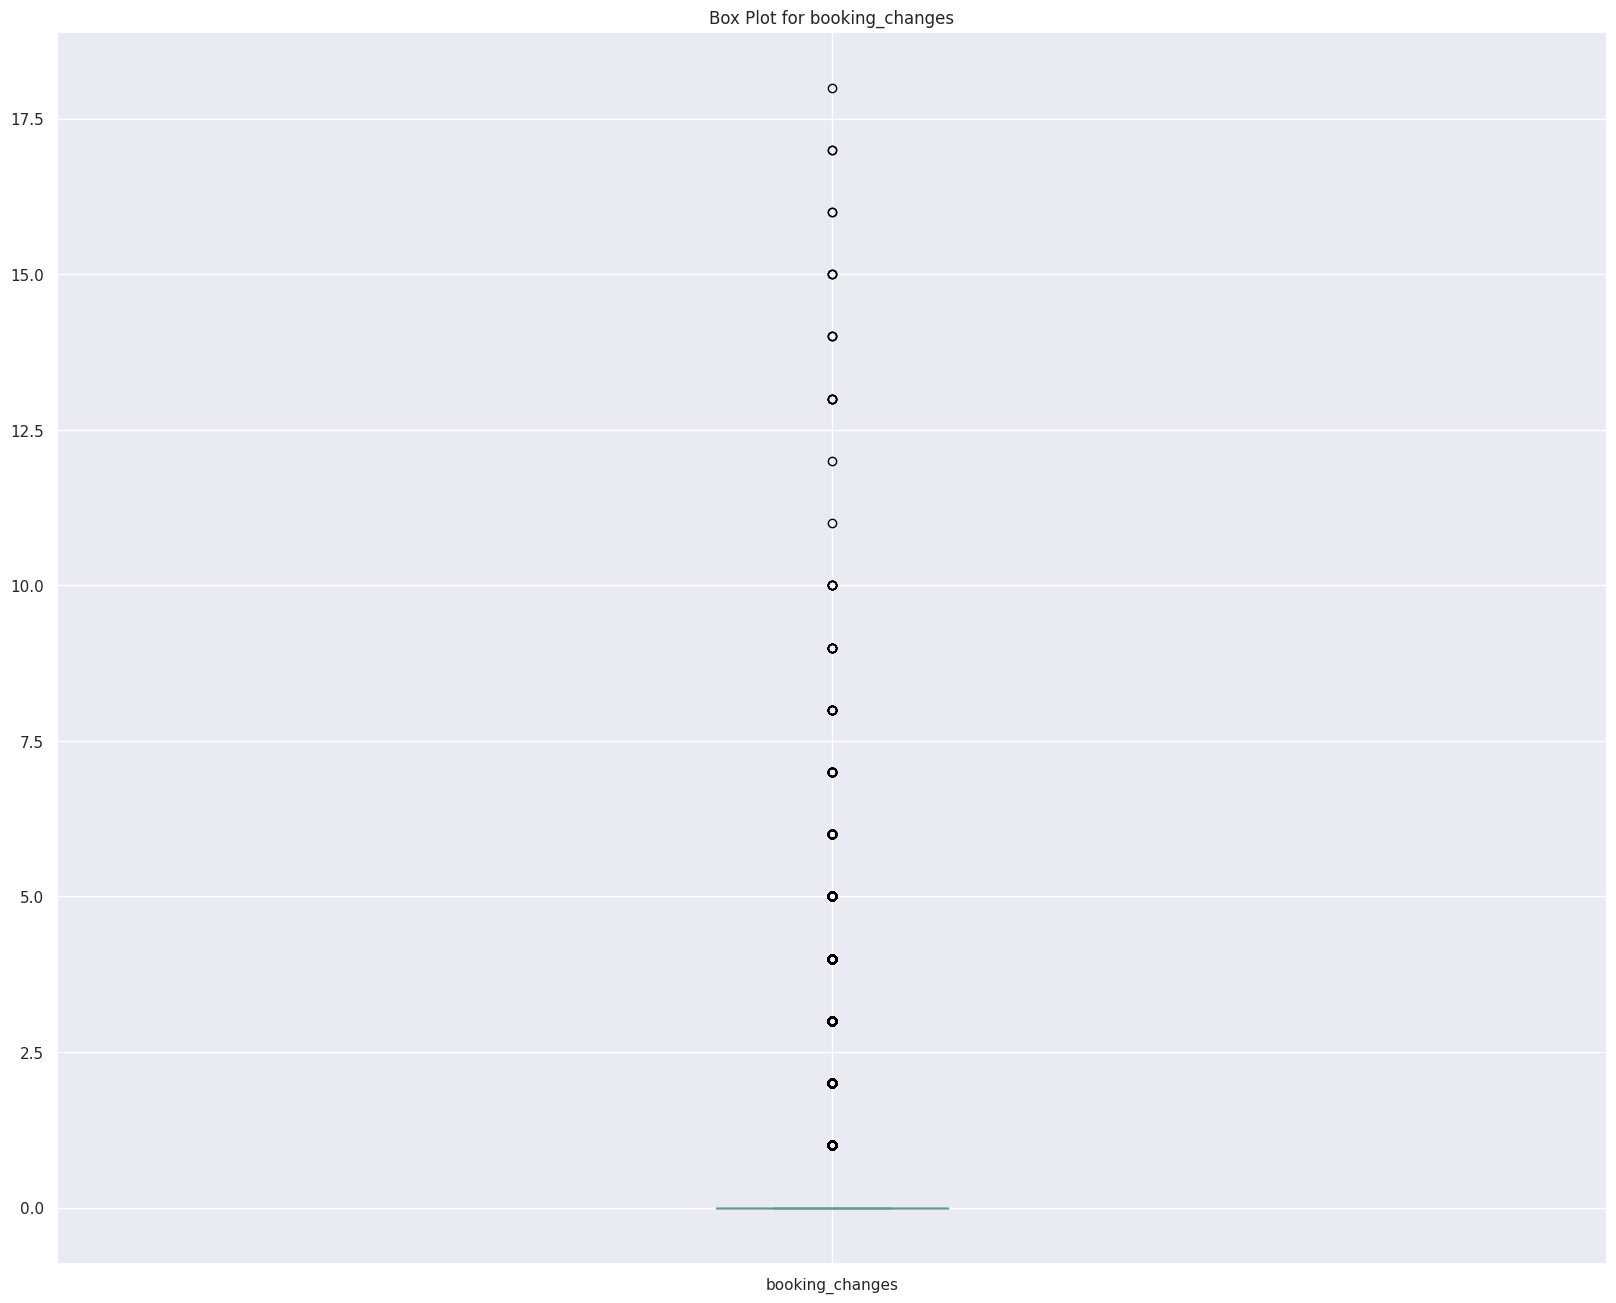

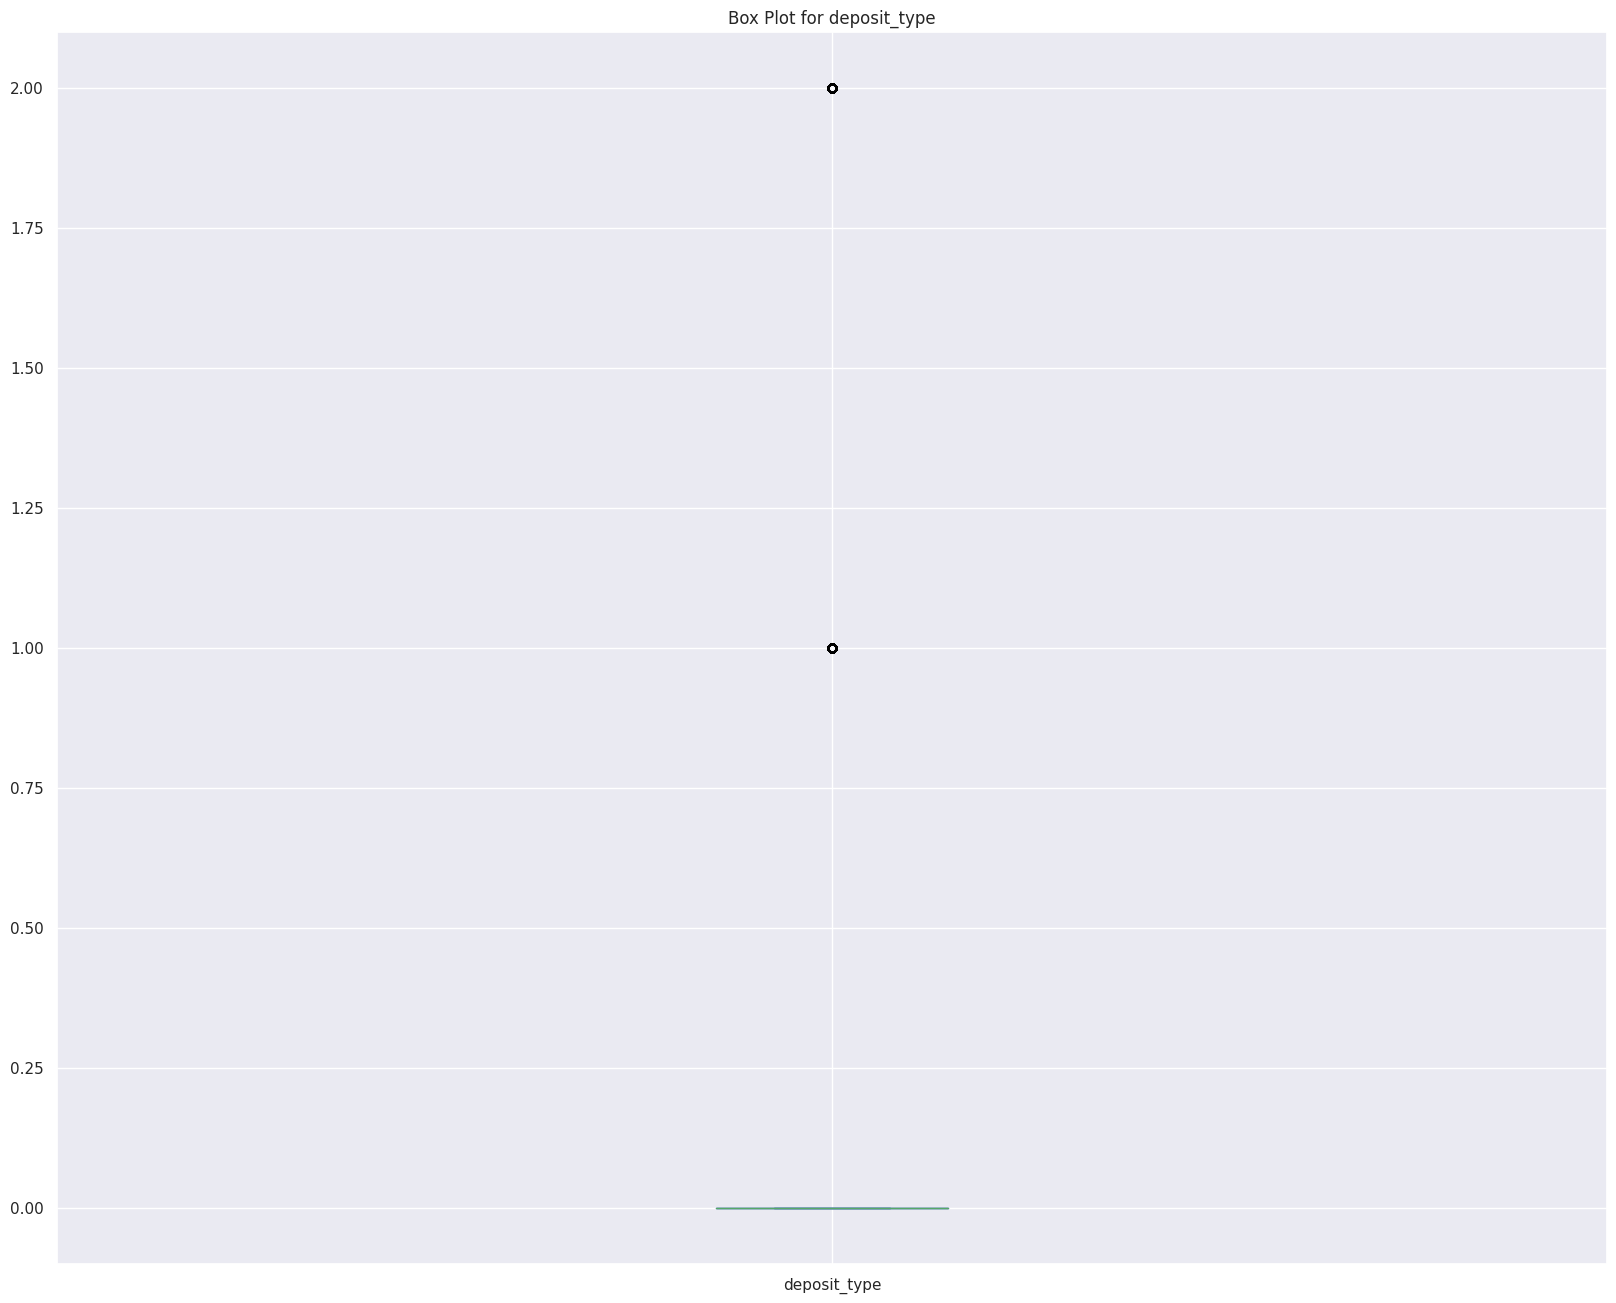

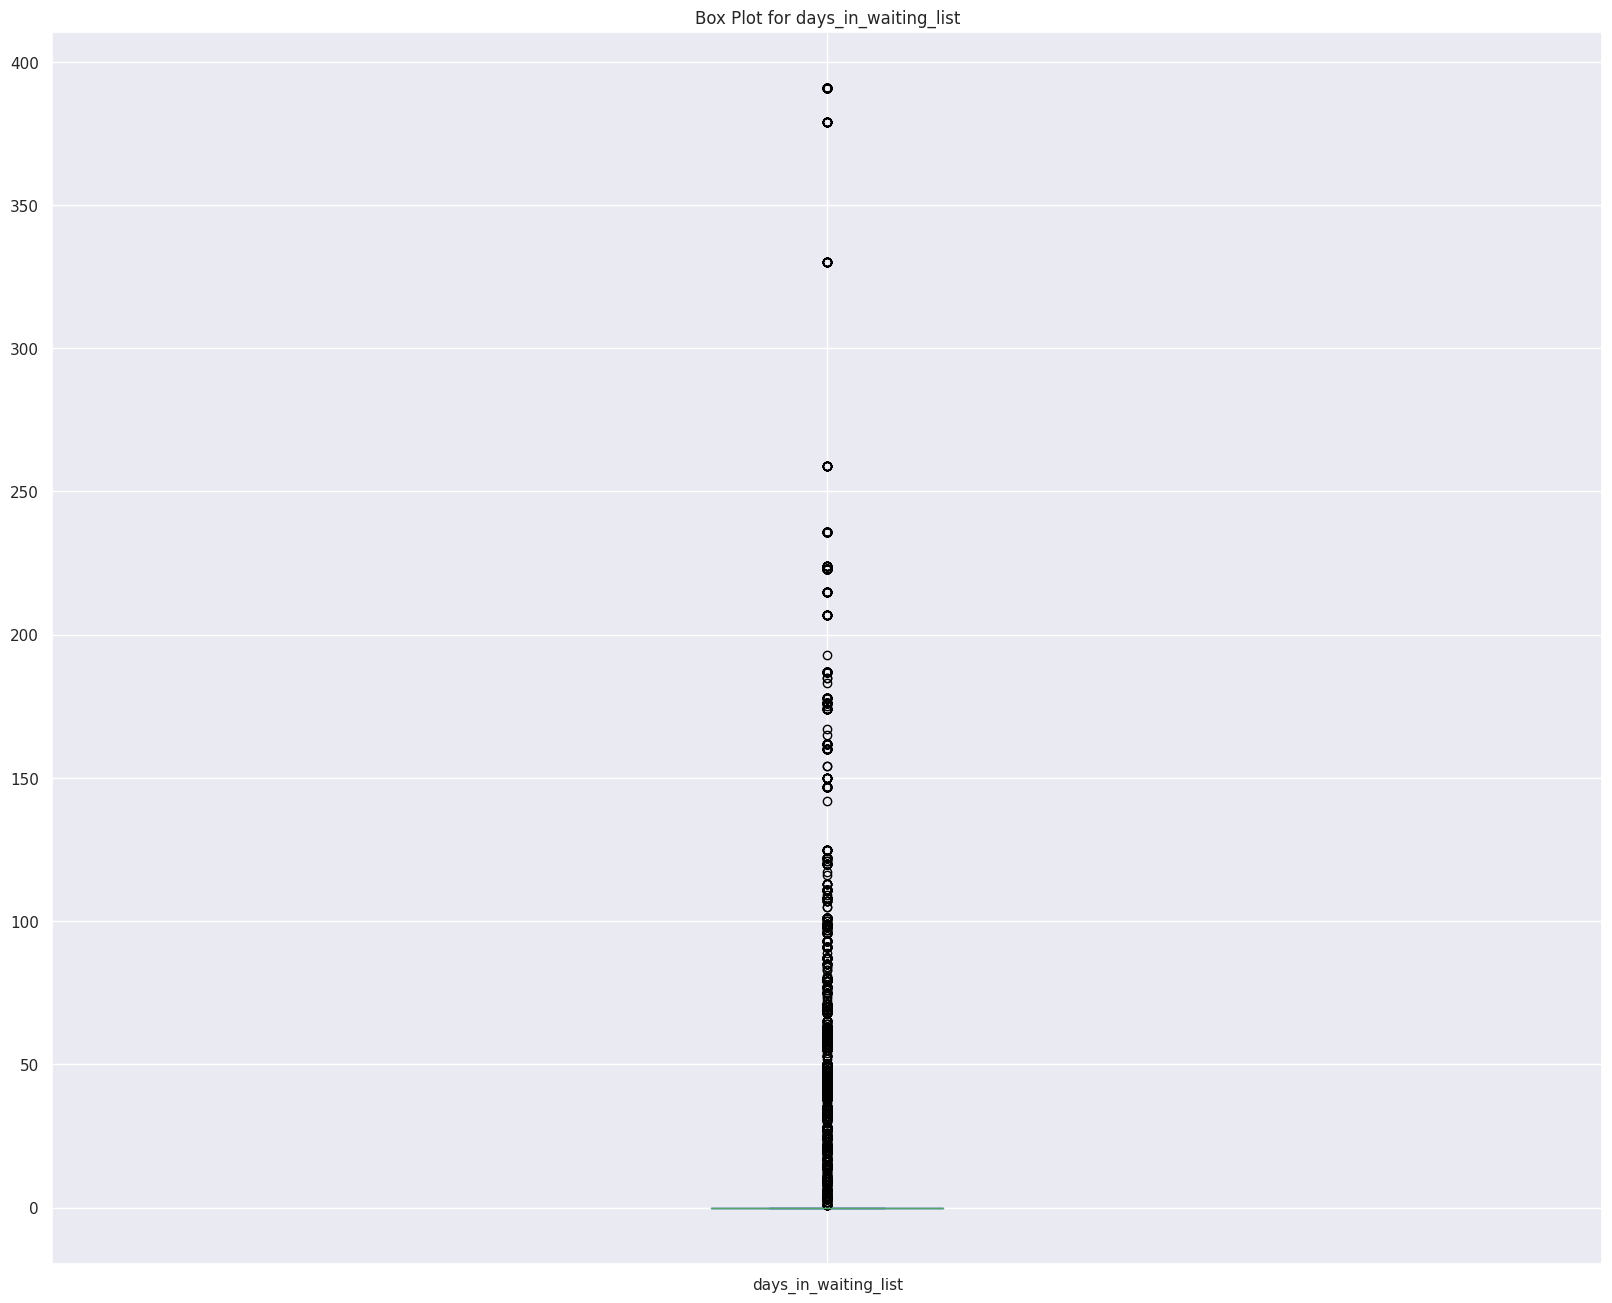

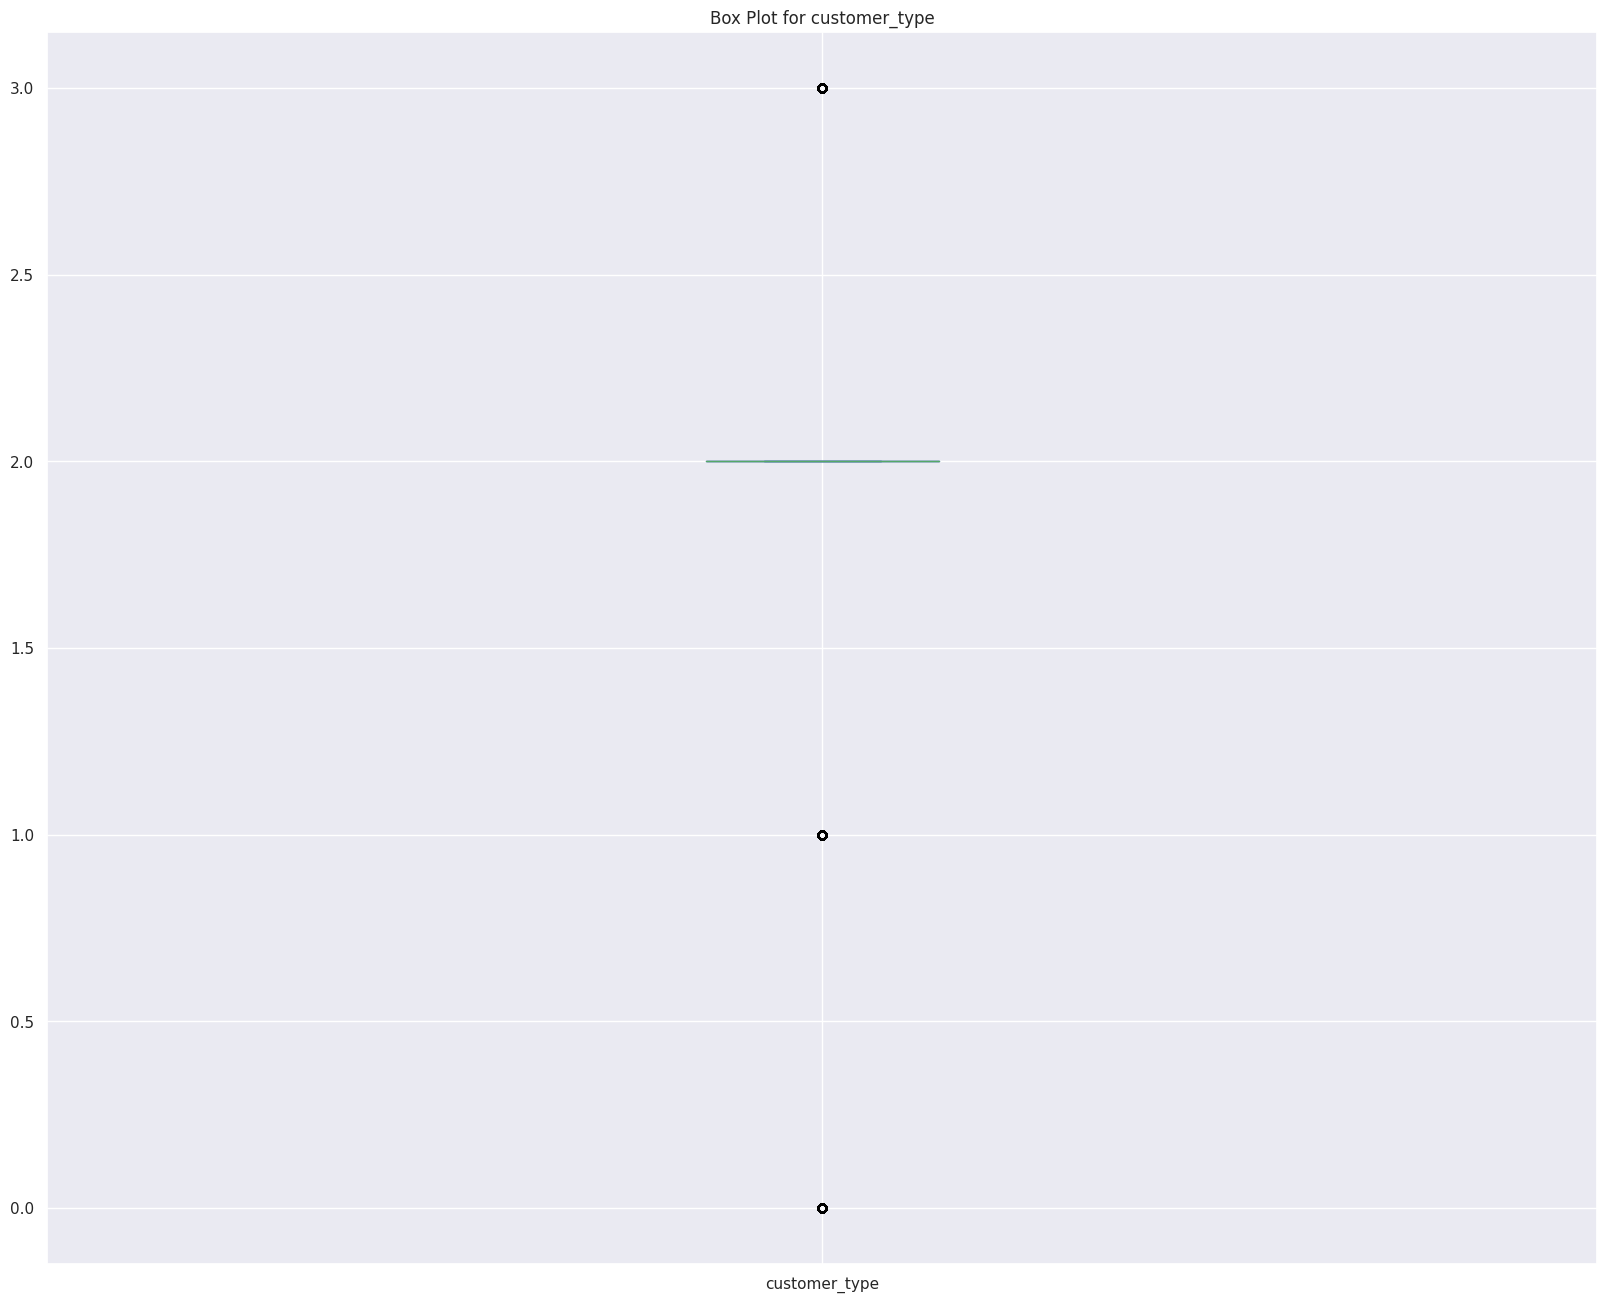

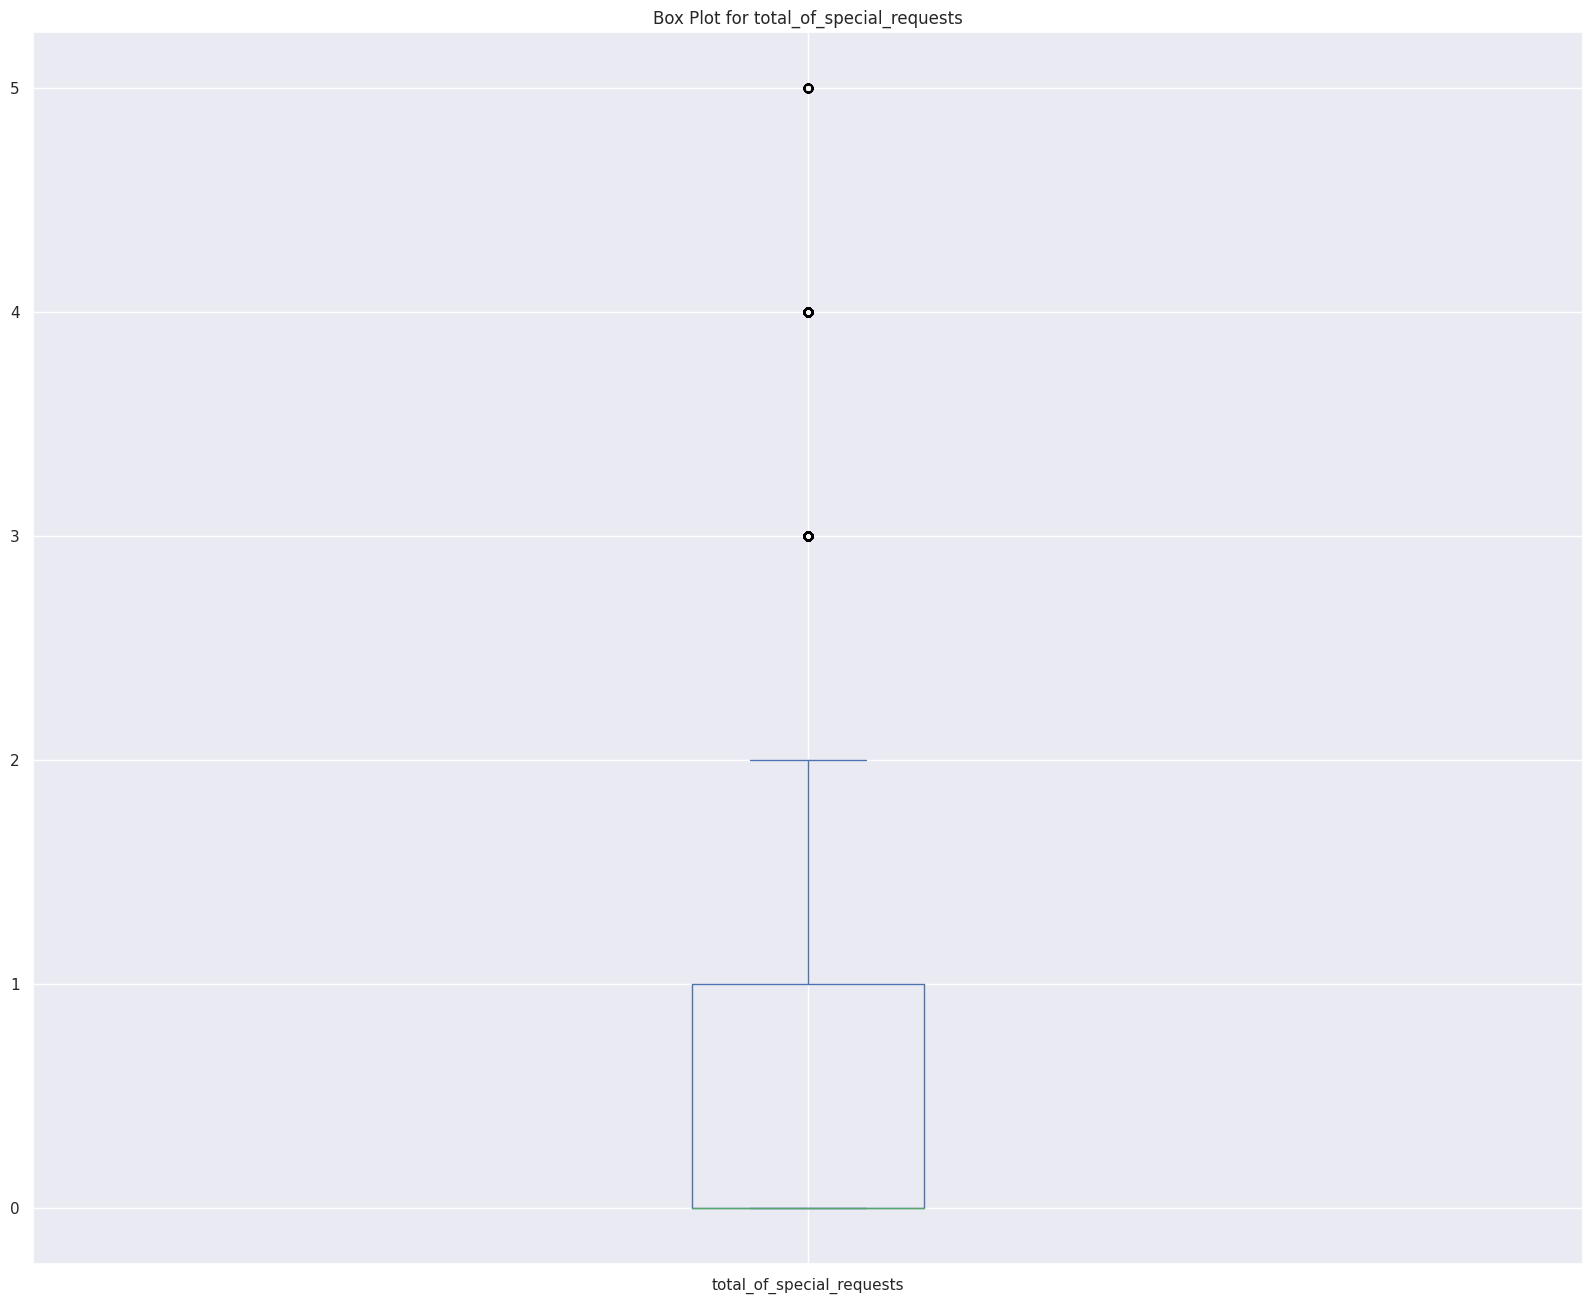

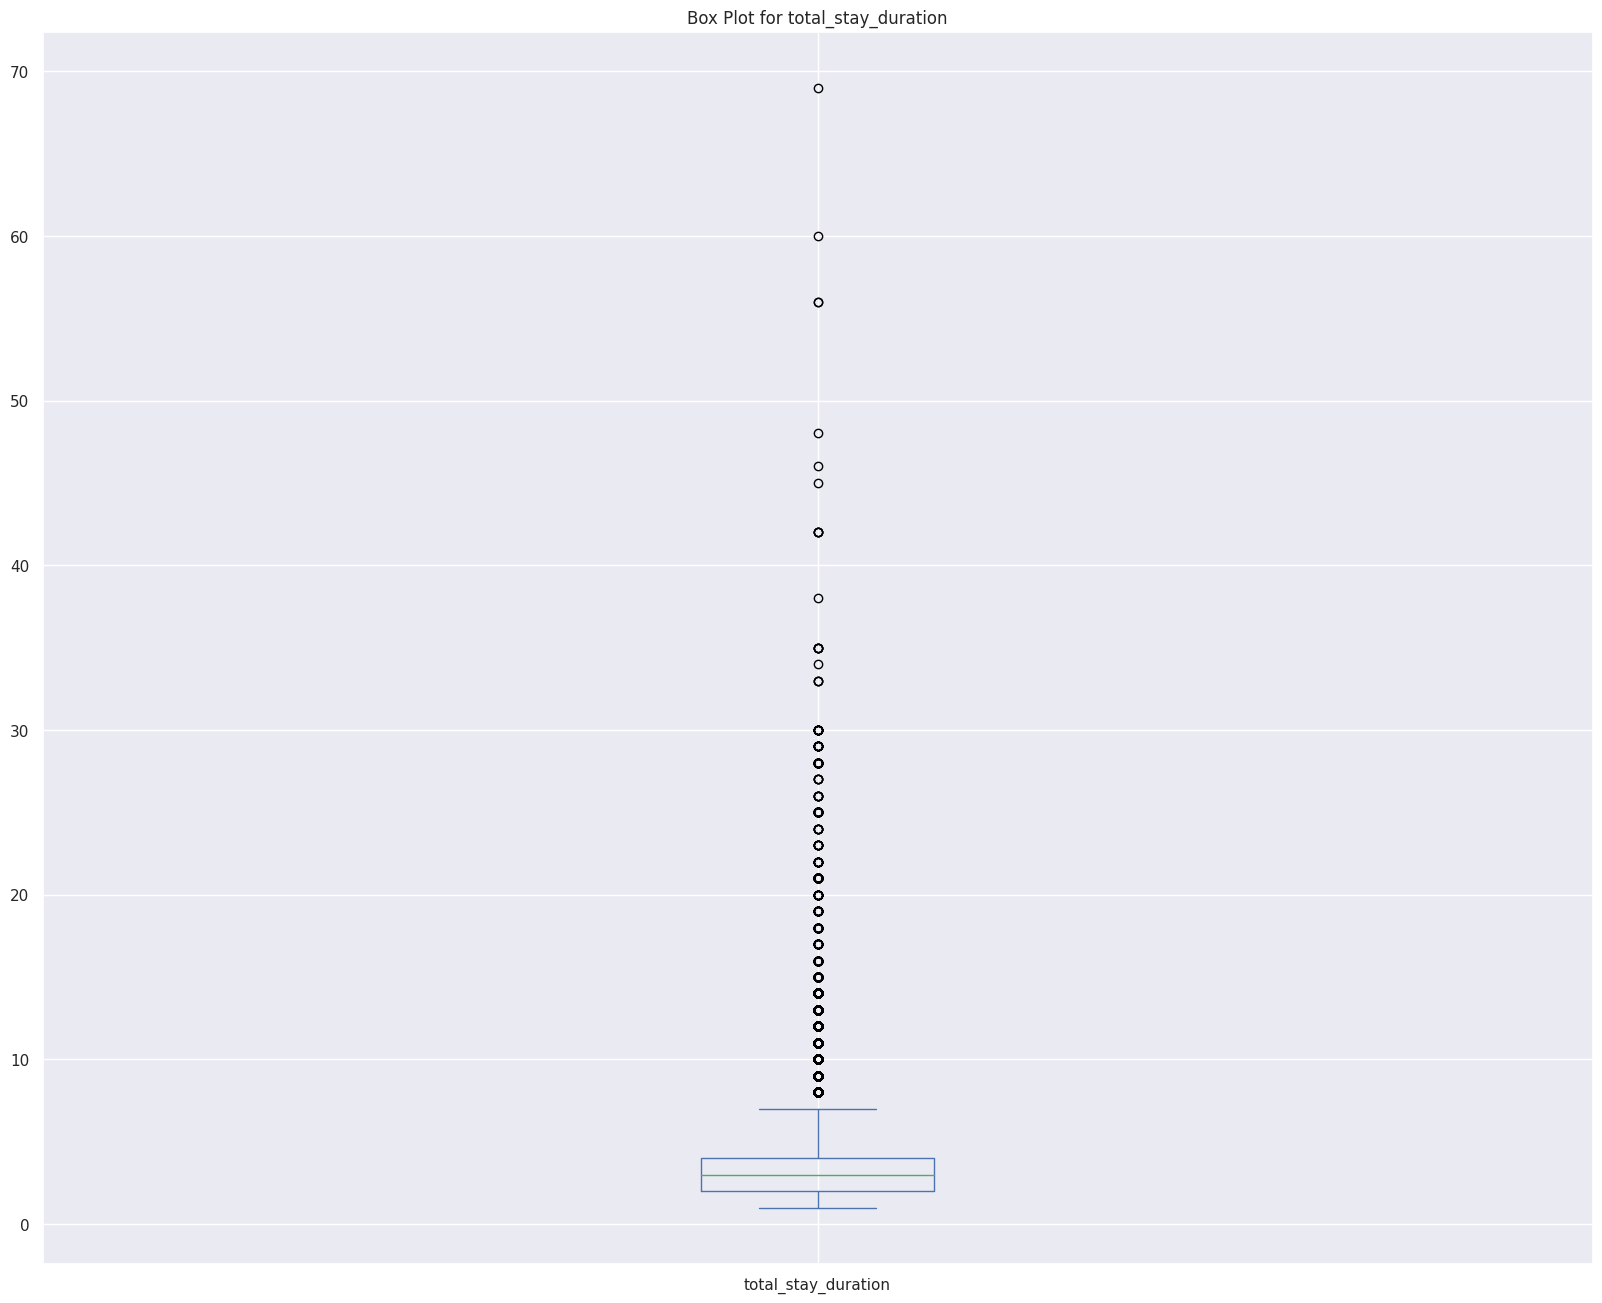

In [ ]:
#using for loop for checking box plot of multiple columns
for column in df.columns:
#if condition to stop the when reach it reach is_canceled
    if column != 'is_canceled':
      #box plot
        df[[column]].plot(kind='box')
        #title
        plt.title(f'Box Plot for {column}')
        plt.show()

Getting Varience

In [ ]:
df.var()

hotel                                0.222628
is_canceled                          0.233768
lead_time                            0.698549
arrival_date_month                  12.508068
stays_in_weekend_nights              0.990944
stays_in_week_nights                 3.584426
adults                               0.331133
children                             0.159296
babies                               0.009518
meal                                 1.138612
country                           2017.129949
market_segment                       1.597571
distribution_channel                 0.819282
is_repeated_guest                    0.028641
previous_cancellations               0.717701
previous_bookings_not_canceled       2.252098
reserved_room_type                   2.873791
assigned_room_type                   3.398000
booking_changes                      0.406571
deposit_type                         0.112680
days_in_waiting_list               311.267798
customer_type                     

Getting Co releactionship

In [ ]:
df.corr()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,total_of_special_requests,total_stay_duration
hotel,1.000000,-0.135652,0.056548,-0.035109,0.191717,0.241863,0.011055,0.044203,0.043825,-0.005975,...,0.012618,0.004306,0.251140,0.312576,0.076519,-0.158982,-0.072588,-0.047978,0.043958,0.255923
is_canceled,-0.135652,1.000000,-0.270361,-0.000951,-0.004859,0.020703,0.057575,0.004678,-0.032672,-0.017448,...,0.109974,-0.057541,-0.062458,-0.173206,-0.145198,0.468244,0.053941,-0.068898,-0.236165,0.013554
lead_time,0.056548,-0.270361,1.000000,-0.074100,-0.117018,-0.195633,-0.111592,0.025049,0.015579,-0.019532,...,-0.094105,0.072386,0.086229,0.151416,-0.007625,-0.314002,-0.151661,-0.066685,0.058605,-0.192063
arrival_date_month,-0.035109,-0.000951,-0.074100,1.000000,-0.032058,-0.025901,-0.058776,-0.083183,-0.012522,-0.063321,...,0.040596,-0.003723,-0.062679,-0.039829,-0.018291,0.068504,0.048552,0.011737,-0.052859,-0.031934
stays_in_weekend_nights,0.191717,-0.004859,-0.117018,-0.032058,1.000000,0.490977,0.093893,0.045979,0.018681,0.044539,...,-0.013286,-0.043058,0.143717,0.092647,0.051159,-0.113923,-0.055164,-0.111234,0.072955,0.759384
stays_in_week_nights,0.241863,0.020703,-0.195633,-0.025901,0.490977,1.000000,0.095039,0.044446,0.020499,0.035518,...,-0.014734,-0.049232,0.171425,0.110070,0.081638,-0.080175,-0.002923,-0.130352,0.068502,0.939662
adults,0.011055,0.057575,-0.111592,-0.058776,0.093893,0.095039,1.000000,0.028881,0.017751,0.032161,...,-0.007189,-0.108832,0.214788,0.163159,-0.041322,-0.030285,-0.008581,-0.102646,0.122959,0.107852
children,0.044203,0.004678,0.025049,-0.083183,0.045979,0.044446,0.028881,1.000000,0.024182,-0.049652,...,-0.024835,-0.021062,0.379136,0.335864,0.051316,-0.096613,-0.033404,-0.053708,0.081978,0.051251
babies,0.043825,-0.032672,0.015579,-0.012522,0.018681,0.020499,0.017751,0.024182,1.000000,0.002981,...,-0.007523,-0.006596,0.039042,0.043020,0.086213,-0.030576,-0.010650,-0.016161,0.097875,0.022646
meal,-0.005975,-0.017448,-0.019532,-0.063321,0.044539,0.035518,0.032161,-0.049652,0.002981,1.000000,...,-0.003672,-0.040413,-0.122732,-0.128966,0.020523,-0.092124,-0.007197,0.044553,0.024044,0.044017


Getting Co Varience

In [ ]:
df.cov()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,total_of_special_requests,total_stay_duration
hotel,0.222628,-0.030946,0.022300,-0.058587,0.090048,0.216058,0.003002,0.008324,0.002017,-0.003008,...,0.005044,0.003049,0.200878,0.271868,0.023021,-0.025180,-0.604259,-0.013075,0.016453,0.306106
is_canceled,-0.030946,0.233768,-0.109254,-0.001626,-0.002339,0.018952,0.016019,0.000903,-0.001541,-0.009002,...,0.045046,-0.041751,-0.051192,-0.154372,-0.044763,0.075995,0.460129,-0.019240,-0.090581,0.016613
lead_time,0.022300,-0.109254,0.698549,-0.219033,-0.097359,-0.309564,-0.053670,0.008356,0.001270,-0.017420,...,-0.066632,0.090791,0.122175,0.233282,-0.004063,-0.088096,-2.236345,-0.032190,0.038856,-0.406923
arrival_date_month,-0.058587,-0.001626,-0.219033,12.508068,-0.112864,-0.173430,-0.119618,-0.117417,-0.004320,-0.238962,...,0.121633,-0.019757,-0.375790,-0.259662,-0.041249,0.081327,3.029459,0.023975,-0.148301,-0.286295
stays_in_weekend_nights,0.090048,-0.002339,-0.097359,-0.112864,0.990944,0.925327,0.053785,0.018268,0.001814,0.047310,...,-0.011205,-0.064324,0.242526,0.170008,0.032472,-0.038068,-0.968826,-0.063953,0.057611,1.916271
stays_in_week_nights,0.216058,0.018952,-0.309564,-0.173430,0.925327,3.584426,0.103542,0.033585,0.003786,0.071754,...,-0.023632,-0.139878,0.550188,0.384142,0.098553,-0.050953,-0.097644,-0.142537,0.102883,4.509753
adults,0.003002,0.016019,-0.053670,-0.119618,0.053785,0.103542,0.331133,0.006633,0.000997,0.019748,...,-0.003504,-0.093983,0.209526,0.173071,-0.015162,-0.005850,-0.087123,-0.034115,0.056129,0.157326
children,0.008324,0.000903,0.008356,-0.117417,0.018268,0.033585,0.006633,0.159296,0.000942,-0.021146,...,-0.008397,-0.012616,0.256522,0.247103,0.013059,-0.012944,-0.235215,-0.012381,0.025955,0.051853
babies,0.002017,-0.001541,0.001270,-0.004320,0.001814,0.003786,0.000997,0.000942,0.009518,0.000310,...,-0.000622,-0.000966,0.006457,0.007737,0.005363,-0.001001,-0.018331,-0.000911,0.007575,0.005601
meal,-0.003008,-0.009002,-0.017420,-0.238962,0.047310,0.071754,0.019748,-0.021146,0.000310,1.138612,...,-0.003320,-0.064714,-0.222011,-0.253672,0.013964,-0.032998,-0.135486,0.027458,0.020353,0.119064


Heap Map

<Axes: >

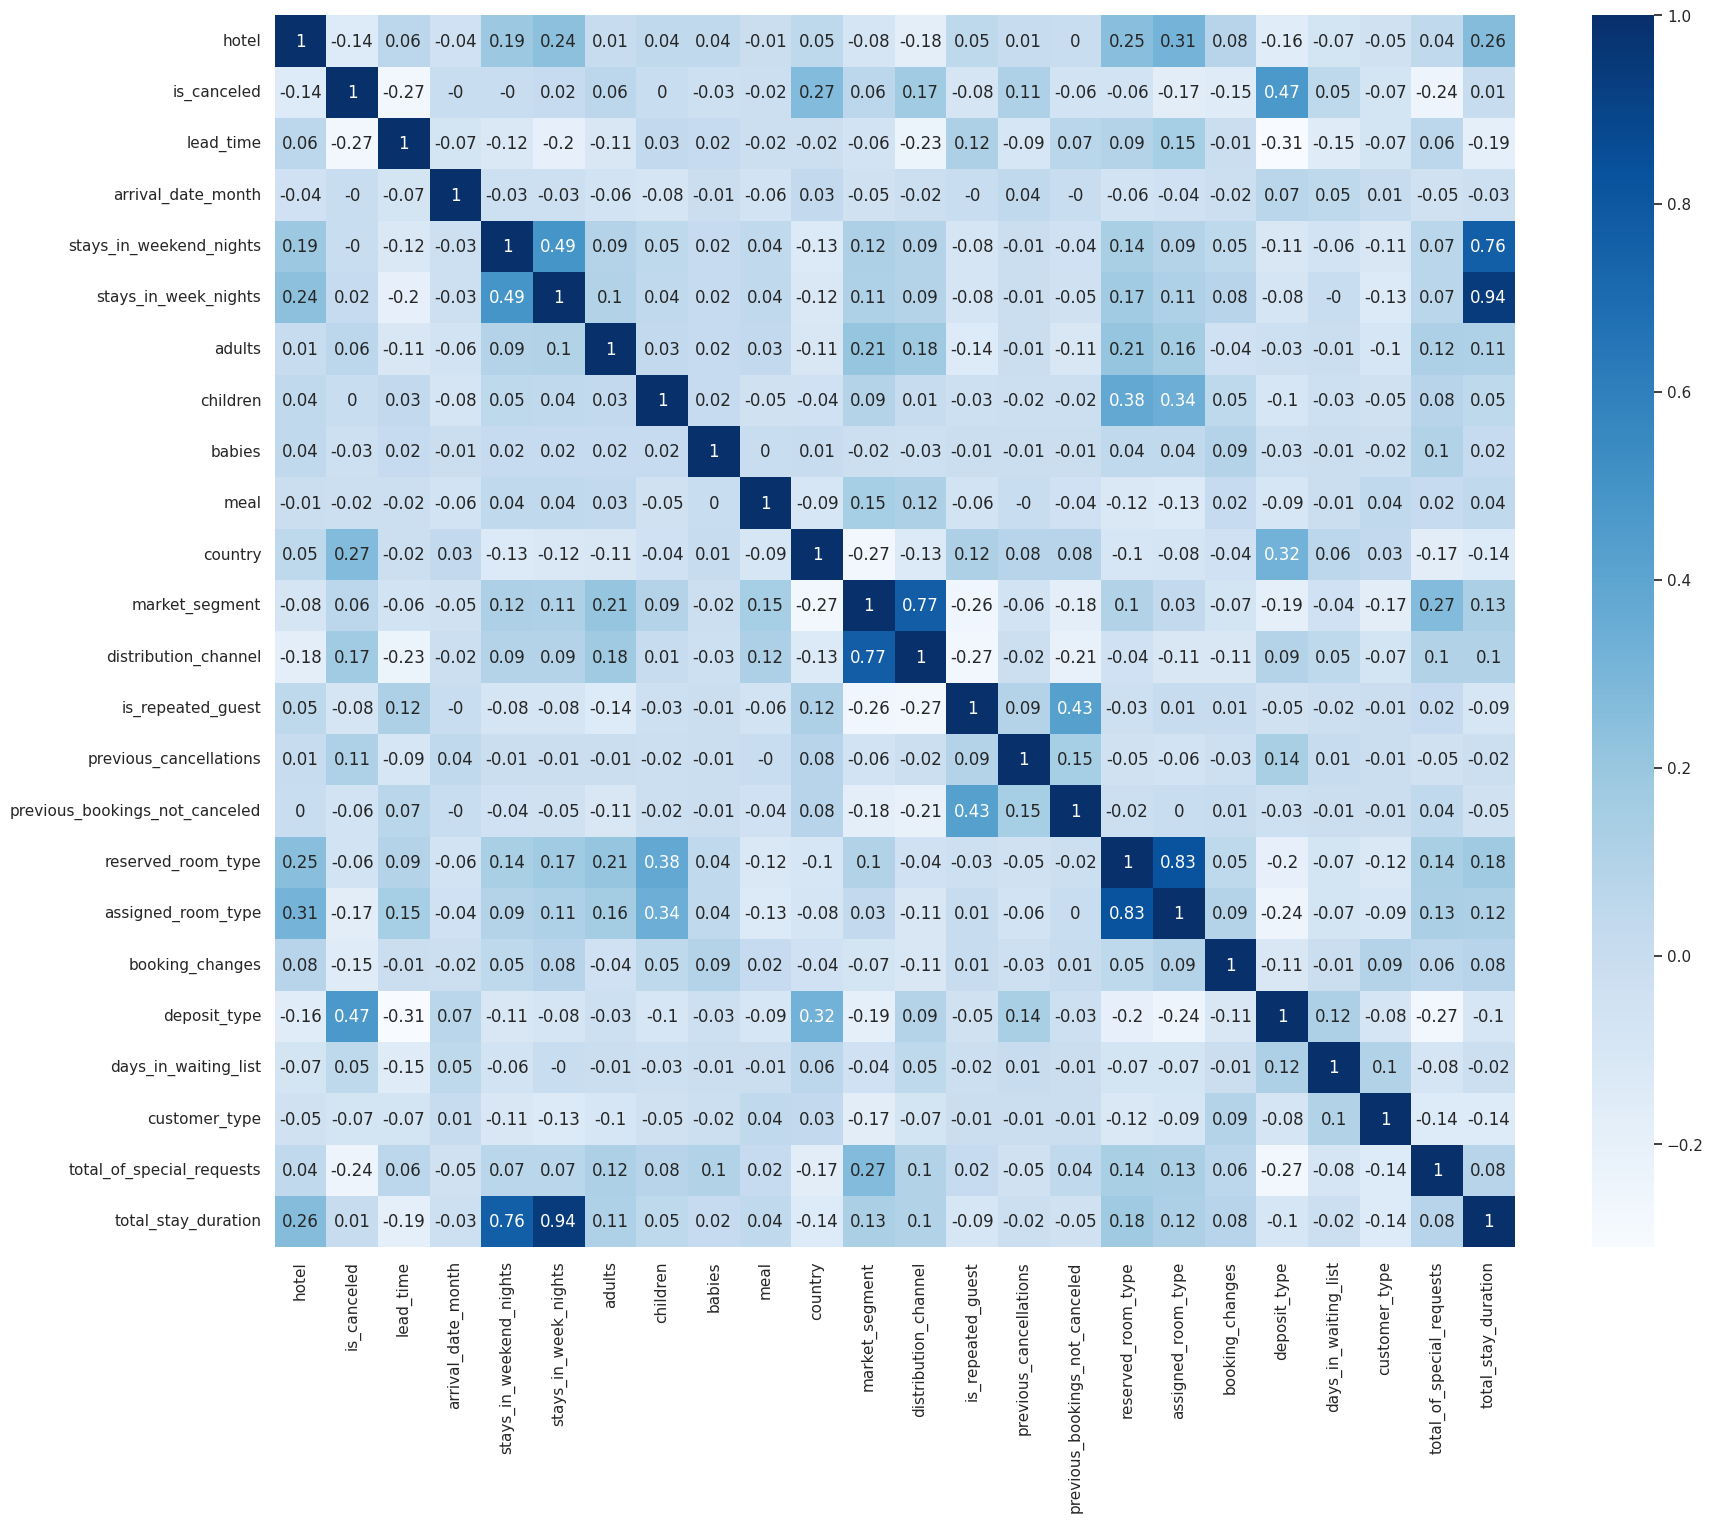

In [ ]:
#heapmap
corr = df.corr().round(2)
sb.set (rc = {'figure.figsize':(20, 16)})
sb.heatmap(corr, cmap="Blues", annot=True)

Scalling

In [ ]:
# Create a copy
df_std = df.copy()

# Initialize the StandardScaler
std_scaler = StandardScaler()

# Standardize the values and create a new DataFrame
df_std = pd.DataFrame(std_scaler.fit_transform(df_std.values),
                      columns=df_std.columns, index=df_std.index)

# Print a message indicating the use of StandardScaler
print("Scaled Dataset Using StandardScaler")

# Print the first few rows of the standardized DataFrame
print(df_std.head())


Scaled Dataset Using StandardScaler
      hotel  is_canceled  lead_time  arrival_date_month  \
2  1.410349    -0.770617   0.624359           -0.138456   
3  1.410349    -0.770617   0.624359           -0.138456   
4  1.410349    -0.770617   0.624359           -0.138456   
5  1.410349    -0.770617   0.624359           -0.138456   
6  1.410349    -0.770617   1.820833           -0.138456   

   stays_in_weekend_nights  stays_in_week_nights    adults  children  \
2                 -0.93635             -0.799044 -1.494527 -0.261066   
3                 -0.93635             -0.799044 -1.494527 -0.261066   
4                 -0.93635             -0.270852  0.243276 -0.261066   
5                 -0.93635             -0.270852  0.243276 -0.261066   
6                 -0.93635             -0.270852  0.243276 -0.261066   

     babies      meal  ...  previous_cancellations  \
2 -0.081611 -0.519416  ...                -0.10344   
3 -0.081611 -0.519416  ...                -0.10344   
4 -0.081611 -0

# 4. Classifier Training (20%)


---


Utilize the sklearn Python library to train a decision tree classifier. Your process should start with splitting your dataset into predictor features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train and test your data on the original dataset, a normalized dataset, and a standardized dataset. Aim to achieve a decision tree classifier with at least 70% accuracy.

In [ ]:
# data Split
X = df.drop(columns="is_canceled")
y = df["is_canceled"]

In [ ]:
#Normalised Data
normalized_X = preprocessing.normalize(X)
# Standardised Data
standardized_X = preprocessing.scale(X)

#encode categorical data into digits
y = pd.get_dummies(y)
print(y.head())

   0  1
2  1  0
3  1  0
4  1  0
5  1  0
6  1  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  int8   
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_month              118565 non-null  int8   
 4   stays_in_weekend_nights         118565 non-null  int64  
 5   stays_in_week_nights            118565 non-null  int64  
 6   adults                          118565 non-null  int64  
 7   children                        118565 non-null  float64
 8   babies                          118565 non-null  int64  
 9   meal                            118565 non-null  int8   
 10  country                         118565 non-null  int64  
 11  market_segment                  118565 non-null  int8   
 12  distribution_cha

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('is_canceled', axis=1)  # Replace 'target_column' with your actual target column
y = df['is_canceled']

# Split the data into a 70% training set and a 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Create a Decision Tree classifier object
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train the classifier on the original dataset
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate accuracy
data_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Data Accuracy:", data_accuracy)

# Using Normalized Data
# Apply Min-Max scaling to the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the normalized data into a training and testing set
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=1, stratify=y)

# Create a Decision Tree classifier and train it on the normalized data
dt_normalized = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt_normalized.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred_normalized = dt_normalized.predict(X_test_normalized)

# Evaluate accuracy
normalized_accuracy = metrics.accuracy_score(y_test, y_pred_normalized)
print("Normalized Data Accuracy:", normalized_accuracy)

# Using Standardized Data
# Apply StandardScaler to standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the standardized data into a training and testing set
X_train_standardized, X_test_standardized, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=1, stratify=y)

# Create a Decision Tree classifier and train it on the standardized data
dt_standardized = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt_standardized.fit(X_train_standardized, y_train)

# Predict on the test set
y_pred_standardized = dt_standardized.predict(X_test_standardized)

# Evaluate accuracy
standardized_accuracy = metrics.accuracy_score(y_test, y_pred_standardized)
print("Standardized Data Accuracy:", standardized_accuracy)


Data Accuracy: 0.8186674163621029
Normalized Data Accuracy: 0.8186674163621029
Standardized Data Accuracy: 0.8186674163621029


So it have 81 Percent accuracy





In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7641270733764408


Accuracy: 0.7641270733764408

# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

In [ ]:

# Normalize the features
normalized_X = preprocessing.normalize(X)
# Standardize the features
standardized_X = preprocessing.scale(X)

# Encode the target variable
y = df['is_canceled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size=0.3, stratify=y, random_state=1)

# Create Decision Tree classifier object
dt = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifier
Result_DT = dt.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = dt.predict(X_test)

# Calculate accuracy
data_accuracy = metrics.accuracy_score(y_test, y_pred)

# Variable importance in the classifier
print("Variable importance in the classifier:")
importance_df = pd.DataFrame({'variable': X.columns, 'importance': dt.feature_importances_})
importance_df = importance_df.sort_values(by='importance', ascending=False)
print(importance_df.head(20))


Variable importance in the classifier:
                          variable  importance
18                    deposit_type    0.249701
9                          country    0.136788
2               arrival_date_month    0.099862
21       total_of_special_requests    0.062830
10                  market_segment    0.059496
22             total_stay_duration    0.054819
4             stays_in_week_nights    0.048986
1                        lead_time    0.038142
13          previous_cancellations    0.031376
3          stays_in_weekend_nights    0.028819
16              assigned_room_type    0.028632
5                           adults    0.023815
8                             meal    0.023198
17                 booking_changes    0.022611
20                   customer_type    0.021806
15              reserved_room_type    0.021249
0                            hotel    0.019711
6                         children    0.010936
11            distribution_channel    0.006034
14  previous_bookings

In [ ]:
print(metrics.classification_report(y_test, y_pred,
digits=2,output_dict=False))
# Variable importance in classifier
print("Variable importacne in the classifier.")
pd.concat((pd.DataFrame(df.iloc[:, 1:].columns, columns =
['variable']),
pd.DataFrame(dt.feature_importances_, columns =
['importance'])),
axis = 1).sort_values(by='importance', ascending =
False)[:20]

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     22317
           1       0.75      0.76      0.75     13253

    accuracy                           0.82     35570
   macro avg       0.80      0.80      0.80     35570
weighted avg       0.82      0.82      0.82     35570

Variable importacne in the classifier.


,variable,importance
18,deposit_type,0.249701
9,country,0.136788
2,arrival_date_month,0.099862
21,total_of_special_requests,0.062830
10,market_segment,0.059496
22,total_stay_duration,0.054819
4,stays_in_week_nights,0.048986
1,lead_time,0.038142
13,previous_cancellations,0.031376
3,stays_in_weekend_nights,0.028819
